# Usign NLP to classify PDF docs (Three labels - Nota, DOC and Recibos)

# Merging labels and text into only one file

In [1]:
import nltk
import numpy as np
import random
import string

import bs4 as bs
import urllib.request
import re

import pandas, numpy
import pandas as pd 
import numpy as np

from nltk.corpus import webtext 
from nltk.collocations import BigramCollocationFinder 
from nltk.metrics import BigramAssocMeasures 
from random import random
from collections           import defaultdict
from gensim.models.phrases import Phrases, Phraser

df = pd.read_csv("C:/AI/krypton-01/jpeg/revisado4.csv") 
##df =df.head(10000) 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5433 entries, 0 to 5432
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nome    5433 non-null   object
 1   tipo    5433 non-null   object
dtypes: object(2)
memory usage: 85.0+ KB


In [2]:
from os import listdir
from os.path import isfile, join
mypath = 'C:/AI/krypton-01/texto5'
onlyfile1 = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(len(onlyfile1))

5452


In [3]:
df1 = pd.DataFrame (columns = ['body','label','name','label1'])

In [4]:
for file1 in onlyfile1:
    #print(file1[-3:])
    #print(file1)
    #print(file1[:-4])
    if file1[-3:]=="txt":
        print(file1)
        text1 = open('C:/AI/krypton-01/texto5/'+file1, "r+",encoding = 'utf-8-sig').read()
        df2 = pd.DataFrame([[text1, "",file1[:-4],""]], columns = ['body','label','name','label1'])
        df1=df1.append(df2)
        df1.reset_index(inplace = True, drop = True)

2017-06-27_08-47_2081291.txt
2017-06-27_08-47_2328549.txt
2017-06-27_08-47_2762289.txt
2017-06-27_08-47_5632222.txt
2017-06-27_08-47_5736801.txt
2017-06-27_08-47_6630378.txt
2017-06-27_08-47_6945680.txt
2017-06-27_08-47_8612042.txt
2017-06-27_08-47_9038559.txt
2017-06-27_08-47_9573012.txt
2017-06-27_10-14_1881821.txt
2017-06-27_10-14_6049154.txt
2017-06-27_10-14_9150233.txt
2017-06-28_09-47_1035992.txt
2017-06-29_08-03_8994805.txt
2017-06-29_09-12_9030590.txt
2017-06-29_09-34_6433716.txt
2017-06-29_11-32_2407431.txt
2017-06-29_11-36_1627262.txt
2017-06-30_09-35_6552132.txt
2017-06-30_13-21_5267056.txt
2017-06-30_14-09_1190062.txt
2017-06-30_14-09_7223992.txt
2017-06-30_14-09_8651457.txt
2017-07-03_09-41_7282193.txt
2017-07-03_13-46_1323416.txt
2017-07-05_10-36_6215036.txt
2017-07-12_13-22_1686331.txt
2017-07-12_13-29_3005962.txt
2017-07-12_13-33_4405247.txt
2017-07-12_13-42_2901228.txt
2017-07-12_13-45_5733409.txt
2017-07-12_13-49_2763458.txt
2017-07-12_13-56_9712107.txt
2017-07-12_13-

2017-10-30_10-23_8653398.txt
2017-10-30_10-23_8691220.txt
2017-10-30_10-23_8829816.txt
2017-10-30_10-23_9361753.txt
2017-10-30_13-32_9944407.txt
2017-10-30_14-54_7880843.txt
2017-10-30_15-53_1097681.txt
2017-10-30_15-53_2513703.txt
2017-10-30_15-53_4017838.txt
2017-10-31_08-48_5907487.txt
2017-10-31_15-34_8171011.txt
2017-11-01_09-55_9796983.txt
2017-11-01_17-15_3350726.txt
2017-11-03_10-13_7986812.txt
2017-11-03_10-51_5884079.txt
2017-11-06_14-12_6798347.txt
2017-11-08_10-46_2133442.txt
2017-11-08_11-44_4156880.txt
2017-11-09_13-21_4190687.txt
2017-11-09_13-29_9336549.txt
2017-11-09_13-32_7237453.txt
2017-11-10_13-36_9695697.txt
2017-11-10_14-24_8765219.txt
2017-11-10_14-27_1535757.txt
2017-11-10_14-27_5846569-0.txt
2017-11-10_14-27_5846569-1.txt
2017-11-10_14-27_6281339.txt
2017-11-10_14-27_6722974.txt
2017-11-10_14-27_6847555.txt
2017-11-10_14-27_8414642.txt
2017-11-10_14-27_9858778.txt
2017-11-10_17-16_1199972.txt
2017-11-14_10-35_2170725.txt
2017-11-14_10-42_1535016.txt
2017-11-14

2018-02-01_11-05_4714046.txt
2018-02-01_11-05_5148771.txt
2018-02-01_11-05_6712516.txt
2018-02-01_11-05_8302151.txt
2018-02-01_11-05_9205560.txt
2018-02-01_11-10_1199427.txt
2018-02-01_11-10_1414721.txt
2018-02-01_11-10_1648348.txt
2018-02-01_11-10_1828103.txt
2018-02-01_11-10_2367157.txt
2018-02-01_11-10_2535962.txt
2018-02-01_11-10_2676619.txt
2018-02-01_11-10_3062477.txt
2018-02-01_11-10_3501961.txt
2018-02-01_11-10_3780670.txt
2018-02-01_11-10_3878027.txt
2018-02-01_11-10_4148709.txt
2018-02-01_11-10_4154414.txt
2018-02-01_11-10_4426334.txt
2018-02-01_11-10_4725067.txt
2018-02-01_11-10_5121457.txt
2018-02-01_11-10_5286975.txt
2018-02-01_11-10_5555374.txt
2018-02-01_11-10_5708178.txt
2018-02-01_11-10_6257534.txt
2018-02-01_11-10_6401885.txt
2018-02-01_11-10_6658534.txt
2018-02-01_11-10_6688168.txt
2018-02-01_11-10_6857018.txt
2018-02-01_11-10_6939937.txt
2018-02-01_11-10_7010716.txt
2018-02-01_11-10_7131102.txt
2018-02-01_11-10_7165307.txt
2018-02-01_11-10_7352227.txt
2018-02-01_11-

2018-04-04_13-13_5102683.txt
2018-04-04_13-13_6306862.txt
2018-04-04_13-13_8822620.txt
2018-04-04_15-24_9184852.txt
2018-04-06_11-10_9588043.txt
2018-04-06_16-33_1414544.txt
2018-04-09_14-23_5368018.txt
2018-04-09_14-30_1463580.txt
2018-04-09_14-30_4719343.txt
2018-04-10_09-20_7038392.txt
2018-04-10_09-20_7054457.txt
2018-04-10_10-48_3746519.txt
2018-04-10_10-55_4542888.txt
2018-04-10_11-23_2892485.txt
2018-04-10_11-23_2926912.txt
2018-04-10_11-23_4075982.txt
2018-04-10_11-23_4492705.txt
2018-04-10_11-27_5430877.txt
2018-04-10_11-31_6140641-0.txt
2018-04-10_11-31_6140641-1.txt
2018-04-10_12-58_7850811.txt
2018-04-10_13-02_3187477.txt
2018-04-10_13-02_4473507.txt
2018-04-10_13-02_5736502.txt
2018-04-10_13-02_8536508.txt
2018-04-10_13-16_6210061.txt
2018-04-10_13-19_6347715.txt
2018-04-10_13-25_1356593.txt
2018-04-10_13-45_2642147.txt
2018-04-10_14-02_5479158.txt
2018-04-10_14-22_1393483.txt
2018-04-10_14-22_3006301.txt
2018-04-10_14-28_8270258.txt
2018-04-10_14-37_5250932.txt
2018-04-10

2018-06-12_15-12_4923095.txt
2018-06-13_10-03_1490630.txt
2018-06-13_10-08_1355453.txt
2018-06-13_10-24_3776836.txt
2018-06-13_12-39_5851742.txt
2018-06-13_12-45_6061911.txt
2018-06-13_13-41_5469436.txt
2018-06-13_15-26_5160434.txt
2018-06-13_15-55_2010985.txt
2018-06-14_10-56_5518274.txt
2018-06-19_14-51_2772616.txt
2018-06-19_14-51_8340749.txt
2018-06-19_15-24_7898558.txt
2018-06-20_08-27_9066524.txt
2018-06-20_08-27_9506768.txt
2018-06-20_08-32_3018432.txt
2018-06-20_08-32_6047263.txt
2018-06-20_09-39_4487471.txt
2018-06-20_09-58_9135284.txt
2018-06-20_10-06_3864965.txt
2018-06-20_14-37_5632578.txt
2018-06-20_14-37_6916731.txt
2018-06-21_10-56_7060207.txt
2018-06-21_13-45_6035828.txt
2018-06-21_16-34_1039271.txt
2018-06-22_16-33_4825773.txt
2018-06-22_16-34_8277952.txt
2018-06-22_16-36_3021395.txt
2018-06-22_16-37_9126345.txt
2018-06-22_16-38_4068738.txt
2018-06-22_16-38_4661697.txt
2018-06-22_16-38_7213924.txt
2018-06-22_16-38_9994632.txt
2018-06-22_16-40_5202057.txt
2018-06-22_16-

2018-08-02_11-20_E_1616_5034047.txt
2018-08-02_11-23_E_1616_5519895.txt
2018-08-02_11-28_E_1616_9395818.txt
2018-08-02_11-37_E_1616_2003908.txt
2018-08-02_15-27_E_1616_2370006.txt
2018-08-02_15-27_E_1616_9264466.txt
2018-08-02_16-16_E_1616_1550961.txt
2018-08-02_16-27_E_1616_4935618.txt
2018-08-03_08-34_E_1616_3941910.txt
2018-08-03_14-24_E_1616_7376039.txt
2018-08-07_14-23_E_1616_5192093.txt
2018-08-08_10-40_E_1616_1481885.txt
2018-08-09_13-26_7969628.txt
2018-08-09_14-33_E_1616_2469544.txt
2018-08-10_11-09_E_1616_3488702.txt
2018-08-10_15-11_E_1616_8199560.txt
2018-08-14_14-30_E_1616_2308345.txt
2018-08-14_14-30_E_1616_4139315.txt
2018-08-14_14-37_E_1616_2525525.txt
2018-08-14_14-41_E_1616_8756700.txt
2018-08-14_14-59_E_1616_5390013.txt
2018-08-14_15-08_E_1616_2362917.txt
2018-08-14_15-08_E_1616_3142263.txt
2018-08-14_15-08_E_1616_6778034.txt
2018-08-14_15-08_E_1616_6976144.txt
2018-08-14_15-12_E_1616_6621647.txt
2018-08-14_15-17_E_1616_9648243.txt
2018-08-14_15-19_E_1616_7340690.txt

2018-09-28_11-58_E_1125_3539408.txt
2018-09-28_11-58_E_1125_4659026.txt
2018-09-28_14-21_E_1125_1504849.txt
2018-09-28_14-21_E_1125_5081301.txt
2018-09-28_14-21_E_1125_5282434.txt
2018-09-28_14-21_E_1125_5512978.txt
2018-09-28_14-21_E_1125_5713360.txt
2018-09-28_14-21_E_1125_6163051.txt
2018-09-28_14-21_E_1125_7903656.txt
2018-09-28_14-21_E_1125_8027935.txt
2018-09-28_14-21_E_1125_8997020.txt
2018-09-28_14-33_E_1125_2351538.txt
2018-09-28_14-33_E_1125_7940187.txt
2018-09-28_14-37_E_1125_4623098.txt
2018-09-28_14-37_E_1125_9611941.txt
2018-09-28_14-37_E_1125_9703360.txt
2018-09-28_14-39_E_1125_1519874.txt
2018-09-28_14-39_E_1125_4300892.txt
2018-09-28_14-39_E_1125_7456327.txt
2018-09-28_14-39_E_1125_7758262.txt
2018-09-28_14-39_E_1125_9543052.txt
2018-09-28_14-43_E_1125_3803635.txt
2018-09-28_14-43_E_1125_6683480.txt
2018-09-28_14-43_E_1125_7778348.txt
2018-09-28_14-46_E_1125_1531087.txt
2018-09-28_14-46_E_1125_2304097.txt
2018-09-28_14-46_E_1125_4380305.txt
2018-09-28_14-46_E_1125_7676

2018-11-20_15-08-49-1542733729_E_1882_2130169.txt
2018-11-22_15-02_CP_I_728__6316307.txt
2018-11-22_15-41-43-1542908503_E_1616_1849800.txt
2018-11-23_16-46-25-1542998785_E_1616_5152301.txt
2018-11-27_15-24-49-1543339489_E_1882_5469574.txt
2018-11-27_15-26-36-1543339596_E_1882_9699768.txt
2018-11-27_15-30-45-1543339845_E_1882_3697048.txt
2018-11-28_08-27-13-1543400833_E_1882_6540663.txt
2018-11-28_08-28-22-1543400902_E_1882_3005500.txt
2018-11-28_09-01-21-1543402881_E_1882_1160546.txt
2018-11-28_09-01-21-1543402881_E_1882_1731127.txt
2018-11-28_09-12-36-1543403556_E_1882_1748613.txt
2018-11-28_09-12-36-1543403556_E_1882_8717526.txt
2018-11-28_10-02-40-1543406560_E_1882_2946911.txt
2018-11-28_10-02-40-1543406560_E_1882_7985498.txt
2018-11-28_11-52-29-1543413149_E_1882_2675275.txt
2018-11-28_14-23-18-1543422198_E_1125_1828744.txt
2018-11-28_14-23-18-1543422198_E_1125_2483235.txt
2018-11-28_14-23-18-1543422198_E_1125_2529768.txt
2018-11-28_14-25-17-1543422317_E_1125_6380653.txt
2018-11-28_

2018-12-21_14-14-22-1545408862_E_1125_4753380.txt
2018-12-21_14-14-22-1545408862_E_1125_4980509.txt
2018-12-21_14-14-22-1545408862_E_1125_5218489.txt
2018-12-21_14-14-22-1545408862_E_1125_5276494.txt
2018-12-21_14-14-22-1545408862_E_1125_5584176.txt
2018-12-21_14-14-22-1545408862_E_1125_6081415.txt
2018-12-21_14-14-22-1545408862_E_1125_7694414.txt
2018-12-21_14-14-22-1545408862_E_1125_9476896.txt
2018-12-21_14-14-22-1545408862_E_1125_9583413.txt
2018-12-21_14-14-23-1545408863_E_1125_2447774.txt
2018-12-21_14-14-23-1545408863_E_1125_2700267.txt
2018-12-21_14-14-23-1545408863_E_1125_7785786.txt
2018-12-21_14-14-23-1545408863_E_1125_8267560.txt
2018-12-21_14-14-23-1545408863_E_1125_8825822.txt
2018-12-21_14-14-23-1545408863_E_1125_9093673.txt
2018-12-21_14-14-23-1545408863_E_1125_9165825.txt
2018-12-21_14-16-14-1545408974_E_1125_2800396.txt
2018-12-21_14-16-39-1545408999_E_1125_1099022.txt
2018-12-21_14-16-39-1545408999_E_1125_1925061.txt
2018-12-21_14-16-39-1545408999_E_1125_2837430.txt


2019-01-22_13-20-03-1548170403_E_1882_5298386.txt
2019-01-22_13-20-04-1548170404_E_1882_1626452.txt
2019-01-22_13-20-04-1548170404_E_1882_8135990-1000.txt
2019-01-22_13-20-04-1548170404_E_1882_8135990-1001.txt
2019-01-24_16-41-54-1548355314_E_1616_1440200.txt
2019-01-25_18-36-43-1548448603_E_1882_1768525.txt
2019-01-25_19-20-35-1548451235_E_1882_2826928.txt
2019-01-28_09-45-44-1548675944_E_1125_6166867.txt
2019-01-28_16-29-23-1548700163_E_1882_2990328.txt
2019-01-28_16-29-23-1548700163_E_1882_3051135.txt
2019-01-29_08-39-38-1548758378_E_1882_4043000.txt
2019-01-30_09-56-35-1548849395_E_1882_2193563.txt
2019-01-30_09-59-45-1548849585_E_1882_7269894.txt
2019-01-30_09-59-45-1548849585_E_1882_7852962.txt
2019-01-30_10-07-09-1548850029_E_1882_5954799.txt
2019-01-30_10-16-42-1548850602_E_1882_4924908.txt
2019-01-31_10-42-23-1548938543_E_1125_4029628.txt
2019-01-31_10-42-23-1548938543_E_1125_8683327.txt
2019-01-31_10-42-26-1548938546_E_1125_5423546-0.txt
2019-01-31_10-42-26-1548938546_E_1125_

2019-02-26_11-40-22-1551192022_E_1125_2079764.txt
2019-02-26_11-40-22-1551192022_E_1125_2103231.txt
2019-02-26_11-40-22-1551192022_E_1125_2555278.txt
2019-02-26_11-40-22-1551192022_E_1125_3068465.txt
2019-02-26_11-40-22-1551192022_E_1125_4632276.txt
2019-02-26_11-40-22-1551192022_E_1125_4748924.txt
2019-02-26_11-40-22-1551192022_E_1125_6357868.txt
2019-02-26_11-40-22-1551192022_E_1125_6443726.txt
2019-02-26_11-40-22-1551192022_E_1125_7869490.txt
2019-02-26_11-40-22-1551192022_E_1125_7886761.txt
2019-02-26_11-40-22-1551192022_E_1125_7904291.txt
2019-02-26_11-40-22-1551192022_E_1125_8327641.txt
2019-02-26_11-41-36-1551192096_E_1125_1856400.txt
2019-02-26_11-41-36-1551192096_E_1125_2181402.txt
2019-02-26_11-41-36-1551192096_E_1125_3926098.txt
2019-02-26_11-41-36-1551192096_E_1125_7984665.txt
2019-02-26_11-41-36-1551192096_E_1125_9370200.txt
2019-02-26_11-41-37-1551192097_E_1125_1401405.txt
2019-02-26_11-41-37-1551192097_E_1125_9749717.txt
2019-02-26_11-41-52-1551192112_E_1125_7528458.txt


2019-03-18_14-26-53-1552930013_E_1882_1325246.txt
2019-03-18_14-26-53-1552930013_E_1882_1672929.txt
2019-03-18_14-26-53-1552930013_E_1882_3969359.txt
2019-03-18_14-26-53-1552930013_E_1882_5462573.txt
2019-03-18_14-26-53-1552930013_E_1882_7064010.txt
2019-03-18_14-26-53-1552930013_E_1882_8114193.txt
2019-03-18_14-26-53-1552930013_E_1882_8773822.txt
2019-03-18_14-26-54-1552930014_E_1882_2275891.txt
2019-03-18_14-26-54-1552930014_E_1882_3612906.txt
2019-03-18_14-26-54-1552930014_E_1882_9562095.txt
2019-03-18_14-37-37-1552930657_E_1882_1342108.txt
2019-03-18_14-37-37-1552930657_E_1882_3388204.txt
2019-03-18_14-37-37-1552930657_E_1882_7319001.txt
2019-03-18_14-37-37-1552930657_E_1882_7435925.txt
2019-03-18_14-37-37-1552930657_E_1882_7770206.txt
2019-03-18_14-44-35-1552931075_E_1882_3426527.txt
2019-03-18_14-44-35-1552931075_E_1882_3887912.txt
2019-03-18_14-44-35-1552931075_E_1882_4097318.txt
2019-03-18_14-44-35-1552931075_E_1882_5135347.txt
2019-03-18_14-44-35-1552931075_E_1882_8756019.txt


2019-04-03_16-00-14-1554318014_I_158_4682641.txt
2019-04-03_16-00-14-1554318014_I_158_7930046.txt
2019-04-03_16-00-14-1554318014_I_158_8149713.txt
2019-04-03_16-00-14-1554318014_I_158_8416949.txt
2019-04-03_16-00-14-1554318014_I_158_8888174.txt
2019-04-03_16-00-14-1554318014_I_158_9477807.txt
2019-04-03_16-00-14-1554318014_I_158_9947377.txt
2019-04-03_16-00-15-1554318015_I_158_3743417.txt
2019-04-03_16-00-15-1554318015_I_158_5345545.txt
2019-04-03_16-00-15-1554318015_I_158_9570740.txt
2019-04-04_16-06-58-1554404818_E_1882_3437436.txt
2019-04-04_16-06-58-1554404818_E_1882_5106270.txt
2019-04-05_08-35-02-1554464102_I_158_2380350.txt
2019-04-05_08-35-02-1554464102_I_158_3857353.txt
2019-04-05_08-35-02-1554464102_I_158_5758172.txt
2019-04-05_13-08-14-1554480494_E_1882_3639739.txt
2019-04-05_14-26-27-1554485187_E_1882_5085695.txt
2019-04-09_10-14-01-1554815641_E_1882_9845332-1000.txt
2019-04-09_10-14-01-1554815641_E_1882_9845332-1001.txt
2019-04-09_10-41-40-1554817300_E_1882_9199301.txt
201

2019-05-03_12-36-35-1556897795_E_1970_4714223-1.txt
2019-05-03_12-36-35-1556897795_E_1970_4714223-2.txt
2019-05-03_12-36-35-1556897795_E_1970_4714223-3.txt
2019-05-03_12-36-35-1556897795_E_1970_6056129.txt
2019-05-03_12-36-35-1556897795_E_1970_8967864-0.txt
2019-05-03_12-36-35-1556897795_E_1970_8967864-1.txt
2019-05-03_12-36-35-1556897795_E_1970_8967864-2.txt
2019-05-03_12-36-35-1556897795_E_1970_8967864-3.txt
2019-05-03_12-36-37-1556897797_E_1970_8178017-0.txt
2019-05-03_12-36-37-1556897797_E_1970_8178017-1.txt
2019-05-03_12-36-37-1556897797_E_1970_8178017-2.txt
2019-05-03_12-36-37-1556897797_E_1970_8178017-3.txt
2019-05-03_12-36-38-1556897798_E_1970_2863064-0.txt
2019-05-03_12-36-38-1556897798_E_1970_2863064-1.txt
2019-05-03_14-03-36-1556903016_E_1125_6725033.txt
2019-05-06_10-01-58-1557147718_E_1125_9448779.txt
2019-05-06_14-03-26-1557162206_E_2007_8892151.txt
2019-05-06_16-33-53-1557171233_E_2007_1894377.txt
2019-05-06_16-33-53-1557171233_E_2007_2973434.txt
2019-05-06_16-33-53-1557

2019-05-27_15-05-09-1558980309_E_2007_8844041.txt
2019-05-28_08-43-42-1559043822_E_2007_8814620.txt
2019-05-28_11-27-09-1559053629_E_1882_3071612.txt
2019-05-28_15-06-50-1559066810_E_1125_3513739.txt
2019-05-28_15-06-50-1559066810_E_1125_4109666.txt
2019-05-28_15-35-23-1559068523_E_1125_1282836.txt
2019-05-28_15-35-23-1559068523_E_1125_7128332.txt
2019-05-28_15-37-44-1559068664_E_1125_1659648.txt
2019-05-28_15-37-44-1559068664_E_1125_2476448.txt
2019-05-28_15-39-38-1559068778_E_1125_2164204.txt
2019-05-28_15-39-38-1559068778_E_1125_5332151.txt
2019-05-29_11-10-07-1559139007_E_1882_2003889-1000.txt
2019-05-29_11-10-07-1559139007_E_1882_2003889-1001.txt
2019-05-29_11-10-07-1559139007_E_1882_2237494.txt
2019-05-29_11-10-07-1559139007_E_1882_3016019.txt
2019-05-29_11-10-07-1559139007_E_1882_3296187.txt
2019-05-29_11-10-07-1559139007_E_1882_3552760.txt
2019-05-29_11-10-07-1559139007_E_1882_6185633.txt
2019-05-29_11-10-07-1559139007_E_1882_7605659.txt
2019-05-29_11-10-07-1559139007_E_1882_81

2019-06-26_10-37-15-1561556235_I_158_5820145.txt
2019-06-26_10-37-16-1561556236_I_158_8588339.txt
2019-06-26_11-02-22-1561557742_I_158_5818815-0.txt
2019-06-26_11-02-22-1561557742_I_158_5818815-1.txt
2019-06-26_11-02-22-1561557742_I_158_5818815-2.txt
2019-06-26_14-56-05-1561571765_E_1882_6386158.txt
2019-06-26_14-59-46-1561571986_E_1882_3858470.txt
2019-06-26_14-59-46-1561571986_E_1882_9516333.txt
2019-06-26_15-01-00-1561572060_E_1882_7383410-1000.txt
2019-06-26_15-01-00-1561572060_E_1882_7383410-1001.txt
2019-06-27_10-50-54-1561643454_E_1314_7593164-0.txt
2019-06-27_10-50-54-1561643454_E_1314_7593164-1.txt
2019-06-27_10-56-56-1561643816_E_1314_1630944-0.txt
2019-06-27_10-56-56-1561643816_E_1314_1630944-1.txt
2019-06-27_11-00_CP_E_1314__5080130.txt
2019-06-27_15-25-51-1561659951_E_1125_5285223.txt
2019-06-27_15-25-51-1561659951_E_1125_5838030.txt
2019-06-27_15-25-51-1561659951_E_1125_9376736.txt
2019-06-27_15-30-36-1561660236_E_1125_1543025.txt
2019-06-27_15-30-36-1561660236_E_1125_186

2019-07-05_17-07-16-1562357236_I_158_3124529.txt
2019-07-11_16-58-46-1562875126_E_1882_1045290.txt
2019-07-11_16-58-46-1562875126_E_1882_1467478.txt
2019-07-11_16-58-46-1562875126_E_1882_2197746.txt
2019-07-11_16-58-46-1562875126_E_1882_2419959.txt
2019-07-11_16-58-46-1562875126_E_1882_3395249.txt
2019-07-11_16-58-46-1562875126_E_1882_4472896.txt
2019-07-11_16-58-46-1562875126_E_1882_6135139.txt
2019-07-11_16-58-46-1562875126_E_1882_6529648.txt
2019-07-11_16-58-46-1562875126_E_1882_6607175.txt
2019-07-11_16-58-46-1562875126_E_1882_8960548.txt
2019-07-11_16-59-17-1562875157_E_1882_2721280.txt
2019-07-11_16-59-17-1562875157_E_1882_8266139.txt
2019-07-16_11-22-52-1563286972_E_1882_1324754.txt
2019-07-16_11-22-52-1563286972_E_1882_2643213.txt
2019-07-16_11-22-52-1563286972_E_1882_2900494.txt
2019-07-16_11-22-52-1563286972_E_1882_2986768.txt
2019-07-16_11-22-52-1563286972_E_1882_3996123.txt
2019-07-16_11-22-52-1563286972_E_1882_6188732.txt
2019-07-16_11-22-52-1563286972_E_1882_6775785.txt
2

2019-08-14_10-42-14-1565790134_E_1882_3850635.txt
2019-08-14_10-42-14-1565790134_E_1882_3962830.txt
2019-08-14_10-42-14-1565790134_E_1882_5427898.txt
2019-08-14_10-42-14-1565790134_E_1882_5570621.txt
2019-08-14_10-42-14-1565790134_E_1882_5584559.txt
2019-08-14_10-42-14-1565790134_E_1882_5922385.txt
2019-08-14_10-42-14-1565790134_E_1882_6725248.txt
2019-08-14_10-42-14-1565790134_E_1882_7022100.txt
2019-08-14_10-42-14-1565790134_E_1882_8441279.txt
2019-08-14_10-42-14-1565790134_E_1882_8817463.txt
2019-08-14_10-42-14-1565790134_E_1882_9134368.txt
2019-08-14_11-09-19-1565791759_E_1882_1022049.txt
2019-08-14_11-09-19-1565791759_E_1882_1935738.txt
2019-08-14_11-09-19-1565791759_E_1882_2602657.txt
2019-08-14_11-09-19-1565791759_E_1882_2668317.txt
2019-08-14_11-09-19-1565791759_E_1882_4449458.txt
2019-08-14_11-09-19-1565791759_E_1882_4613997.txt
2019-08-14_11-09-19-1565791759_E_1882_5059205.txt
2019-08-14_11-09-19-1565791759_E_1882_5516449.txt
2019-08-14_11-09-19-1565791759_E_1882_5764366.txt


2019-09-24_12-13-33-1569338013_E_1125_4035302.txt
2019-09-24_15-49-42-1569350982_E_1125_2064514.txt
2019-09-24_15-49-42-1569350982_E_1125_2388389.txt
2019-09-24_15-51-29-1569351089_E_1125_1488370.txt
2019-09-24_15-51-29-1569351089_E_1125_2640081.txt
2019-09-24_15-51-29-1569351089_E_1125_6047832.txt
2019-09-24_15-51-29-1569351089_E_1125_8622476.txt
2019-09-24_15-51-29-1569351089_E_1125_8743519.txt
2019-09-24_15-54-31-1569351271_E_1125_2071669.txt
2019-09-24_15-54-31-1569351271_E_1125_3296637.txt
2019-09-24_15-58-02-1569351482_E_1125_4025874.txt
2019-09-24_15-58-02-1569351482_E_1125_6964310.txt
2019-09-24_15-58-02-1569351482_E_1125_9691308.txt
2019-09-24_16-00-21-1569351621_E_1125_8859326.txt
2019-09-24_16-00-21-1569351621_E_1125_8873753.txt
2019-09-24_16-03-02-1569351782_E_1125_2360598.txt
2019-09-24_16-03-02-1569351782_E_1125_3381824.txt
2019-09-24_16-03-02-1569351782_E_1125_5218113.txt
2019-09-24_16-03-02-1569351782_E_1125_6361402.txt
2019-09-24_16-05-13-1569351913_E_1125_7157034.txt


2019-10-30_17-10-17-1572466217_E_1125_8482209.txt
2019-10-30_17-15-37-1572466537_E_1125_4767099.txt
2019-10-30_17-15-37-1572466537_E_1125_5164211.txt
2019-10-30_17-15-37-1572466537_E_1125_6559674.txt
2019-10-30_17-15-37-1572466537_E_1125_6565921.txt
2019-10-30_17-19-09-1572466749_E_1125_2476225.txt
2019-10-30_17-19-09-1572466749_E_1125_8090309.txt
2019-10-30_17-19-09-1572466749_E_1125_8880550.txt
2019-10-30_17-21-45-1572466905_E_1125_6787529.txt
2019-10-30_17-23-01-1572466981_E_1125_3219228.txt
2019-10-30_17-23-01-1572466981_E_1125_9885500.txt
2019-10-31_09-15-18-1572524118_E_2063_3261682.txt
2019-10-31_09-15-18-1572524118_E_2063_4773734.txt
2019-10-31_09-15-18-1572524118_E_2063_5751487.txt
2019-10-31_09-15-18-1572524118_E_2063_6016048.txt
2019-10-31_09-15-18-1572524118_E_2063_7816437.txt
2019-10-31_09-15-18-1572524118_E_2063_7935168.txt
2019-10-31_09-15-19-1572524119_E_2063_3338416.txt
2019-10-31_09-15-19-1572524119_E_2063_3642707.txt
2019-10-31_09-15-19-1572524119_E_2063_6270267.txt


2019-11-29_17-54-48-1575060888_E_1125_6762357.txt
2019-11-29_17-54-48-1575060888_E_1125_7169894.txt
2019-11-29_17-54-48-1575060888_E_1125_8014814.txt
2019-11-29_17-54-48-1575060888_E_1125_9275274.txt
2019-11-29_17-54-49-1575060889_E_1125_3896188.txt
2019-11-29_17-54-49-1575060889_E_1125_4935454.txt
2019-11-29_17-54-49-1575060889_E_1125_5451641.txt
2019-11-29_17-54-50-1575060890_E_1125_1540894.txt
2019-11-29_17-54-50-1575060890_E_1125_2001111.txt
2019-11-29_17-54-50-1575060890_E_1125_5511623.txt
2019-11-29_17-54-50-1575060890_E_1125_6058185.txt
2019-11-29_17-54-50-1575060890_E_1125_6317743.txt
2019-11-29_17-54-50-1575060890_E_1125_8155605.txt
2019-11-29_17-54-50-1575060890_E_1125_9973512.txt
2019-11-29_17-54-51-1575060891_E_1125_5028715.txt
2019-11-29_17-54-52-1575060892_E_1125_2646172.txt
2019-11-29_17-54-52-1575060892_E_1125_4982563.txt
2019-11-29_17-54-52-1575060892_E_1125_6239766.txt
2019-11-29_17-54-52-1575060892_E_1125_7230285.txt
2019-11-29_17-54-53-1575060893_E_1125_1037201.txt


2019-12-27_17-57-48-1577480268_E_1125_7149514.txt
2019-12-27_17-57-49-1577480269_E_1125_1811729.txt
2019-12-27_17-57-49-1577480269_E_1125_1992718.txt
2019-12-27_17-57-49-1577480269_E_1125_4034649.txt
2019-12-27_17-57-49-1577480269_E_1125_5085576.txt
2019-12-27_17-57-49-1577480269_E_1125_5450448.txt
2019-12-27_17-57-49-1577480269_E_1125_6430189.txt
2019-12-27_17-57-49-1577480269_E_1125_7220577.txt
2019-12-27_17-57-49-1577480269_E_1125_9886497.txt
2019-12-27_17-57-50-1577480270_E_1125_1245679.txt
2019-12-27_17-57-50-1577480270_E_1125_2896103.txt
2019-12-27_17-57-50-1577480270_E_1125_3780140.txt
2019-12-27_17-57-50-1577480270_E_1125_5049981.txt
2019-12-27_17-57-50-1577480270_E_1125_6066433.txt
2019-12-27_17-57-50-1577480270_E_1125_8546038.txt
2019-12-27_17-57-50-1577480270_E_1125_9950695.txt
2019-12-27_17-57-51-1577480271_E_1125_7195537.txt
2019-12-27_17-58-29-1577480309_E_1125_5189364.txt
2019-12-27_17-58-30-1577480310_E_1125_3335318.txt
2019-12-27_17-58-30-1577480310_E_1125_3587655.txt


2020-02-06_09-38-26-1580992706_E_1125_3963168.txt
2020-02-06_09-38-26-1580992706_E_1125_5498026.txt
2020-02-06_09-38-26-1580992706_E_1125_6099295.txt
2020-02-06_09-38-26-1580992706_E_1125_6899507.txt
2020-02-06_09-38-26-1580992706_E_1125_6972209.txt
2020-02-06_09-38-26-1580992706_E_1125_7224362.txt
2020-02-06_09-38-26-1580992706_E_1125_7335613.txt
2020-02-06_09-38-26-1580992706_E_1125_8281867.txt
2020-02-06_09-38-26-1580992706_E_1125_9691975.txt
2020-02-06_09-38-27-1580992707_E_1125_7524289.txt
2020-02-06_09-38-27-1580992707_E_1125_8574817.txt
2020-02-06_09-40-29-1580992829_E_1125_4567380.txt
2020-02-06_09-40-30-1580992830_E_1125_2031346.txt
2020-02-06_09-44-09-1580993049_E_1125_1153160.txt
2020-02-06_09-44-09-1580993049_E_1125_4293822.txt
2020-02-06_09-44-27-1580993067_E_1125_1705551.txt
2020-02-06_09-45-06-1580993106_E_1125_8466281.txt
2020-02-06_09-46-00-1580993160_E_1125_1225013.txt
2020-02-06_09-46-00-1580993160_E_1125_2359139.txt
2020-02-06_09-46-00-1580993160_E_1125_4705039.txt


2020-02-27_17-11-13-1582834273_E_1125_4901814-0.txt
2020-02-27_17-11-13-1582834273_E_1125_4901814-1.txt
2020-02-27_17-11-13-1582834273_E_1125_6126906-0.txt
2020-02-27_17-11-13-1582834273_E_1125_6126906-1.txt
2020-02-27_17-11-13-1582834273_E_1125_6262800-0.txt
2020-02-27_17-11-13-1582834273_E_1125_6262800-1.txt
2020-02-27_17-11-13-1582834273_E_1125_6262800-2.txt
2020-02-27_17-11-13-1582834273_E_1125_6460854.txt
2020-02-27_17-11-14-1582834274_E_1125_7825131-0.txt
2020-02-27_17-11-14-1582834274_E_1125_7825131-1.txt
2020-02-27_17-15-25-1582834525_E_1125_5218305.txt
2020-02-27_17-15-25-1582834525_E_1125_5759741.txt
2020-02-27_17-18-10-1582834690_E_1125_1460954.txt
2020-02-27_17-18-10-1582834690_E_1125_1784129.txt
2020-02-27_17-18-10-1582834690_E_1125_1827441.txt
2020-02-27_17-18-10-1582834690_E_1125_3158350.txt
2020-02-27_17-18-10-1582834690_E_1125_3243786.txt
2020-02-27_17-18-10-1582834690_E_1125_4216445.txt
2020-02-27_17-18-31-1582834711_E_1125_2589942.txt
2020-02-27_17-20-19-1582834819_E

2020-05-20_15-19-21-1589998761_E_2198_5450496.txt
2020-06-02_15-29-24-1591122564_E_2198_1691194.txt
2020-06-02_15-29-24-1591122564_E_2198_9096485.txt
2020-06-02_15-29-25-1591122565_E_2198_3307724.txt
2020-06-02_15-29-25-1591122565_E_2198_3764512.txt
2020-06-02_15-29-25-1591122565_E_2198_4082609.txt
2020-06-02_15-29-25-1591122565_E_2198_5232320.txt
2020-06-02_15-29-25-1591122565_E_2198_5313199.txt
2020-06-02_15-29-25-1591122565_E_2198_6025195.txt
2020-06-02_15-29-25-1591122565_E_2198_9330762.txt
2020-06-02_15-29-26-1591122566_E_2198_2110278.txt
2020-06-02_15-29-26-1591122566_E_2198_6991388.txt
2020-06-02_15-29-26-1591122566_E_2198_8353483.txt
2020-06-02_15-29-27-1591122567_E_2198_7519068.txt
2020-06-02_15-29-28-1591122568_E_2198_8297543.txt
2020-06-02_15-29-29-1591122569_E_2198_2491108.txt
2020-06-02_15-29-29-1591122569_E_2198_5736343.txt
2020-06-02_15-29-29-1591122569_E_2198_7816707.txt
2020-06-02_15-29-30-1591122570_E_2198_1078928.txt
2020-06-02_15-29-30-1591122570_E_2198_4234798.txt


2020-07-30_12-04-04-1596121444_E_2198_6778427.txt
2020-07-30_12-04-04-1596121444_E_2198_6894620.txt
2020-07-30_12-04-04-1596121444_E_2198_9682452.txt
2020-07-30_20-44-05-1596152645_E_2198_1252611.txt
2020-07-30_20-44-05-1596152645_E_2198_6163235.txt
2020-07-30_20-44-06-1596152646_E_2198_1218398.txt
2020-07-30_20-44-06-1596152646_E_2198_2267333.txt
2020-07-30_20-44-06-1596152646_E_2198_7857422.txt
2020-07-30_20-44-06-1596152646_E_2198_9625285.txt
2020-07-30_20-44-07-1596152647_E_2198_5089732.txt
2020-07-30_20-44-07-1596152647_E_2198_8679545.txt
2020-07-30_20-44-10-1596152650_E_2198_1093329.txt
2020-07-30_20-44-10-1596152650_E_2198_1601385.txt
2020-07-30_20-44-10-1596152650_E_2198_7734745.txt
2020-07-30_20-44-10-1596152650_E_2198_9898599.txt
2020-07-30_20-44-11-1596152651_E_2198_6496651.txt
2020-07-30_20-44-11-1596152651_E_2198_7634109.txt
2020-07-30_20-44-11-1596152651_E_2198_9402915.txt
2020-07-30_20-44-13-1596152653_E_2198_3753565.txt
2020-07-30_20-44-13-1596152653_E_2198_6476001.txt


2020-09-21_16-27-09-1600716429_E_2307_5075618-0.txt
2020-09-21_16-27-09-1600716429_E_2307_5075618-1.txt
2020-09-21_16-27-09-1600716429_E_2307_6715779.txt
2020-09-21_16-27-09-1600716429_E_2307_9165298-0.txt
2020-09-21_16-27-09-1600716429_E_2307_9165298-1.txt
2020-09-21_16-27-10-1600716430_E_2307_1023660.txt
2020-09-21_16-27-10-1600716430_E_2307_1675947.txt
2020-09-21_16-27-10-1600716430_E_2307_2010455.txt
2020-09-21_16-27-10-1600716430_E_2307_4077849.txt
2020-09-21_16-27-10-1600716430_E_2307_5150978.txt
2020-09-21_16-27-10-1600716430_E_2307_9960358.txt
2020-09-21_16-27-11-1600716431_E_2307_4447194.txt
2020-09-21_16-27-11-1600716431_E_2307_5385235.txt
2020-09-21_16-27-11-1600716431_E_2307_6786269.txt
2020-09-21_16-27-11-1600716431_E_2307_8269950.txt
2020-09-21_16-27-15-1600716435_E_2307_3657075.txt
2020-09-21_16-27-15-1600716435_E_2307_5995821.txt
2020-09-21_16-27-15-1600716435_E_2307_6050462.txt
2020-09-21_16-52-11-1600717931_E_2307_7352301.txt
2020-09-25_17-45-52-1601066752_E_2307_8646

2020-12-02_15-31-55-1606933915_E_2307_5744856.txt
2020-12-02_15-31-55-1606933915_E_2307_6092808.txt
2020-12-02_15-31-55-1606933915_E_2307_6321405.txt
2020-12-02_15-31-55-1606933915_E_2307_8326143.txt
2020-12-02_15-31-55-1606933915_E_2307_9458990.txt
2020-12-02_15-31-56-1606933916_E_2307_2256217.txt
2020-12-02_15-31-57-1606933917_E_2307_1205303.txt
2020-12-02_15-31-57-1606933917_E_2307_1414891.txt
2020-12-02_15-31-57-1606933917_E_2307_1457295.txt
2020-12-02_15-31-57-1606933917_E_2307_3118689.txt
2020-12-02_15-31-57-1606933917_E_2307_3135688.txt
2020-12-02_15-31-57-1606933917_E_2307_6038285.txt
2020-12-02_15-31-57-1606933917_E_2307_6834842.txt
2020-12-02_15-31-57-1606933917_E_2307_8982854.txt
2020-12-02_15-31-58-1606933918_E_2307_4877960.txt
2020-12-02_15-31-58-1606933918_E_2307_6768006.txt
2020-12-02_15-31-58-1606933918_E_2307_7602131.txt
2020-12-18_17-25-23-1608323123_E_2307_5912980.txt
2020-12-18_17-25-24-1608323124_E_2307_1171613.txt
2020-12-18_17-25-24-1608323124_E_2307_1377060.txt


In [5]:
df1

,body,label,name,label1
0,2017-6-26 :: NFS-e - Nota Fiscal de Serviços e...,,2017-06-27_08-47_2081291,
1,6/22/2017 :: NFS-e - Nota Fiscal de Serviços e...,,2017-06-27_08-47_2328549,
2,\n\n \n \n\n \n \n\n \n\n \n \n\n \...,,2017-06-27_08-47_2762289,
3,PR Aa isa Drica des PREFEITURA MUNICIPAL DE BA...,,2017-06-27_08-47_5632222,
4,PR Aa isa Drica des PREFEITURA MUNICIPAL DE BA...,,2017-06-27_08-47_5736801,
...,...,...,...,...
5444,05021201 8 Fa ntàsiikü\n\nLinha .igitávek iri|...,,Binder1-5,
5445,E ana. a B radasaa S..~“A htíp a www. m: 1 E. ...,,Binder1-6,
5446,_ llﬂtaliazaltlalrrriinaieEIIrIqus PREFEITURA ...,,Binder1-7,
5447,28/03/2018 :: NFS-e - Nota Fiscal de Serviços ...,,Binder1-8,


In [6]:
len1=len(df)
len2=len(df1)
for i in range(len1):
    label1x=df['tipo'][i]
    file1x=df['nome'][i]
    
    for i1 in range(len2):
        file2x=df1['name'][i1]
    
        if file1x==file2x:
            print(file1x)
            print(file2x)
            df1['label'][i1]=label1x
            if df1['label'][i1]=='NOTA':
                df1['label1'][i1]=0
            if df1['label'][i1]=='DOC':
                df1['label1'][i1]=1
            if df1['label'][i1]=='RECIBO':
                df1['label1'][i1]=2

2017-06-27_08-47_2081291
2017-06-27_08-47_2081291
2017-06-27_08-47_2328549
2017-06-27_08-47_2328549
2017-06-27_08-47_2762289
2017-06-27_08-47_2762289
2017-06-27_08-47_5632222
2017-06-27_08-47_5632222
2017-06-27_08-47_5736801
2017-06-27_08-47_5736801
2017-06-27_08-47_6630378
2017-06-27_08-47_6630378
2017-06-27_08-47_6945680
2017-06-27_08-47_6945680
2017-06-27_08-47_8612042
2017-06-27_08-47_8612042
2017-06-27_08-47_9038559
2017-06-27_08-47_9038559
2017-06-27_08-47_9573012
2017-06-27_08-47_9573012
2017-06-27_10-14_1881821
2017-06-27_10-14_1881821
2017-06-27_10-14_6049154
2017-06-27_10-14_6049154
2017-06-27_10-14_9150233
2017-06-27_10-14_9150233
2017-06-28_09-47_1035992
2017-06-28_09-47_1035992
2017-06-29_08-03_8994805
2017-06-29_08-03_8994805
2017-06-29_09-12_9030590
2017-06-29_09-12_9030590
2017-06-29_09-34_6433716
2017-06-29_09-34_6433716
2017-06-29_11-32_2407431
2017-06-29_11-32_2407431
2017-06-29_11-36_1627262
2017-06-29_11-36_1627262
2017-06-30_09-35_6552132
2017-06-30_09-35_6552132


2017-09-29_15-53_3719202
2017-09-29_15-53_3719202
2017-09-29_15-54_1433232
2017-09-29_15-54_1433232
2017-09-29_16-00_5811245
2017-09-29_16-00_5811245
2017-09-29_17-16_6851849
2017-09-29_17-16_6851849
2017-10-02_11-14_6825496
2017-10-02_11-14_6825496
2017-10-02_11-14_8732709
2017-10-02_11-14_8732709
2017-10-02_11-14_8899136
2017-10-02_11-14_8899136
2017-10-02_11-14_9534132
2017-10-02_11-14_9534132
2017-10-02_11-15_4760653
2017-10-02_11-15_4760653
2017-10-03_13-37_6431888
2017-10-03_13-37_6431888
2017-10-04_13-32_5230792
2017-10-04_13-32_5230792
2017-10-05_13-10_4359841
2017-10-05_13-10_4359841
2017-10-09_10-27_6652302
2017-10-09_10-27_6652302
2017-10-09_10-28_6456183
2017-10-09_10-28_6456183
2017-10-09_10-30_6630596
2017-10-09_10-30_6630596
2017-10-09_10-33_2830900
2017-10-09_10-33_2830900
2017-10-09_10-34_6002461
2017-10-09_10-34_6002461
2017-10-09_10-36_5497441
2017-10-09_10-36_5497441
2017-10-09_11-43_1508113
2017-10-09_11-43_1508113
2017-10-09_11-50_9918536
2017-10-09_11-50_9918536


2018-01-08_11-58_7513765
2018-01-08_11-58_7513765
2018-01-08_11-58_9203079
2018-01-08_11-58_9203079
2018-01-08_11-58_9440207
2018-01-08_11-58_9440207
2018-01-08_12-41_5240370
2018-01-08_12-41_5240370
2018-01-09_13-25_4639879
2018-01-09_13-25_4639879
2018-01-09_13-25_5246678
2018-01-09_13-25_5246678
2018-01-09_13-25_9775293
2018-01-09_13-25_9775293
2018-01-10_15-52_1318145
2018-01-10_15-52_1318145
2018-01-11_15-05_2250309
2018-01-11_15-05_2250309
2018-01-12_13-38_2647915
2018-01-12_13-38_2647915
2018-01-12_13-38_4917974
2018-01-12_13-38_4917974
2018-01-12_13-45_7190419
2018-01-12_13-45_7190419
2018-01-16_14-08_1528285
2018-01-16_14-08_1528285
2018-01-17_16-17_8817756
2018-01-17_16-17_8817756
2018-01-19_11-11_4808386
2018-01-19_11-11_4808386
2018-01-19_11-15_8873451
2018-01-19_11-15_8873451
2018-01-19_13-28_5472258
2018-01-19_13-28_5472258
2018-01-19_13-35_4938647
2018-01-19_13-35_4938647
2018-01-19_15-16_9827151
2018-01-19_15-16_9827151
2018-01-19_15-22_7395065
2018-01-19_15-22_7395065


2018-04-04_13-13_5102683
2018-04-04_13-13_5102683
2018-04-04_13-13_6306862
2018-04-04_13-13_6306862
2018-04-04_13-13_8822620
2018-04-04_13-13_8822620
2018-04-04_15-24_9184852
2018-04-04_15-24_9184852
2018-04-06_11-10_9588043
2018-04-06_11-10_9588043
2018-04-06_16-33_1414544
2018-04-06_16-33_1414544
2018-04-09_14-23_5368018
2018-04-09_14-23_5368018
2018-04-09_14-30_1463580
2018-04-09_14-30_1463580
2018-04-09_14-30_4719343
2018-04-09_14-30_4719343
2018-04-10_09-20_7038392
2018-04-10_09-20_7038392
2018-04-10_09-20_7054457
2018-04-10_09-20_7054457
2018-04-10_10-48_3746519
2018-04-10_10-48_3746519
2018-04-10_10-55_4542888
2018-04-10_10-55_4542888
2018-04-10_11-23_2892485
2018-04-10_11-23_2892485
2018-04-10_11-23_2926912
2018-04-10_11-23_2926912
2018-04-10_11-23_4075982
2018-04-10_11-23_4075982
2018-04-10_11-23_4492705
2018-04-10_11-23_4492705
2018-04-10_11-27_5430877
2018-04-10_11-27_5430877
2018-04-10_11-31_6140641-0
2018-04-10_11-31_6140641-0
2018-04-10_11-31_6140641-1
2018-04-10_11-31_61

2018-06-07_15-05_5748528
2018-06-07_15-05_5748528
2018-06-07_16-40_7217365
2018-06-07_16-40_7217365
2018-06-11_09-37_7740491-0
2018-06-11_09-37_7740491-0
2018-06-11_09-37_7740491-1
2018-06-11_09-37_7740491-1
2018-06-11_09-37_7740491-2
2018-06-11_09-37_7740491-2
2018-06-11_09-38_9460926
2018-06-11_09-38_9460926
2018-06-11_13-05_8827262
2018-06-11_13-05_8827262
2018-06-12_09-02_9041728
2018-06-12_09-02_9041728
2018-06-12_10-49_3802325
2018-06-12_10-49_3802325
2018-06-12_10-51_2064613
2018-06-12_10-51_2064613
2018-06-13_10-03_1490630
2018-06-13_10-03_1490630
2018-06-13_10-08_1355453
2018-06-13_10-08_1355453
2018-06-13_10-24_3776836
2018-06-13_10-24_3776836
2018-06-13_12-39_5851742
2018-06-13_12-39_5851742
2018-06-13_12-45_6061911
2018-06-13_12-45_6061911
2018-06-13_13-41_5469436
2018-06-13_13-41_5469436
2018-06-13_15-26_5160434
2018-06-13_15-26_5160434
2018-06-13_15-55_2010985
2018-06-13_15-55_2010985
2018-06-14_10-56_5518274
2018-06-14_10-56_5518274
2018-06-19_14-51_2772616
2018-06-19_14

2018-08-02_16-27_E_1616_4935618
2018-08-02_16-27_E_1616_4935618
2018-08-03_08-34_E_1616_3941910
2018-08-03_08-34_E_1616_3941910
2018-08-03_14-24_E_1616_7376039
2018-08-03_14-24_E_1616_7376039
2018-08-07_14-23_E_1616_5192093
2018-08-07_14-23_E_1616_5192093
2018-08-08_10-40_E_1616_1481885
2018-08-08_10-40_E_1616_1481885
2018-08-09_14-33_E_1616_2469544
2018-08-09_14-33_E_1616_2469544
2018-08-10_11-09_E_1616_3488702
2018-08-10_11-09_E_1616_3488702
2018-08-10_15-11_E_1616_8199560
2018-08-10_15-11_E_1616_8199560
2018-08-14_14-30_E_1616_2308345
2018-08-14_14-30_E_1616_2308345
2018-08-14_14-30_E_1616_4139315
2018-08-14_14-30_E_1616_4139315
2018-08-14_14-37_E_1616_2525525
2018-08-14_14-37_E_1616_2525525
2018-08-14_14-41_E_1616_8756700
2018-08-14_14-41_E_1616_8756700
2018-08-14_14-59_E_1616_5390013
2018-08-14_14-59_E_1616_5390013
2018-08-14_15-08_E_1616_2362917
2018-08-14_15-08_E_1616_2362917
2018-08-14_15-08_E_1616_3142263
2018-08-14_15-08_E_1616_3142263
2018-08-14_15-08_E_1616_6778034
2018-08-

2018-10-04_14-09_E_1882_9627799
2018-10-04_14-09_E_1882_9627799
2018-10-04_14-27_E_1616_7607017
2018-10-04_14-27_E_1616_7607017
2018-10-08_13-58_E_1882_4058301
2018-10-08_13-58_E_1882_4058301
2018-10-08_14-19_E_1882_5415103
2018-10-08_14-19_E_1882_5415103
2018-10-08_17-23_E_1616_2957888
2018-10-08_17-23_E_1616_2957888
2018-10-10_14-41_E_1616_6923966
2018-10-10_14-41_E_1616_6923966
2018-10-10_14-45_E_1616_3215710
2018-10-10_14-45_E_1616_3215710
2018-10-10_14-46_E_1616_3657441
2018-10-10_14-46_E_1616_3657441
2018-10-10_14-50_E_1616_8332453
2018-10-10_14-50_E_1616_8332453
2018-10-10_14-52_E_1616_4415168
2018-10-10_14-52_E_1616_4415168
2018-10-10_14-57_E_1616_4080888
2018-10-10_14-57_E_1616_4080888
2018-10-10_14-59_E_1616_6460432
2018-10-10_14-59_E_1616_6460432
2018-10-10_15-01_E_1616_5757251
2018-10-10_15-01_E_1616_5757251
2018-10-10_15-03_E_1616_7332640
2018-10-10_15-03_E_1616_7332640
2018-10-10_15-05_E_1616_7066970
2018-10-10_15-05_E_1616_7066970
2018-10-10_15-07_E_1616_1400424
2018-10-

2018-11-19_13-24-39-1542641079_E_1882_5180463-1001
2018-11-19_13-24-39-1542641079_E_1882_5180463-1001
2018-11-20_15-08-49-1542733729_E_1882_2130169
2018-11-20_15-08-49-1542733729_E_1882_2130169
2018-11-22_15-41-43-1542908503_E_1616_1849800
2018-11-22_15-41-43-1542908503_E_1616_1849800
2018-11-23_16-46-25-1542998785_E_1616_5152301
2018-11-23_16-46-25-1542998785_E_1616_5152301
2018-11-27_15-24-49-1543339489_E_1882_5469574
2018-11-27_15-24-49-1543339489_E_1882_5469574
2018-11-27_15-26-36-1543339596_E_1882_9699768
2018-11-27_15-26-36-1543339596_E_1882_9699768
2018-11-27_15-30-45-1543339845_E_1882_3697048
2018-11-27_15-30-45-1543339845_E_1882_3697048
2018-11-28_08-27-13-1543400833_E_1882_6540663
2018-11-28_08-27-13-1543400833_E_1882_6540663
2018-11-28_08-28-22-1543400902_E_1882_3005500
2018-11-28_08-28-22-1543400902_E_1882_3005500
2018-11-28_09-01-21-1543402881_E_1882_1160546
2018-11-28_09-01-21-1543402881_E_1882_1160546
2018-11-28_09-01-21-1543402881_E_1882_1731127
2018-11-28_09-01-21-1543

2019-01-02_15-58-13-1546451893_E_1616_8920729
2019-01-02_15-58-13-1546451893_E_1616_8920729
2019-01-03_10-47-25-1546519645_E_1882_4792737
2019-01-03_10-47-25-1546519645_E_1882_4792737
2019-01-03_10-47-25-1546519645_E_1882_9132223
2019-01-03_10-47-25-1546519645_E_1882_9132223
2019-01-03_10-57-23-1546520243_E_1882_4528653
2019-01-03_10-57-23-1546520243_E_1882_4528653
2019-01-04_10-16-53-1546604213_E_1882_7223953
2019-01-04_10-16-53-1546604213_E_1882_7223953
2019-01-08_16-41-35-1546972895_E_1882_2008761
2019-01-08_16-41-35-1546972895_E_1882_2008761
2019-01-10_12-46-26-1547131586_E_1616_2799824
2019-01-10_12-46-26-1547131586_E_1616_2799824
2019-01-10_12-46-26-1547131586_E_1616_2879766
2019-01-10_12-46-26-1547131586_E_1616_2879766
2019-01-10_12-46-26-1547131586_E_1616_4006161
2019-01-10_12-46-26-1547131586_E_1616_4006161
2019-01-10_12-46-26-1547131586_E_1616_4180359
2019-01-10_12-46-26-1547131586_E_1616_4180359
2019-01-10_12-46-26-1547131586_E_1616_6082437
2019-01-10_12-46-26-1547131586_E_1

2019-02-14_15-35-50-1550165750_E_1882_9605380
2019-02-14_15-35-50-1550165750_E_1882_9605380
2019-02-14_15-35-50-1550165750_E_1882_9892359
2019-02-14_15-35-50-1550165750_E_1882_9892359
2019-02-14_15-43-44-1550166224_E_1882_8110025
2019-02-14_15-43-44-1550166224_E_1882_8110025
2019-02-14_16-28-07-1550168887_E_1882_5413821
2019-02-14_16-28-07-1550168887_E_1882_5413821
2019-02-15_14-02-47-1550246567_E_1882_5323700
2019-02-15_14-02-47-1550246567_E_1882_5323700
2019-02-25_13-22-59-1551111779_E_1882_2816097
2019-02-25_13-22-59-1551111779_E_1882_2816097
2019-02-25_13-22-59-1551111779_E_1882_3306782
2019-02-25_13-22-59-1551111779_E_1882_3306782
2019-02-25_13-22-59-1551111779_E_1882_7969496
2019-02-25_13-22-59-1551111779_E_1882_7969496
2019-02-25_13-22-59-1551111779_E_1882_8526270
2019-02-25_13-22-59-1551111779_E_1882_8526270
2019-02-25_13-22-59-1551111779_E_1882_8928989
2019-02-25_13-22-59-1551111779_E_1882_8928989
2019-02-25_13-34-50-1551112490_E_1882_5211434-1000
2019-02-25_13-34-50-155111249

2019-04-11_13-34-58-1555000498_E_1882_1139751
2019-04-11_13-34-58-1555000498_E_1882_1139751
2019-04-11_13-34-58-1555000498_E_1882_1268827
2019-04-11_13-34-58-1555000498_E_1882_1268827
2019-04-11_13-34-58-1555000498_E_1882_1521552
2019-04-11_13-34-58-1555000498_E_1882_1521552
2019-04-11_13-34-58-1555000498_E_1882_2901641
2019-04-11_13-34-58-1555000498_E_1882_2901641
2019-04-11_13-34-58-1555000498_E_1882_4623059
2019-04-11_13-34-58-1555000498_E_1882_4623059
2019-04-11_13-34-58-1555000498_E_1882_7514444
2019-04-11_13-34-58-1555000498_E_1882_7514444
2019-04-11_13-34-58-1555000498_E_1882_9623919
2019-04-11_13-34-58-1555000498_E_1882_9623919
2019-04-11_13-36-47-1555000607_E_1882_8092492
2019-04-11_13-36-47-1555000607_E_1882_8092492
2019-04-11_13-45-52-1555001152_E_1882_3329840
2019-04-11_13-45-52-1555001152_E_1882_3329840
2019-04-11_13-45-52-1555001152_E_1882_4587620
2019-04-11_13-45-52-1555001152_E_1882_4587620
2019-04-11_13-45-52-1555001152_E_1882_5014872
2019-04-11_13-45-52-1555001152_E_1

2019-05-29_11-10-07-1559139007_E_1882_2003889-1001
2019-05-29_11-10-07-1559139007_E_1882_2003889-1001
2019-05-29_11-10-07-1559139007_E_1882_2237494
2019-05-29_11-10-07-1559139007_E_1882_2237494
2019-05-29_11-10-07-1559139007_E_1882_3016019
2019-05-29_11-10-07-1559139007_E_1882_3016019
2019-05-29_11-10-07-1559139007_E_1882_3296187
2019-05-29_11-10-07-1559139007_E_1882_3296187
2019-05-29_11-10-07-1559139007_E_1882_3552760
2019-05-29_11-10-07-1559139007_E_1882_3552760
2019-05-29_11-10-07-1559139007_E_1882_6185633
2019-05-29_11-10-07-1559139007_E_1882_6185633
2019-05-29_11-10-07-1559139007_E_1882_7605659
2019-05-29_11-10-07-1559139007_E_1882_7605659
2019-05-29_11-10-07-1559139007_E_1882_8146919
2019-05-29_11-10-07-1559139007_E_1882_8146919
2019-05-29_11-20-04-1559139604_E_1882_6039135
2019-05-29_11-20-04-1559139604_E_1882_6039135
2019-05-29_11-25-28-1559139928_E_1882_1965991
2019-05-29_11-25-28-1559139928_E_1882_1965991
2019-05-29_11-25-28-1559139928_E_1882_7227170
2019-05-29_11-25-28-1559

2019-07-16_11-22-52-1563286972_E_1882_2900494
2019-07-16_11-22-52-1563286972_E_1882_2900494
2019-07-16_11-22-52-1563286972_E_1882_2986768
2019-07-16_11-22-52-1563286972_E_1882_2986768
2019-07-16_11-22-52-1563286972_E_1882_3996123
2019-07-16_11-22-52-1563286972_E_1882_3996123
2019-07-16_11-22-52-1563286972_E_1882_6188732
2019-07-16_11-22-52-1563286972_E_1882_6188732
2019-07-16_11-22-52-1563286972_E_1882_6775785
2019-07-16_11-22-52-1563286972_E_1882_6775785
2019-07-16_11-22-52-1563286972_E_1882_7760123
2019-07-16_11-22-52-1563286972_E_1882_7760123
2019-07-16_11-22-52-1563286972_E_1882_8376815
2019-07-16_11-22-52-1563286972_E_1882_8376815
2019-07-16_11-22-53-1563286973_E_1882_1483019
2019-07-16_11-22-53-1563286973_E_1882_1483019
2019-07-16_11-22-53-1563286973_E_1882_2708975
2019-07-16_11-22-53-1563286973_E_1882_2708975
2019-07-16_11-22-53-1563286973_E_1882_3164988
2019-07-16_11-22-53-1563286973_E_1882_3164988
2019-07-16_11-22-53-1563286973_E_1882_4463252
2019-07-16_11-22-53-1563286973_E_1

2019-09-05_11-09-41-1567692581_E_2063_2510566
2019-09-05_11-09-41-1567692581_E_2063_2510566
2019-09-05_11-09-41-1567692581_E_2063_5708974
2019-09-05_11-09-41-1567692581_E_2063_5708974
2019-09-06_14-58-20-1567792700_E_2063_4622752
2019-09-06_14-58-20-1567792700_E_2063_4622752
2019-09-10_14-12-28-1568135548_E_2063_7036901
2019-09-10_14-12-28-1568135548_E_2063_7036901
2019-09-11_09-11-50-1568203910_E_2063_1362019
2019-09-11_09-11-50-1568203910_E_2063_1362019
2019-09-11_09-11-51-1568203911_E_2063_4261947
2019-09-11_09-11-51-1568203911_E_2063_4261947
2019-09-13_10-07-05-1568380025_E_2063_6510360
2019-09-13_10-07-05-1568380025_E_2063_6510360
2019-09-16_11-25-18-1568643918_E_2063_3624614
2019-09-16_11-25-18-1568643918_E_2063_3624614
2019-09-16_14-37-47-1568655467_E_2063_1996534
2019-09-16_14-37-47-1568655467_E_2063_1996534
2019-09-16_14-37-47-1568655467_E_2063_6591062
2019-09-16_14-37-47-1568655467_E_2063_6591062
2019-09-16_14-37-47-1568655467_E_2063_9241307
2019-09-16_14-37-47-1568655467_E_2

2019-11-13_09-24-29-1573647869_E_2063_3315839
2019-11-13_09-24-29-1573647869_E_2063_3315839
2019-11-13_09-24-29-1573647869_E_2063_8428648
2019-11-13_09-24-29-1573647869_E_2063_8428648
2019-11-13_09-24-30-1573647870_E_2063_2308525
2019-11-13_09-24-30-1573647870_E_2063_2308525
2019-11-13_09-24-30-1573647870_E_2063_3850986
2019-11-13_09-24-30-1573647870_E_2063_3850986
2019-11-13_09-24-30-1573647870_E_2063_4081514
2019-11-13_09-24-30-1573647870_E_2063_4081514
2019-11-20_11-38-44-1574260724_E_2063_2164390
2019-11-20_11-38-44-1574260724_E_2063_2164390
2019-11-20_11-38-44-1574260724_E_2063_4723886
2019-11-20_11-38-44-1574260724_E_2063_4723886
2019-11-20_11-40-26-1574260826_E_2063_7828546
2019-11-20_11-40-26-1574260826_E_2063_7828546
2019-11-20_11-40-26-1574260826_E_2063_9653595
2019-11-20_11-40-26-1574260826_E_2063_9653595
2019-11-20_11-42-52-1574260972_E_2063_6985044
2019-11-20_11-42-52-1574260972_E_2063_6985044
2019-11-20_11-46-21-1574261181_E_2063_6625664
2019-11-20_11-46-21-1574261181_E_2

2020-01-15_15-29-30-1579112970_E_2063_1150376
2020-01-15_15-29-30-1579112970_E_2063_1150376
2020-01-15_15-29-30-1579112970_E_2063_1645671
2020-01-15_15-29-30-1579112970_E_2063_1645671
2020-01-15_15-29-30-1579112970_E_2063_2344106
2020-01-15_15-29-30-1579112970_E_2063_2344106
2020-01-15_15-29-30-1579112970_E_2063_4725920
2020-01-15_15-29-30-1579112970_E_2063_4725920
2020-01-15_15-29-30-1579112970_E_2063_5211525
2020-01-15_15-29-30-1579112970_E_2063_5211525
2020-01-15_15-29-30-1579112970_E_2063_8893515
2020-01-15_15-29-30-1579112970_E_2063_8893515
2020-01-15_15-29-31-1579112971_E_2063_1770311
2020-01-15_15-29-31-1579112971_E_2063_1770311
2020-01-15_15-29-31-1579112971_E_2063_3373237
2020-01-15_15-29-31-1579112971_E_2063_3373237
2020-01-15_15-29-31-1579112971_E_2063_6229816
2020-01-15_15-29-31-1579112971_E_2063_6229816
2020-01-15_15-29-31-1579112971_E_2063_6942609
2020-01-15_15-29-31-1579112971_E_2063_6942609
2020-01-15_15-29-31-1579112971_E_2063_7016931
2020-01-15_15-29-31-1579112971_E_2

2020-03-17_15-22-42-1584469362_E_2063_3126943
2020-03-17_15-22-42-1584469362_E_2063_3126943
2020-03-17_15-22-42-1584469362_E_2063_5229028
2020-03-17_15-22-42-1584469362_E_2063_5229028
2020-03-17_15-22-42-1584469362_E_2063_6529885
2020-03-17_15-22-42-1584469362_E_2063_6529885
2020-03-17_15-22-42-1584469362_E_2063_7824376
2020-03-17_15-22-42-1584469362_E_2063_7824376
2020-03-17_15-22-42-1584469362_E_2063_8390072
2020-03-17_15-22-42-1584469362_E_2063_8390072
2020-03-17_15-22-42-1584469362_E_2063_9043145
2020-03-17_15-22-42-1584469362_E_2063_9043145
2020-03-17_15-22-43-1584469363_E_2063_1091624
2020-03-17_15-22-43-1584469363_E_2063_1091624
2020-03-17_15-22-43-1584469363_E_2063_1681553
2020-03-17_15-22-43-1584469363_E_2063_1681553
2020-03-17_15-22-43-1584469363_E_2063_4279616
2020-03-17_15-22-43-1584469363_E_2063_4279616
2020-03-17_15-22-43-1584469363_E_2063_5112029
2020-03-17_15-22-43-1584469363_E_2063_5112029
2020-03-17_15-22-43-1584469363_E_2063_5528012
2020-03-17_15-22-43-1584469363_E_2

2017-11-20_14-11_8690104
2017-11-20_14-11_8690104
2017-11-20_14-11_9761135
2017-11-20_14-11_9761135
2017-11-20_14-50_2578780
2017-11-20_14-50_2578780
2017-11-20_14-50_3485748
2017-11-20_14-50_3485748
2017-11-20_14-50_4915284
2017-11-20_14-50_4915284
2017-11-20_14-50_8117181
2017-11-20_14-50_8117181
2017-11-20_14-50_9909912
2017-11-20_14-50_9909912
2017-11-20_15-13_5498718
2017-11-20_15-13_5498718
2017-12-01_10-09_1069037
2017-12-01_10-09_1069037
2017-12-01_10-09_1626684
2017-12-01_10-09_1626684
2017-12-01_10-09_1631193
2017-12-01_10-09_1631193
2017-12-01_10-09_1775021
2017-12-01_10-09_1775021
2017-12-01_10-09_2543201
2017-12-01_10-09_2543201
2017-12-01_10-09_3622257
2017-12-01_10-09_3622257
2017-12-01_10-09_4188759
2017-12-01_10-09_4188759
2017-12-01_10-09_5666772
2017-12-01_10-09_5666772
2017-12-01_10-09_6746428
2017-12-01_10-09_6746428
2017-12-01_10-09_7293352
2017-12-01_10-09_7293352
2017-12-01_10-09_8226116
2017-12-01_10-09_8226116
2017-12-01_10-09_8250468
2017-12-01_10-09_8250468


2018-03-02_16-23_2802360
2018-03-02_16-23_2802360
2018-03-02_16-23_3053221
2018-03-02_16-23_3053221
2018-03-02_16-23_3357787
2018-03-02_16-23_3357787
2018-03-02_16-23_4212501
2018-03-02_16-23_4212501
2018-03-02_16-23_4275815
2018-03-02_16-23_4275815
2018-03-02_16-23_4520199
2018-03-02_16-23_4520199
2018-03-02_16-23_4967788
2018-03-02_16-23_4967788
2018-03-02_16-23_5382971
2018-03-02_16-23_5382971
2018-03-02_16-23_5459917
2018-03-02_16-23_5459917
2018-03-02_16-23_5723752
2018-03-02_16-23_5723752
2018-03-02_16-23_5780567
2018-03-02_16-23_5780567
2018-03-02_16-23_5914847
2018-03-02_16-23_5914847
2018-03-02_16-23_6186511
2018-03-02_16-23_6186511
2018-03-02_16-23_6212897
2018-03-02_16-23_6212897
2018-03-02_16-23_6386804
2018-03-02_16-23_6386804
2018-03-02_16-23_7376682
2018-03-02_16-23_7376682
2018-03-02_16-23_7718964
2018-03-02_16-23_7718964
2018-03-02_16-23_7756015
2018-03-02_16-23_7756015
2018-03-02_16-23_8022045
2018-03-02_16-23_8022045
2018-03-02_16-23_8242015
2018-03-02_16-23_8242015


2018-05-25_14-26_7591358
2018-05-25_14-26_7591358
2018-05-25_14-26_9626397
2018-05-25_14-26_9626397
2018-05-25_14-27_5745202
2018-05-25_14-27_5745202
2018-05-29_14-57_1446318
2018-05-29_14-57_1446318
2018-05-29_14-57_7334062
2018-05-29_14-57_7334062
2018-05-29_15-00_1450239
2018-05-29_15-00_1450239
2018-05-29_15-00_1567472
2018-05-29_15-00_1567472
2018-05-29_15-00_5038188
2018-05-29_15-00_5038188
2018-05-29_15-00_5277275
2018-05-29_15-00_5277275
2018-05-29_15-00_5808629
2018-05-29_15-00_5808629
2018-05-29_15-00_7182373
2018-05-29_15-00_7182373
2018-05-29_15-00_7391136
2018-05-29_15-00_7391136
2018-05-29_15-00_7487430
2018-05-29_15-00_7487430
2018-05-29_15-00_7565773
2018-05-29_15-00_7565773
2018-05-29_15-00_7692503
2018-05-29_15-00_7692503
2018-05-29_15-00_9744929
2018-05-29_15-00_9744929
2018-05-30_10-38_2858641
2018-05-30_10-38_2858641
2018-05-30_10-38_3780045
2018-05-30_10-38_3780045
2018-05-30_10-38_5266003
2018-05-30_10-38_5266003
2018-05-30_10-38_9066535
2018-05-30_10-38_9066535


2018-08-17_11-20_E_1125_1873782
2018-08-17_11-20_E_1125_1873782
2018-08-17_11-20_E_1125_9221405
2018-08-17_11-20_E_1125_9221405
2018-08-17_11-24_E_1125_5508779
2018-08-17_11-24_E_1125_5508779
2018-08-17_11-24_E_1125_9170126
2018-08-17_11-24_E_1125_9170126
2018-08-17_11-31_E_1125_3722222
2018-08-17_11-31_E_1125_3722222
2018-08-17_11-32_E_1125_7867687
2018-08-17_11-32_E_1125_7867687
2018-08-17_11-32_E_1125_8980783
2018-08-17_11-32_E_1125_8980783
2018-08-17_11-32_E_1125_9330989
2018-08-17_11-32_E_1125_9330989
2018-08-17_11-35_E_1125_4431122
2018-08-17_11-35_E_1125_4431122
2018-08-17_11-35_E_1125_5604823
2018-08-17_11-35_E_1125_5604823
2018-08-17_11-35_E_1125_9232290
2018-08-17_11-35_E_1125_9232290
2018-08-17_11-38_E_1125_4104952
2018-08-17_11-38_E_1125_4104952
2018-08-17_11-38_E_1125_7428802
2018-08-17_11-38_E_1125_7428802
2018-08-17_11-40_E_1125_2903606
2018-08-17_11-40_E_1125_2903606
2018-08-17_11-40_E_1125_4913339
2018-08-17_11-40_E_1125_4913339
2018-08-17_11-40_E_1125_8701941
2018-08-

2018-11-01_11-36_E_1125_2052614
2018-11-01_11-36_E_1125_2052614
2018-11-01_11-36_E_1125_2417643
2018-11-01_11-36_E_1125_2417643
2018-11-01_11-36_E_1125_2499982
2018-11-01_11-36_E_1125_2499982
2018-11-01_11-36_E_1125_2621879
2018-11-01_11-36_E_1125_2621879
2018-11-01_11-36_E_1125_3242975
2018-11-01_11-36_E_1125_3242975
2018-11-01_11-36_E_1125_3967196
2018-11-01_11-36_E_1125_3967196
2018-11-01_11-36_E_1125_4378724
2018-11-01_11-36_E_1125_4378724
2018-11-01_11-36_E_1125_5684339
2018-11-01_11-36_E_1125_5684339
2018-11-01_11-36_E_1125_5877948
2018-11-01_11-36_E_1125_5877948
2018-11-01_11-36_E_1125_7760320
2018-11-01_11-36_E_1125_7760320
2018-11-01_11-36_E_1125_7827076
2018-11-01_11-36_E_1125_7827076
2018-11-01_11-36_E_1125_9780539
2018-11-01_11-36_E_1125_9780539
2018-11-01_11-50_E_1125_1007658
2018-11-01_11-50_E_1125_1007658
2018-11-01_11-50_E_1125_1856400
2018-11-01_11-50_E_1125_1856400
2018-11-01_11-50_E_1125_2139224
2018-11-01_11-50_E_1125_2139224
2018-11-01_11-50_E_1125_2256923
2018-11-

2018-11-29_17-16-20-1543518980_E_1125_3064300
2018-11-29_17-16-20-1543518980_E_1125_3064300
2018-11-29_17-16-20-1543518980_E_1125_3872336
2018-11-29_17-16-20-1543518980_E_1125_3872336
2018-11-29_17-16-20-1543518980_E_1125_3951870
2018-11-29_17-16-20-1543518980_E_1125_3951870
2018-11-29_17-16-20-1543518980_E_1125_4243589
2018-11-29_17-16-20-1543518980_E_1125_4243589
2018-11-29_17-16-20-1543518980_E_1125_4376683
2018-11-29_17-16-20-1543518980_E_1125_4376683
2018-11-29_17-16-20-1543518980_E_1125_5322577
2018-11-29_17-16-20-1543518980_E_1125_5322577
2018-11-29_17-16-20-1543518980_E_1125_5892538
2018-11-29_17-16-20-1543518980_E_1125_5892538
2018-11-29_17-16-20-1543518980_E_1125_6012284
2018-11-29_17-16-20-1543518980_E_1125_6012284
2018-11-29_17-16-20-1543518980_E_1125_6014839
2018-11-29_17-16-20-1543518980_E_1125_6014839
2018-11-29_17-16-20-1543518980_E_1125_6047641
2018-11-29_17-16-20-1543518980_E_1125_6047641
2018-11-29_17-16-20-1543518980_E_1125_7125752
2018-11-29_17-16-20-1543518980_E_1

2018-12-26_17-24-50-1545852290_E_1125_8181636
2018-12-26_17-24-50-1545852290_E_1125_8181636
2018-12-26_17-24-50-1545852290_E_1125_8688898
2018-12-26_17-24-50-1545852290_E_1125_8688898
2018-12-26_17-24-50-1545852290_E_1125_9451497
2018-12-26_17-24-50-1545852290_E_1125_9451497
2018-12-26_17-24-50-1545852290_E_1125_9707211
2018-12-26_17-24-50-1545852290_E_1125_9707211
2018-12-28_10-24-20-1545999860_E_1125_1072833
2018-12-28_10-24-20-1545999860_E_1125_1072833
2018-12-28_10-24-20-1545999860_E_1125_4705517
2018-12-28_10-24-20-1545999860_E_1125_4705517
2018-12-28_10-24-20-1545999860_E_1125_7177993
2018-12-28_10-24-20-1545999860_E_1125_7177993
2018-12-28_10-24-20-1545999860_E_1125_7959505
2018-12-28_10-24-20-1545999860_E_1125_7959505
2019-01-08_13-36-05-1546961765_E_1125_4247191
2019-01-08_13-36-05-1546961765_E_1125_4247191
2019-01-08_13-36-07-1546961767_E_1125_1166699-0
2019-01-08_13-36-07-1546961767_E_1125_1166699-0
2019-01-08_13-36-07-1546961767_E_1125_2682065
2019-01-08_13-36-07-1546961767

2019-01-31_11-40-03-1548942003_E_1125_3766221
2019-01-31_11-40-03-1548942003_E_1125_3766221
2019-01-31_11-40-03-1548942003_E_1125_4707149
2019-01-31_11-40-03-1548942003_E_1125_4707149
2019-01-31_11-40-03-1548942003_E_1125_5556237
2019-01-31_11-40-03-1548942003_E_1125_5556237
2019-02-26_11-27-07-1551191227_E_1125_2171397
2019-02-26_11-27-07-1551191227_E_1125_2171397
2019-02-26_11-27-07-1551191227_E_1125_3492291-0
2019-02-26_11-27-07-1551191227_E_1125_3492291-0
2019-02-26_11-27-07-1551191227_E_1125_5883178
2019-02-26_11-27-07-1551191227_E_1125_5883178
2019-02-26_11-27-07-1551191227_E_1125_6913882
2019-02-26_11-27-07-1551191227_E_1125_6913882
2019-02-26_11-27-07-1551191227_E_1125_8709543
2019-02-26_11-27-07-1551191227_E_1125_8709543
2019-02-26_11-27-08-1551191228_E_1125_6608475
2019-02-26_11-27-08-1551191228_E_1125_6608475
2019-02-26_11-27-08-1551191228_E_1125_7166941-0
2019-02-26_11-27-08-1551191228_E_1125_7166941-0
2019-02-26_11-29-45-1551191385_E_1125_2375080
2019-02-26_11-29-45-155119

2019-03-01_08-25-49-1551439549_E_1125_5571542
2019-03-01_08-25-49-1551439549_E_1125_5571542
2019-03-01_08-25-49-1551439549_E_1125_7723547
2019-03-01_08-25-49-1551439549_E_1125_7723547
2019-03-01_08-25-50-1551439550_E_1125_1794721
2019-03-01_08-25-50-1551439550_E_1125_1794721
2019-03-01_08-27-41-1551439661_E_1125_8972190
2019-03-01_08-27-41-1551439661_E_1125_8972190
2019-03-01_08-31-40-1551439900_E_1125_1053601
2019-03-01_08-31-40-1551439900_E_1125_1053601
2019-03-01_08-40-37-1551440437_E_1125_4183083
2019-03-01_08-40-37-1551440437_E_1125_4183083
2019-03-01_08-48-36-1551440916_E_1125_8670614
2019-03-01_08-48-36-1551440916_E_1125_8670614
2019-03-01_08-49-30-1551440970_E_1125_4807381
2019-03-01_08-49-30-1551440970_E_1125_4807381
2019-03-01_08-50-52-1551441052_E_1125_6274899
2019-03-01_08-50-52-1551441052_E_1125_6274899
2019-03-01_08-51-39-1551441099_E_1125_4850593
2019-03-01_08-51-39-1551441099_E_1125_4850593
2019-03-11_13-40-39-1552322439_E_1125_8507146
2019-03-11_13-40-39-1552322439_E_1

2019-04-02_09-53-30-1554209610_E_1125_5077937
2019-04-02_09-53-30-1554209610_E_1125_5077937
2019-04-02_09-53-30-1554209610_E_1125_9079107
2019-04-02_09-53-30-1554209610_E_1125_9079107
2019-04-03_15-29-27-1554316167_E_1125_7133093
2019-04-03_15-29-27-1554316167_E_1125_7133093
2019-04-03_15-38-01-1554316681_E_1125_3309859
2019-04-03_15-38-01-1554316681_E_1125_3309859
2019-04-03_15-38-01-1554316681_E_1125_4167553
2019-04-03_15-38-01-1554316681_E_1125_4167553
2019-04-03_15-38-01-1554316681_E_1125_4562409
2019-04-03_15-38-01-1554316681_E_1125_4562409
2019-04-03_15-38-01-1554316681_E_1125_6111614
2019-04-03_15-38-01-1554316681_E_1125_6111614
2019-04-03_15-45-59-1554317159_E_1125_5457422
2019-04-03_15-45-59-1554317159_E_1125_5457422
2019-04-03_15-45-59-1554317159_E_1125_6503998
2019-04-03_15-45-59-1554317159_E_1125_6503998
2019-04-03_15-45-59-1554317159_E_1125_7683951
2019-04-03_15-45-59-1554317159_E_1125_7683951
2019-04-03_15-48-10-1554317290_E_1125_9590369
2019-04-03_15-48-10-1554317290_E_1

2019-05-08_16-45-02-1557344702_E_1125_8151882
2019-05-08_16-45-02-1557344702_E_1125_8151882
2019-05-08_16-46-57-1557344817_E_1125_1011245
2019-05-08_16-46-57-1557344817_E_1125_1011245
2019-05-08_16-46-57-1557344817_E_1125_4375977
2019-05-08_16-46-57-1557344817_E_1125_4375977
2019-05-08_16-48-22-1557344902_E_1125_3451064
2019-05-08_16-48-22-1557344902_E_1125_3451064
2019-05-08_16-48-22-1557344902_E_1125_5479429
2019-05-08_16-48-22-1557344902_E_1125_5479429
2019-05-08_16-49-21-1557344961_E_1125_1020078
2019-05-08_16-49-21-1557344961_E_1125_1020078
2019-05-08_16-49-21-1557344961_E_1125_2854223
2019-05-08_16-49-21-1557344961_E_1125_2854223
2019-05-08_16-50-42-1557345042_E_1125_3513946
2019-05-08_16-50-42-1557345042_E_1125_3513946
2019-05-08_16-50-42-1557345042_E_1125_4527331
2019-05-08_16-50-42-1557345042_E_1125_4527331
2019-05-08_16-50-42-1557345042_E_1125_6955592
2019-05-08_16-50-42-1557345042_E_1125_6955592
2019-05-08_16-52-44-1557345164_E_1125_4063092
2019-05-08_16-52-44-1557345164_E_1

2019-06-27_15-39-14-1561660754_E_1125_3241459
2019-06-27_15-39-14-1561660754_E_1125_3241459
2019-06-27_15-39-14-1561660754_E_1125_4353811
2019-06-27_15-39-14-1561660754_E_1125_4353811
2019-06-27_15-39-14-1561660754_E_1125_5651573
2019-06-27_15-39-14-1561660754_E_1125_5651573
2019-06-27_15-39-14-1561660754_E_1125_5860548
2019-06-27_15-39-14-1561660754_E_1125_5860548
2019-06-27_15-42-30-1561660950_E_1125_1751868
2019-06-27_15-42-30-1561660950_E_1125_1751868
2019-06-27_15-42-30-1561660950_E_1125_2897349
2019-06-27_15-42-30-1561660950_E_1125_2897349
2019-06-27_15-42-30-1561660950_E_1125_4411459
2019-06-27_15-42-30-1561660950_E_1125_4411459
2019-06-27_15-42-30-1561660950_E_1125_5306617
2019-06-27_15-42-30-1561660950_E_1125_5306617
2019-06-27_15-42-30-1561660950_E_1125_5490197
2019-06-27_15-42-30-1561660950_E_1125_5490197
2019-06-27_15-42-30-1561660950_E_1125_5836761
2019-06-27_15-42-30-1561660950_E_1125_5836761
2019-06-27_15-42-30-1561660950_E_1125_8570193
2019-06-27_15-42-30-1561660950_E_1

2019-07-17_15-22-57-1563387777_E_1125_2027061
2019-07-17_15-22-57-1563387777_E_1125_2027061
2019-07-17_15-22-57-1563387777_E_1125_8751920
2019-07-17_15-22-57-1563387777_E_1125_8751920
2019-07-17_15-26-06-1563387966_E_1125_3447848
2019-07-17_15-26-06-1563387966_E_1125_3447848
2019-07-17_15-26-06-1563387966_E_1125_5911794
2019-07-17_15-26-06-1563387966_E_1125_5911794
2019-07-17_15-26-07-1563387967_E_1125_2320352-0
2019-07-17_15-26-07-1563387967_E_1125_2320352-0
2019-07-17_15-26-07-1563387967_E_1125_2320352-1
2019-07-17_15-26-07-1563387967_E_1125_2320352-1
2019-07-17_15-26-07-1563387967_E_1125_3126338-0
2019-07-17_15-26-07-1563387967_E_1125_3126338-0
2019-07-17_15-26-07-1563387967_E_1125_3126338-1
2019-07-17_15-26-07-1563387967_E_1125_3126338-1
2019-07-17_15-26-07-1563387967_E_1125_7603908-0
2019-07-17_15-26-07-1563387967_E_1125_7603908-0
2019-07-17_15-26-07-1563387967_E_1125_7603908-1
2019-07-17_15-26-07-1563387967_E_1125_7603908-1
2019-07-17_15-29-48-1563388188_E_1125_6380307
2019-07-17

2019-07-26_11-22-18-1564150938_E_1125_7954340
2019-07-26_11-22-18-1564150938_E_1125_7954340
2019-07-26_11-26-11-1564151171_E_1125_2008274
2019-07-26_11-26-11-1564151171_E_1125_2008274
2019-07-26_11-26-11-1564151171_E_1125_8102067
2019-07-26_11-26-11-1564151171_E_1125_8102067
2019-07-26_11-33-42-1564151622_E_1125_1430470
2019-07-26_11-33-42-1564151622_E_1125_1430470
2019-07-26_11-33-42-1564151622_E_1125_2105178
2019-07-26_11-33-42-1564151622_E_1125_2105178
2019-07-26_11-33-42-1564151622_E_1125_2931769
2019-07-26_11-33-42-1564151622_E_1125_2931769
2019-07-26_11-33-42-1564151622_E_1125_6910267
2019-07-26_11-33-42-1564151622_E_1125_6910267
2019-07-26_11-33-42-1564151622_E_1125_8113932
2019-07-26_11-33-42-1564151622_E_1125_8113932
2019-07-26_17-05-01-1564171501_E_1125_6099368
2019-07-26_17-05-01-1564171501_E_1125_6099368
2019-07-29_13-05-13-1564416313_E_1125_7986646
2019-07-29_13-05-13-1564416313_E_1125_7986646
2019-07-30_11-36-51-1564497411_E_1125_1330400
2019-07-30_11-36-51-1564497411_E_1

2019-08-29_16-25-17-1567106717_E_1125_6157693
2019-08-29_16-25-17-1567106717_E_1125_6157693
2019-08-29_16-25-17-1567106717_E_1125_7042632
2019-08-29_16-25-17-1567106717_E_1125_7042632
2019-08-29_16-28-26-1567106906_E_1125_1656958
2019-08-29_16-28-26-1567106906_E_1125_1656958
2019-08-29_16-28-26-1567106906_E_1125_1658106
2019-08-29_16-28-26-1567106906_E_1125_1658106
2019-08-29_16-28-26-1567106906_E_1125_2166761
2019-08-29_16-28-26-1567106906_E_1125_2166761
2019-08-29_16-28-26-1567106906_E_1125_6319846
2019-08-29_16-28-26-1567106906_E_1125_6319846
2019-08-29_16-28-26-1567106906_E_1125_7176765
2019-08-29_16-28-26-1567106906_E_1125_7176765
2019-08-29_16-28-26-1567106906_E_1125_7635367
2019-08-29_16-28-26-1567106906_E_1125_7635367
2019-08-29_16-28-26-1567106906_E_1125_7949922
2019-08-29_16-28-26-1567106906_E_1125_7949922
2019-08-29_16-28-26-1567106906_E_1125_8469229
2019-08-29_16-28-26-1567106906_E_1125_8469229
2019-08-29_16-28-26-1567106906_E_1125_8826148
2019-08-29_16-28-26-1567106906_E_1

2019-09-24_16-51-02-1569354662_E_1125_5794583
2019-09-24_16-51-02-1569354662_E_1125_5794583
2019-09-24_16-51-02-1569354662_E_1125_6382553
2019-09-24_16-51-02-1569354662_E_1125_6382553
2019-09-24_16-53-16-1569354796_E_1125_1095401
2019-09-24_16-53-16-1569354796_E_1125_1095401
2019-09-24_16-53-16-1569354796_E_1125_2272007
2019-09-24_16-53-16-1569354796_E_1125_2272007
2019-09-24_16-53-16-1569354796_E_1125_7670243
2019-09-24_16-53-16-1569354796_E_1125_7670243
2019-09-25_10-11-23-1569417083_E_1125_3235142
2019-09-25_10-11-23-1569417083_E_1125_3235142
2019-09-25_10-11-23-1569417083_E_1125_4147048
2019-09-25_10-11-23-1569417083_E_1125_4147048
2019-09-25_10-11-23-1569417083_E_1125_9101022
2019-09-25_10-11-23-1569417083_E_1125_9101022
2019-09-25_10-11-23-1569417083_E_1125_9129438
2019-09-25_10-11-23-1569417083_E_1125_9129438
2019-09-25_10-17-49-1569417469_E_1125_1325038
2019-09-25_10-17-49-1569417469_E_1125_1325038
2019-09-25_10-17-49-1569417469_E_1125_3858450
2019-09-25_10-17-49-1569417469_E_1

2019-11-01_11-33-58-1572618838_E_1125_6658611-1
2019-11-01_11-33-58-1572618838_E_1125_6658611-1
2019-11-01_11-38-21-1572619101_E_1125_5598938
2019-11-01_11-38-21-1572619101_E_1125_5598938
2019-11-01_11-40-39-1572619239_E_1125_1614198
2019-11-01_11-40-39-1572619239_E_1125_1614198
2019-11-01_11-40-39-1572619239_E_1125_2875409
2019-11-01_11-40-39-1572619239_E_1125_2875409
2019-11-01_11-40-39-1572619239_E_1125_5084339
2019-11-01_11-40-39-1572619239_E_1125_5084339
2019-11-01_11-43-46-1572619426_E_1125_8539026
2019-11-01_11-43-46-1572619426_E_1125_8539026
2019-11-01_11-45-21-1572619521_E_1125_1259836
2019-11-01_11-45-21-1572619521_E_1125_1259836
2019-11-01_11-45-21-1572619521_E_1125_2287843
2019-11-01_11-45-21-1572619521_E_1125_2287843
2019-11-01_11-46-50-1572619610_E_1125_7098521
2019-11-01_11-46-50-1572619610_E_1125_7098521
2019-11-01_11-46-51-1572619611_E_1125_4372560
2019-11-01_11-46-51-1572619611_E_1125_4372560
2019-11-01_11-46-51-1572619611_E_1125_8902322
2019-11-01_11-46-51-1572619611

2019-11-29_17-54-47-1575060887_E_1125_2799022
2019-11-29_17-54-47-1575060887_E_1125_2799022
2019-11-29_17-54-47-1575060887_E_1125_3229117
2019-11-29_17-54-47-1575060887_E_1125_3229117
2019-11-29_17-54-47-1575060887_E_1125_4917528
2019-11-29_17-54-47-1575060887_E_1125_4917528
2019-11-29_17-54-47-1575060887_E_1125_6477277
2019-11-29_17-54-47-1575060887_E_1125_6477277
2019-11-29_17-54-47-1575060887_E_1125_8148478
2019-11-29_17-54-47-1575060887_E_1125_8148478
2019-11-29_17-54-47-1575060887_E_1125_9462398
2019-11-29_17-54-47-1575060887_E_1125_9462398
2019-11-29_17-54-48-1575060888_E_1125_5252687
2019-11-29_17-54-48-1575060888_E_1125_5252687
2019-11-29_17-54-48-1575060888_E_1125_6132478
2019-11-29_17-54-48-1575060888_E_1125_6132478
2019-11-29_17-54-48-1575060888_E_1125_7169894
2019-11-29_17-54-48-1575060888_E_1125_7169894
2019-11-29_17-54-48-1575060888_E_1125_8014814
2019-11-29_17-54-48-1575060888_E_1125_8014814
2019-11-29_17-54-48-1575060888_E_1125_9275274
2019-11-29_17-54-48-1575060888_E_1

2019-12-27_17-54-01-1577480041_E_1125_1594747
2019-12-27_17-54-01-1577480041_E_1125_1594747
2019-12-27_17-54-01-1577480041_E_1125_4997065
2019-12-27_17-54-01-1577480041_E_1125_4997065
2019-12-27_17-54-02-1577480042_E_1125_5200576
2019-12-27_17-54-02-1577480042_E_1125_5200576
2019-12-27_17-55-51-1577480151_E_1125_2347899
2019-12-27_17-55-51-1577480151_E_1125_2347899
2019-12-27_17-55-51-1577480151_E_1125_2712649
2019-12-27_17-55-51-1577480151_E_1125_2712649
2019-12-27_17-55-51-1577480151_E_1125_3851299
2019-12-27_17-55-51-1577480151_E_1125_3851299
2019-12-27_17-55-51-1577480151_E_1125_4158516
2019-12-27_17-55-51-1577480151_E_1125_4158516
2019-12-27_17-55-51-1577480151_E_1125_4756318
2019-12-27_17-55-51-1577480151_E_1125_4756318
2019-12-27_17-55-51-1577480151_E_1125_5880720
2019-12-27_17-55-51-1577480151_E_1125_5880720
2019-12-27_17-55-51-1577480151_E_1125_6809632
2019-12-27_17-55-51-1577480151_E_1125_6809632
2019-12-27_17-55-51-1577480151_E_1125_6893898
2019-12-27_17-55-51-1577480151_E_1

2019-12-27_17-58-32-1577480312_E_1125_9220245
2019-12-27_17-58-32-1577480312_E_1125_9220245
2019-12-27_17-58-32-1577480312_E_1125_9732448(1)
2019-12-27_17-58-32-1577480312_E_1125_9732448(1)
2019-12-27_17-58-32-1577480312_E_1125_9732448
2019-12-27_17-58-32-1577480312_E_1125_9732448
2019-12-27_17-59-02-1577480342_E_1125_1559618(1)
2019-12-27_17-59-02-1577480342_E_1125_1559618(1)
2019-12-27_17-59-02-1577480342_E_1125_1559618
2019-12-27_17-59-02-1577480342_E_1125_1559618
2019-12-27_17-59-03-1577480343_E_1125_1558795(1)
2019-12-27_17-59-03-1577480343_E_1125_1558795(1)
2019-12-27_17-59-03-1577480343_E_1125_1558795
2019-12-27_17-59-03-1577480343_E_1125_1558795
2019-12-27_17-59-03-1577480343_E_1125_2244187(1)
2019-12-27_17-59-03-1577480343_E_1125_2244187(1)
2019-12-27_17-59-03-1577480343_E_1125_2244187
2019-12-27_17-59-03-1577480343_E_1125_2244187
2019-12-27_17-59-03-1577480343_E_1125_3209118(1)
2019-12-27_17-59-03-1577480343_E_1125_3209118(1)
2019-12-27_17-59-03-1577480343_E_1125_3209118
2019

2020-02-06_09-38-26-1580992706_E_1125_7335613
2020-02-06_09-38-26-1580992706_E_1125_7335613
2020-02-06_09-38-26-1580992706_E_1125_8281867
2020-02-06_09-38-26-1580992706_E_1125_8281867
2020-02-06_09-38-26-1580992706_E_1125_9691975
2020-02-06_09-38-26-1580992706_E_1125_9691975
2020-02-06_09-38-27-1580992707_E_1125_7524289
2020-02-06_09-38-27-1580992707_E_1125_7524289
2020-02-06_09-38-27-1580992707_E_1125_8574817
2020-02-06_09-38-27-1580992707_E_1125_8574817
2020-02-06_09-40-29-1580992829_E_1125_4567380
2020-02-06_09-40-29-1580992829_E_1125_4567380
2020-02-06_09-40-30-1580992830_E_1125_2031346
2020-02-06_09-40-30-1580992830_E_1125_2031346
2020-02-06_09-44-09-1580993049_E_1125_1153160
2020-02-06_09-44-09-1580993049_E_1125_1153160
2020-02-06_09-44-09-1580993049_E_1125_4293822
2020-02-06_09-44-09-1580993049_E_1125_4293822
2020-02-06_09-44-27-1580993067_E_1125_1705551
2020-02-06_09-44-27-1580993067_E_1125_1705551
2020-02-06_09-45-06-1580993106_E_1125_8466281
2020-02-06_09-45-06-1580993106_E_1

2020-02-21_17-40-00-1582317600_E_1125_6475890
2020-02-21_17-40-00-1582317600_E_1125_6475890
2020-02-21_17-40-00-1582317600_E_1125_7374153
2020-02-21_17-40-00-1582317600_E_1125_7374153
2020-02-21_17-40-00-1582317600_E_1125_9355893
2020-02-21_17-40-00-1582317600_E_1125_9355893
2020-02-21_17-40-01-1582317601_E_1125_1708992
2020-02-21_17-40-01-1582317601_E_1125_1708992
2020-02-21_17-40-01-1582317601_E_1125_4732070
2020-02-21_17-40-01-1582317601_E_1125_4732070
2020-02-21_17-40-01-1582317601_E_1125_6977960
2020-02-21_17-40-01-1582317601_E_1125_6977960
2020-02-21_17-40-01-1582317601_E_1125_7441830
2020-02-21_17-40-01-1582317601_E_1125_7441830
2020-02-21_17-40-01-1582317601_E_1125_8699061
2020-02-21_17-40-01-1582317601_E_1125_8699061
2020-02-21_17-40-01-1582317601_E_1125_9117054
2020-02-21_17-40-01-1582317601_E_1125_9117054
2020-02-21_17-40-01-1582317601_E_1125_9882729
2020-02-21_17-40-01-1582317601_E_1125_9882729
2020-02-21_17-40-02-1582317602_E_1125_2216978
2020-02-21_17-40-02-1582317602_E_1

2020-03-27_14-40-43-1585330843_E_1125_6924193-1
2020-03-27_14-40-43-1585330843_E_1125_6924193-1
2020-03-27_14-47-09-1585331229_E_1125_1369956-0
2020-03-27_14-47-09-1585331229_E_1125_1369956-0
2020-03-27_14-47-09-1585331229_E_1125_1369956-1
2020-03-27_14-47-09-1585331229_E_1125_1369956-1
2020-03-27_14-47-09-1585331229_E_1125_4159475-0
2020-03-27_14-47-09-1585331229_E_1125_4159475-0
2020-03-27_14-47-09-1585331229_E_1125_4159475-1
2020-03-27_14-47-09-1585331229_E_1125_4159475-1
2020-03-27_14-47-09-1585331229_E_1125_7895900
2020-03-27_14-47-09-1585331229_E_1125_7895900
2020-03-27_14-47-10-1585331230_E_1125_4182571
2020-03-27_14-47-10-1585331230_E_1125_4182571
2020-03-27_16-32-23-1585337543_E_1125_1592186
2020-03-27_16-32-23-1585337543_E_1125_1592186
2020-03-27_16-32-23-1585337543_E_1125_4646414
2020-03-27_16-32-23-1585337543_E_1125_4646414
2020-03-27_16-41-46-1585338106_E_1125_1400772
2020-03-27_16-41-46-1585338106_E_1125_1400772
2020-03-27_16-41-46-1585338106_E_1125_2846044
2020-03-27_16-

2020-06-02_15-29-25-1591122565_E_2198_3307724
2020-06-02_15-29-25-1591122565_E_2198_3307724
2020-06-02_15-29-25-1591122565_E_2198_3764512
2020-06-02_15-29-25-1591122565_E_2198_3764512
2020-06-02_15-29-25-1591122565_E_2198_4082609
2020-06-02_15-29-25-1591122565_E_2198_4082609
2020-06-02_15-29-25-1591122565_E_2198_5232320
2020-06-02_15-29-25-1591122565_E_2198_5232320
2020-06-02_15-29-25-1591122565_E_2198_5313199
2020-06-02_15-29-25-1591122565_E_2198_5313199
2020-06-02_15-29-25-1591122565_E_2198_6025195
2020-06-02_15-29-25-1591122565_E_2198_6025195
2020-06-02_15-29-25-1591122565_E_2198_9330762
2020-06-02_15-29-25-1591122565_E_2198_9330762
2020-06-02_15-29-26-1591122566_E_2198_2110278
2020-06-02_15-29-26-1591122566_E_2198_2110278
2020-06-02_15-29-26-1591122566_E_2198_6991388
2020-06-02_15-29-26-1591122566_E_2198_6991388
2020-06-02_15-29-26-1591122566_E_2198_8353483
2020-06-02_15-29-26-1591122566_E_2198_8353483
2020-06-02_15-29-27-1591122567_E_2198_7519068
2020-06-02_15-29-27-1591122567_E_2

2020-06-30_01-35-36-1593491736_E_2198_4363462
2020-06-30_01-35-36-1593491736_E_2198_4363462
2020-06-30_01-35-36-1593491736_E_2198_5726960
2020-06-30_01-35-36-1593491736_E_2198_5726960
2020-06-30_01-35-36-1593491736_E_2198_7734109
2020-06-30_01-35-36-1593491736_E_2198_7734109
2020-06-30_01-35-36-1593491736_E_2198_8231836
2020-06-30_01-35-36-1593491736_E_2198_8231836
2020-06-30_01-35-36-1593491736_E_2198_9587571
2020-06-30_01-35-36-1593491736_E_2198_9587571
2020-06-30_01-35-37-1593491737_E_2198_1030715
2020-06-30_01-35-37-1593491737_E_2198_1030715
2020-06-30_01-35-37-1593491737_E_2198_3094596
2020-06-30_01-35-37-1593491737_E_2198_3094596
2020-06-30_01-35-37-1593491737_E_2198_4436195
2020-06-30_01-35-37-1593491737_E_2198_4436195
2020-06-30_01-35-37-1593491737_E_2198_5551590
2020-06-30_01-35-37-1593491737_E_2198_5551590
2020-06-30_01-35-37-1593491737_E_2198_6110923
2020-06-30_01-35-37-1593491737_E_2198_6110923
2020-06-30_01-35-37-1593491737_E_2198_6185989
2020-06-30_01-35-37-1593491737_E_2

2020-07-30_20-44-11-1596152651_E_2198_6496651
2020-07-30_20-44-11-1596152651_E_2198_6496651
2020-07-30_20-44-11-1596152651_E_2198_7634109
2020-07-30_20-44-11-1596152651_E_2198_7634109
2020-07-30_20-44-11-1596152651_E_2198_9402915
2020-07-30_20-44-11-1596152651_E_2198_9402915
2020-07-30_20-44-13-1596152653_E_2198_3753565
2020-07-30_20-44-13-1596152653_E_2198_3753565
2020-07-30_20-44-13-1596152653_E_2198_6476001
2020-07-30_20-44-13-1596152653_E_2198_6476001
2020-07-30_20-44-13-1596152653_E_2198_9301321
2020-07-30_20-44-13-1596152653_E_2198_9301321
2020-07-30_20-44-14-1596152654_E_2198_7658519
2020-07-30_20-44-14-1596152654_E_2198_7658519
2020-07-30_20-44-14-1596152654_E_2198_9809732
2020-07-30_20-44-14-1596152654_E_2198_9809732
2020-07-30_20-44-15-1596152655_E_2198_1823920
2020-07-30_20-44-15-1596152655_E_2198_1823920
2020-07-30_20-44-15-1596152655_E_2198_4730120
2020-07-30_20-44-15-1596152655_E_2198_4730120
2020-07-30_20-44-16-1596152656_E_2198_3311391
2020-07-30_20-44-16-1596152656_E_2

2020-08-14_18-00-46-1597438846_E_2198_1791162
2020-08-14_18-00-46-1597438846_E_2198_1791162
2020-08-14_18-00-46-1597438846_E_2198_1934542
2020-08-14_18-00-46-1597438846_E_2198_1934542
2020-08-14_18-00-46-1597438846_E_2198_2994113
2020-08-14_18-00-46-1597438846_E_2198_2994113
2020-08-14_18-00-46-1597438846_E_2198_4000490
2020-08-14_18-00-46-1597438846_E_2198_4000490
2020-08-14_18-00-46-1597438846_E_2198_6316674
2020-08-14_18-00-46-1597438846_E_2198_6316674
2020-08-14_18-00-46-1597438846_E_2198_6660326
2020-08-14_18-00-46-1597438846_E_2198_6660326
2020-08-14_18-00-47-1597438847_E_2198_1753777
2020-08-14_18-00-47-1597438847_E_2198_1753777
2020-08-14_18-00-47-1597438847_E_2198_2165426
2020-08-14_18-00-47-1597438847_E_2198_2165426
2020-08-14_18-00-47-1597438847_E_2198_2664100
2020-08-14_18-00-47-1597438847_E_2198_2664100
2020-08-14_18-00-47-1597438847_E_2198_6007531
2020-08-14_18-00-47-1597438847_E_2198_6007531
2020-08-14_18-00-47-1597438847_E_2198_7655617
2020-08-14_18-00-47-1597438847_E_2

2020-09-25_17-45-56-1601066756_E_2307_5165871
2020-09-25_17-45-56-1601066756_E_2307_5165871
2020-09-25_17-45-57-1601066757_E_2307_2798043
2020-09-25_17-45-57-1601066757_E_2307_2798043
2020-09-25_17-45-57-1601066757_E_2307_3021078
2020-09-25_17-45-57-1601066757_E_2307_3021078
2020-09-25_17-46-17-1601066777_E_2307_1277820
2020-09-25_17-46-17-1601066777_E_2307_1277820
2020-09-25_17-46-17-1601066777_E_2307_2436074
2020-09-25_17-46-17-1601066777_E_2307_2436074
2020-09-25_17-46-17-1601066777_E_2307_2615834
2020-09-25_17-46-17-1601066777_E_2307_2615834
2020-09-25_17-46-17-1601066777_E_2307_5844591
2020-09-25_17-46-17-1601066777_E_2307_5844591
2020-09-25_17-46-17-1601066777_E_2307_7246764
2020-09-25_17-46-17-1601066777_E_2307_7246764
2020-09-25_17-46-18-1601066778_E_2307_2911971
2020-09-25_17-46-18-1601066778_E_2307_2911971
2020-09-25_17-46-18-1601066778_E_2307_6662153
2020-09-25_17-46-18-1601066778_E_2307_6662153
2020-09-25_18-19-42-1601068782_E_2307_1024663
2020-09-25_18-19-42-1601068782_E_2

2020-10-28_09-34-11-1603888451_E_2307_8057530
2020-10-28_09-34-11-1603888451_E_2307_8057530
2020-10-28_09-34-11-1603888451_E_2307_8463227
2020-10-28_09-34-11-1603888451_E_2307_8463227
2020-10-28_09-34-12-1603888452_E_2307_5779133
2020-10-28_09-34-12-1603888452_E_2307_5779133
2020-11-03_17-55-31-1604436931_E_2307_1878882
2020-11-03_17-55-31-1604436931_E_2307_1878882
2020-11-03_17-55-31-1604436931_E_2307_3146473
2020-11-03_17-55-31-1604436931_E_2307_3146473
2020-11-03_17-55-31-1604436931_E_2307_7365491
2020-11-03_17-55-31-1604436931_E_2307_7365491
2020-11-03_17-55-32-1604436932_E_2307_2073470
2020-11-03_17-55-32-1604436932_E_2307_2073470
2020-11-03_17-55-32-1604436932_E_2307_5767693
2020-11-03_17-55-32-1604436932_E_2307_5767693
2020-11-03_17-55-32-1604436932_E_2307_6509217
2020-11-03_17-55-32-1604436932_E_2307_6509217
2020-11-12_17-36-30-1605213390_E_1731_3775427
2020-11-12_17-36-30-1605213390_E_1731_3775427
2020-11-17_18-13-32-1605647612_E_2307_2603648
2020-11-17_18-13-32-1605647612_E_2

2020-12-18_17-25-26-1608323126_E_2307_2783729
2020-12-18_17-25-26-1608323126_E_2307_2783729
2020-12-18_17-25-26-1608323126_E_2307_6367995
2020-12-18_17-25-26-1608323126_E_2307_6367995
2020-12-18_17-25-26-1608323126_E_2307_9903461
2020-12-18_17-25-26-1608323126_E_2307_9903461
2020-12-18_17-25-27-1608323127_E_2307_7331533
2020-12-18_17-25-27-1608323127_E_2307_7331533
2020-12-18_17-25-27-1608323127_E_2307_8062962
2020-12-18_17-25-27-1608323127_E_2307_8062962
2020-12-18_17-25-27-1608323127_E_2307_8468078
2020-12-18_17-25-27-1608323127_E_2307_8468078
2020-12-18_17-25-27-1608323127_E_2307_9612759
2020-12-18_17-25-27-1608323127_E_2307_9612759
2020-12-18_17-25-28-1608323128_E_2307_1904391
2020-12-18_17-25-28-1608323128_E_2307_1904391
2020-12-18_17-25-28-1608323128_E_2307_1968722
2020-12-18_17-25-28-1608323128_E_2307_1968722
2020-12-18_17-25-28-1608323128_E_2307_2973759
2020-12-18_17-25-28-1608323128_E_2307_2973759
2020-12-18_17-25-28-1608323128_E_2307_4569278
2020-12-18_17-25-28-1608323128_E_2

2021-01-15_17-22-12-1610742132_E_2307_7828063
2021-01-15_17-22-12-1610742132_E_2307_7828063
2021-01-15_17-22-12-1610742132_E_2307_9927550
2021-01-15_17-22-12-1610742132_E_2307_9927550
2021-01-15_17-22-13-1610742133_E_2307_5477708
2021-01-15_17-22-13-1610742133_E_2307_5477708
2021-01-15_17-22-13-1610742133_E_2307_7057451
2021-01-15_17-22-13-1610742133_E_2307_7057451
2021-01-15_17-22-13-1610742133_E_2307_7096020
2021-01-15_17-22-13-1610742133_E_2307_7096020
2021-01-15_17-22-13-1610742133_E_2307_8885294
2021-01-15_17-22-13-1610742133_E_2307_8885294
2021-01-15_17-22-14-1610742134_E_2307_3852716
2021-01-15_17-22-14-1610742134_E_2307_3852716
2021-01-15_17-22-14-1610742134_E_2307_6358992
2021-01-15_17-22-14-1610742134_E_2307_6358992
2021-01-15_17-22-14-1610742134_E_2307_7591446
2021-01-15_17-22-14-1610742134_E_2307_7591446
2021-01-15_17-22-14-1610742134_E_2307_9068272
2021-01-15_17-22-14-1610742134_E_2307_9068272
2021-01-15_17-22-14-1610742134_E_2307_9563194
2021-01-15_17-22-14-1610742134_E_2

2019-02-22_15-52-35-1550861555_E_1421_3963795
2019-02-22_15-52-35-1550861555_E_1421_3963795
2019-02-22_15-52-35-1550861555_E_1421_7638486
2019-02-22_15-52-35-1550861555_E_1421_7638486
2019-02-22_15-52-35-1550861555_E_1421_7950622
2019-02-22_15-52-35-1550861555_E_1421_7950622
2019-02-22_16-24-58-1550863498_E_1421_2838525
2019-02-22_16-24-58-1550863498_E_1421_2838525
2019-02-22_16-25-18-1550863518_E_1421_6002405
2019-02-22_16-25-18-1550863518_E_1421_6002405
2019-02-22_16-26-52-1550863612_E_1421_8433449
2019-02-22_16-26-52-1550863612_E_1421_8433449
2019-02-22_17-09-10-1550866150_E_1421_2313567
2019-02-22_17-09-10-1550866150_E_1421_2313567
2019-03-01_10-04_CP_E_1921__7813763
2019-03-01_10-04_CP_E_1921__7813763
2019-03-06_17-21-17-1551903677_E_1314_7862178-0
2019-03-06_17-21-17-1551903677_E_1314_7862178-0
2019-03-06_17-21-17-1551903677_E_1314_7862178-1
2019-03-06_17-21-17-1551903677_E_1314_7862178-1
2019-03-07_09-40-20-1551962420_E_1421_5712140
2019-03-07_09-40-20-1551962420_E_1421_5712140


2019-03-15_15-37-07-1552675027_I_158_8350800
2019-03-15_15-37-07-1552675027_I_158_8350800
2019-03-18_11-02-13-1552917733_E_1421_1280854
2019-03-18_11-02-13-1552917733_E_1421_1280854
2019-03-18_11-02-13-1552917733_E_1421_1725240
2019-03-18_11-02-13-1552917733_E_1421_1725240
2019-03-18_11-02-13-1552917733_E_1421_2075540
2019-03-18_11-02-13-1552917733_E_1421_2075540
2019-03-18_11-02-13-1552917733_E_1421_6357154
2019-03-18_11-02-13-1552917733_E_1421_6357154
2019-03-18_11-02-13-1552917733_E_1421_7474158
2019-03-18_11-02-13-1552917733_E_1421_7474158
2019-03-18_11-02-32-1552917752_E_1421_3131416
2019-03-18_11-02-32-1552917752_E_1421_3131416
2019-03-18_11-02-32-1552917752_E_1421_6086986
2019-03-18_11-02-32-1552917752_E_1421_6086986
2019-03-20_10-40-11-1553089211_E_1421_7710943
2019-03-20_10-40-11-1553089211_E_1421_7710943
2019-03-20_10-40-11-1553089211_E_1421_9939818-0
2019-03-20_10-40-11-1553089211_E_1421_9939818-0
2019-03-20_10-40-11-1553089211_E_1421_9939818-1
2019-03-20_10-40-11-1553089211

2019-05-03_12-36-37-1556897797_E_1970_8178017-2
2019-05-03_12-36-37-1556897797_E_1970_8178017-2
2019-05-03_12-36-37-1556897797_E_1970_8178017-3
2019-05-03_12-36-37-1556897797_E_1970_8178017-3
2019-05-03_12-36-38-1556897798_E_1970_2863064-0
2019-05-03_12-36-38-1556897798_E_1970_2863064-0
2019-05-03_12-36-38-1556897798_E_1970_2863064-1
2019-05-03_12-36-38-1556897798_E_1970_2863064-1
2019-05-06_14-03-26-1557162206_E_2007_8892151
2019-05-06_14-03-26-1557162206_E_2007_8892151
2019-05-06_16-33-53-1557171233_E_2007_1894377
2019-05-06_16-33-53-1557171233_E_2007_1894377
2019-05-06_16-33-53-1557171233_E_2007_2973434
2019-05-06_16-33-53-1557171233_E_2007_2973434
2019-05-06_16-33-53-1557171233_E_2007_5640018
2019-05-06_16-33-53-1557171233_E_2007_5640018
2019-05-06_16-33-53-1557171233_E_2007_6196672
2019-05-06_16-33-53-1557171233_E_2007_6196672
2019-05-06_16-33-53-1557171233_E_2007_6363574
2019-05-06_16-33-53-1557171233_E_2007_6363574
2019-05-06_16-33-53-1557171233_E_2007_7152781
2019-05-06_16-33-5

2019-06-25_14-58-46-1561485526_E_1421_1659223
2019-06-25_14-58-46-1561485526_E_1421_1659223
2019-06-25_14-58-46-1561485526_E_1421_2124181
2019-06-25_14-58-46-1561485526_E_1421_2124181
2019-06-25_14-58-46-1561485526_E_1421_3480584
2019-06-25_14-58-46-1561485526_E_1421_3480584
2019-06-25_14-58-46-1561485526_E_1421_4728081
2019-06-25_14-58-46-1561485526_E_1421_4728081
2019-06-25_14-58-46-1561485526_E_1421_5449707
2019-06-25_14-58-46-1561485526_E_1421_5449707
2019-06-25_15-07-38-1561486058_E_1421_6758081
2019-06-25_15-07-38-1561486058_E_1421_6758081
2019-06-26_08-20-58-1561548058_E_2007_1172374
2019-06-26_08-20-58-1561548058_E_2007_1172374
2019-06-26_10-23-35-1561555415_I_158_1859883
2019-06-26_10-23-35-1561555415_I_158_1859883
2019-06-26_10-23-35-1561555415_I_158_4278771
2019-06-26_10-23-35-1561555415_I_158_4278771
2019-06-26_10-23-35-1561555415_I_158_5773936
2019-06-26_10-23-35-1561555415_I_158_5773936
2019-06-26_10-24-03-1561555443_I_158_8149615
2019-06-26_10-24-03-1561555443_I_158_8149

Binder1-16
Binder1-16
Binder1-17
Binder1-17
Binder1-18
Binder1-18
Binder1-19
Binder1-19
Binder1-2
Binder1-2
Binder1-20
Binder1-20
Binder1-21
Binder1-21
Binder1-22
Binder1-22
Binder1-23
Binder1-23
Binder1-24
Binder1-24
Binder1-25
Binder1-25
Binder1-26
Binder1-26
Binder1-3
Binder1-3
Binder1-4
Binder1-4
Binder1-5
Binder1-5
Binder1-6
Binder1-6
Binder1-7
Binder1-7
Binder1-8
Binder1-8
Binder1-9
Binder1-9


In [7]:
df1['label'].value_counts()[:50]

NOTA      4854
RECIBO     488
DOC         91
            16
Name: label, dtype: int64

In [8]:
df1

,body,label,name,label1
0,2017-6-26 :: NFS-e - Nota Fiscal de Serviços e...,NOTA,2017-06-27_08-47_2081291,0
1,6/22/2017 :: NFS-e - Nota Fiscal de Serviços e...,NOTA,2017-06-27_08-47_2328549,0
2,\n\n \n \n\n \n \n\n \n\n \n \n\n \...,DOC,2017-06-27_08-47_2762289,1
3,PR Aa isa Drica des PREFEITURA MUNICIPAL DE BA...,NOTA,2017-06-27_08-47_5632222,0
4,PR Aa isa Drica des PREFEITURA MUNICIPAL DE BA...,NOTA,2017-06-27_08-47_5736801,0
...,...,...,...,...
5444,05021201 8 Fa ntàsiikü\n\nLinha .igitávek iri|...,DOC,Binder1-5,1
5445,E ana. a B radasaa S..~“A htíp a www. m: 1 E. ...,DOC,Binder1-6,1
5446,_ llﬂtaliazaltlalrrriinaieEIIrIqus PREFEITURA ...,NOTA,Binder1-7,0
5447,28/03/2018 :: NFS-e - Nota Fiscal de Serviços ...,NOTA,Binder1-8,0


# Cleaning the text

In [9]:
df3=df1

In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5449 entries, 0 to 5448
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   body    5449 non-null   object
 1   label   5449 non-null   object
 2   name    5449 non-null   object
 3   label1  5449 non-null   object
dtypes: object(4)
memory usage: 170.4+ KB


In [11]:
# create function for removing special caracters 0
import html
import re
def clean(s):
    s = html.unescape(s)
    s = s.replace("\\n"," ")
    s = s.replace("_NEG","")
    s = s.replace("_NEGFIRST", "")
    s = re.sub(r"_", "", s)
    s = re.sub(r"#", "", s)
    s = re.sub(r"\*", "", s)
    s = re.sub(r"\'s", "", s)
    s = re.sub(r"\'m", " am", s)
    s = re.sub(r"\'ve", " have", s)
    s = re.sub(r"n\'t", " not", s)
    s = re.sub(r"\'re", " are", s)
    s = re.sub(r"\'d", " would", s)
    s = re.sub(r"\'ll", " will", s)
    s = re.sub(r",", "", s)
    s = re.sub(r"!", " !", s)
    s = re.sub(r"\(", "", s)
    s = re.sub(r"\)", "", s)
    s = re.sub(r"\?", " ?", s)
    s = re.sub(r'[^\x00-\x7F]',' ', s)
    s = re.sub(r'[^\w\s]',' ',s)
    s = re.sub("\d+", " ", s)
    s = re.sub(r"\s{2,}", " ", s)
    s = s.rstrip(',|.|;|:|\'|\"')
    s = s.lstrip('\'|\"')
    s = s.upper()
    return str(s)

In [15]:
# create function for removing special caracters 1
import html
import re
def clean1(s):
    stopwords=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','X','Z','W','Y','0','1','2','3','4','5','6','7','8','9']
    #len7=len(y1)
    words = re.split(r'\W+', s)
    body1=""
    for i1 in words:
        for i in stopwords:
            if str(i1)==i:
                    #print(y1['column1'][i],i1)
                    i1=""
        body1 = body1+' '+i1
        #print(y1['column1'][i],y1['column2'][i],'Tamanho = 1',s)
        #s = s.replace(y1['column1'][i], "")
        #print('removi tamanho =1',s)
    s=body1
    return str(s)


In [13]:
# apply clean function to body
for i in range(len(df3)):
      df3["body"][i]= clean(str(df3["body"][i]))
      print(i,df3['name'][i])

0 2017-06-27_08-47_2081291
1 2017-06-27_08-47_2328549
2 2017-06-27_08-47_2762289
3 2017-06-27_08-47_5632222
4 2017-06-27_08-47_5736801
5 2017-06-27_08-47_6630378
6 2017-06-27_08-47_6945680
7 2017-06-27_08-47_8612042
8 2017-06-27_08-47_9038559
9 2017-06-27_08-47_9573012
10 2017-06-27_10-14_1881821
11 2017-06-27_10-14_6049154
12 2017-06-27_10-14_9150233
13 2017-06-28_09-47_1035992
14 2017-06-29_08-03_8994805
15 2017-06-29_09-12_9030590
16 2017-06-29_09-34_6433716
17 2017-06-29_11-32_2407431
18 2017-06-29_11-36_1627262
19 2017-06-30_09-35_6552132
20 2017-06-30_13-21_5267056
21 2017-06-30_14-09_1190062
22 2017-06-30_14-09_7223992
23 2017-06-30_14-09_8651457
24 2017-07-03_09-41_7282193
25 2017-07-03_13-46_1323416
26 2017-07-05_10-36_6215036
27 2017-07-12_13-22_1686331
28 2017-07-12_13-29_3005962
29 2017-07-12_13-33_4405247
30 2017-07-12_13-42_2901228
31 2017-07-12_13-45_5733409
32 2017-07-12_13-49_2763458
33 2017-07-12_13-56_9712107
34 2017-07-12_13-58_8499946
35 2017-07-13_08-31_5786745
36

402 2017-12-05_10-29_4536657
403 2017-12-07_14-49_3685179
404 2017-12-07_14-51_2503461
405 2017-12-13_08-05_3646033
406 2017-12-14_15-38_4791838
407 2017-12-14_15-38_8396667
408 2017-12-14_15-38_9243801
409 2017-12-14_15-38_9964419
410 2017-12-18_10-58_1597848
411 2017-12-18_10-58_3825024
412 2017-12-18_11-01_2745950
413 2017-12-22_07-56_1286316
414 2017-12-22_07-56_2865629
415 2017-12-22_07-57_3603846
416 2017-12-22_07-57_5426778
417 2017-12-22_08-00_3866369
418 2017-12-22_08-08_3240457
419 2017-12-22_08-10_9736968
420 2017-12-22_08-12_2207620
421 2017-12-22_08-14_5467448
422 2017-12-22_08-17_8635533
423 2017-12-22_08-23_4311115
424 2017-12-22_08-24_9265532
425 2017-12-22_08-28_7856697
426 2017-12-22_08-32_3444184
427 2017-12-22_08-35_9534242
428 2017-12-22_08-38_6898471
429 2017-12-22_08-43_1557841
430 2017-12-22_09-36_3518072
431 2017-12-26_16-34_3368968
432 2017-12-26_16-34_5454517
433 2017-12-26_16-34_6323837
434 2017-12-26_16-34_6796112
435 2017-12-27_16-15_2429956
436 2017-12-27

696 2018-03-02_16-23_4520199
697 2018-03-02_16-23_4967788
698 2018-03-02_16-23_5382971
699 2018-03-02_16-23_5459917
700 2018-03-02_16-23_5723752
701 2018-03-02_16-23_5780567
702 2018-03-02_16-23_5914847
703 2018-03-02_16-23_6186511
704 2018-03-02_16-23_6212897
705 2018-03-02_16-23_6386804
706 2018-03-02_16-23_7376682
707 2018-03-02_16-23_7718964
708 2018-03-02_16-23_7756015
709 2018-03-02_16-23_8022045
710 2018-03-02_16-23_8242015
711 2018-03-02_16-23_8780669
712 2018-03-02_16-23_8789176
713 2018-03-02_16-23_8974091
714 2018-03-02_16-23_9347797
715 2018-03-02_16-23_9533402
716 2018-03-02_16-23_9608869
717 2018-03-02_16-23_9655912
718 2018-03-02_16-23_9851704
719 2018-03-05_10-37_3905353
720 2018-03-05_17-46_2719375-0
721 2018-03-05_17-46_2719375-1
722 2018-03-05_17-46_8409716
723 2018-03-05_17-46_9708412
724 2018-03-08_09-24_1213110
725 2018-03-08_09-45_3263174
726 2018-03-08_10-22_4544820
727 2018-03-08_10-22_9582276
728 2018-03-08_11-27_4126450
729 2018-03-09_11-02_4517997
730 2018-0

1020 2018-05-07_08-19_9794052
1021 2018-05-07_14-02_4142644
1022 2018-05-09_10-28_1049494
1023 2018-05-09_10-28_4291361
1024 2018-05-09_10-28_9817001
1025 2018-05-09_16-26_3250181
1026 2018-05-09_16-28_7019148
1027 2018-05-09_16-28_9751994
1028 2018-05-11_09-42_3150348
1029 2018-05-11_11-12_5471800
1030 2018-05-11_11-31_6694621
1031 2018-05-11_12-29_9153604
1032 2018-05-11_14-56_6885333
1033 2018-05-11_16-28_7509033
1034 2018-05-14_09-44_2179447
1035 2018-05-14_15-53_5315424
1036 2018-05-14_15-53_5684647
1037 2018-05-14_15-53_8128378
1038 2018-05-14_15-53_8164406
1039 2018-05-14_15-53_8488225
1040 2018-05-14_15-53_8875691
1041 2018-05-14_15-58_3637073
1042 2018-05-15_16-18_3008600
1043 2018-05-15_16-18_6086735
1044 2018-05-15_16-21_1546866
1045 2018-05-16_14-16_5831441
1046 2018-05-16_14-16_9355551
1047 2018-05-17_12-43_2142109
1048 2018-05-17_12-43_3204262
1049 2018-05-17_12-43_6787873
1050 2018-05-17_14-01_8318669
1051 2018-05-17_14-06_5367277
1052 2018-05-17_14-10_6648618
1053 2018-

1324 2018-07-24_14-25_7351705
1325 2018-07-24_14-25_9085114
1326 2018-07-26_08-55_1460844
1327 2018-07-27_14-16_E_1616_3601524
1328 2018-07-27_14-16_E_1616_8357691
1329 2018-07-30_09-56_E_1616_9103671
1330 2018-07-30_13-24_E_1616_1423037
1331 2018-07-31_13-09_E_1616_2666745
1332 2018-07-31_13-09_E_1616_2773393
1333 2018-07-31_13-09_E_1616_8596196
1334 2018-07-31_13-12_E_1616_4065545
1335 2018-07-31_13-21_E_1616_8075605
1336 2018-07-31_13-28_E_1616_8742359
1337 2018-07-31_13-32_E_1616_1817277
1338 2018-07-31_13-35_E_1616_4754838
1339 2018-07-31_13-35_E_1616_7869027
1340 2018-07-31_13-40_E_1616_8745069
1341 2018-07-31_13-45_E_1616_7819017
1342 2018-07-31_13-46_E_1616_9496624
1343 2018-07-31_13-48_E_1616_5756095
1344 2018-07-31_14-56_E_1616_2878713
1345 2018-07-31_16-02_E_1616_3233323
1346 2018-08-01_11-52_E_1125_1174849
1347 2018-08-01_11-52_E_1125_9316897
1348 2018-08-01_11-55_E_1125_1780305
1349 2018-08-01_11-55_E_1125_4682508
1350 2018-08-01_11-55_E_1125_5368213
1351 2018-08-01_11-55_

1613 2018-09-28_11-24_E_1125_1982069
1614 2018-09-28_11-24_E_1125_5434703-0
1615 2018-09-28_11-24_E_1125_5434703-1
1616 2018-09-28_11-24_E_1125_6500365-0
1617 2018-09-28_11-24_E_1125_6500365-1
1618 2018-09-28_11-24_E_1125_6533212
1619 2018-09-28_11-24_E_1125_9839990-0
1620 2018-09-28_11-24_E_1125_9839990-1
1621 2018-09-28_11-34_E_1125_6249922
1622 2018-09-28_11-34_E_1125_9709630
1623 2018-09-28_11-34_E_1125_9966113
1624 2018-09-28_11-37_E_1125_1408260
1625 2018-09-28_11-37_E_1125_3320927
1626 2018-09-28_11-37_E_1125_3877916
1627 2018-09-28_11-37_E_1125_4901922
1628 2018-09-28_11-37_E_1125_5690727
1629 2018-09-28_11-37_E_1125_5900154
1630 2018-09-28_11-37_E_1125_6478456
1631 2018-09-28_11-37_E_1125_8065807
1632 2018-09-28_11-37_E_1125_9215805
1633 2018-09-28_11-45_E_1125_6004908
1634 2018-09-28_11-52_E_1125_2671162
1635 2018-09-28_11-52_E_1125_7596659
1636 2018-09-28_11-53_E_1125_7203401
1637 2018-09-28_11-54_E_1125_2032574
1638 2018-09-28_11-54_E_1125_4203366
1639 2018-09-28_11-54_E_11

1943 2018-11-29_17-16-20-1543518980_E_1125_4376683
1944 2018-11-29_17-16-20-1543518980_E_1125_5322577
1945 2018-11-29_17-16-20-1543518980_E_1125_5892538
1946 2018-11-29_17-16-20-1543518980_E_1125_6012284
1947 2018-11-29_17-16-20-1543518980_E_1125_6014839
1948 2018-11-29_17-16-20-1543518980_E_1125_6047641
1949 2018-11-29_17-16-20-1543518980_E_1125_7125752
1950 2018-11-29_17-16-20-1543518980_E_1125_7477330
1951 2018-11-29_17-16-20-1543518980_E_1125_8730029
1952 2018-11-30_11-01-29-1543582889_E_1125_2259436
1953 2018-11-30_11-01-29-1543582889_E_1125_4095046
1954 2018-11-30_11-01-29-1543582889_E_1125_4494501
1955 2018-11-30_11-01-29-1543582889_E_1125_5522042
1956 2018-11-30_11-01-29-1543582889_E_1125_7178040
1957 2018-11-30_13-19-51-1543591191_E_1882_8289245
1958 2018-11-30_15-57-28-1543600648_E_1882_5644565
1959 2018-11-30_15-57-28-1543600648_E_1882_7577593
1960 2018-11-30_17-44-19-1543607059_E_1882_1026708
1961 2018-11-30_17-44-19-1543607059_E_1882_8298357
1962 2018-11-30_17-45-47-154360

2164 2019-01-17_14-30-17-1547742617_E_1125_1448252
2165 2019-01-17_14-30-17-1547742617_E_1125_1448691
2166 2019-01-17_14-30-17-1547742617_E_1125_1493137
2167 2019-01-17_14-30-17-1547742617_E_1125_1926217
2168 2019-01-17_14-30-17-1547742617_E_1125_3132819
2169 2019-01-17_14-30-17-1547742617_E_1125_4425247
2170 2019-01-17_14-30-17-1547742617_E_1125_5821367
2171 2019-01-17_14-30-17-1547742617_E_1125_6830392
2172 2019-01-17_14-30-17-1547742617_E_1125_7005699
2173 2019-01-17_14-30-17-1547742617_E_1125_7171072
2174 2019-01-17_14-30-17-1547742617_E_1125_7328739
2175 2019-01-17_14-30-17-1547742617_E_1125_8218029
2176 2019-01-17_14-30-17-1547742617_E_1125_8792667
2177 2019-01-17_14-30-17-1547742617_E_1125_9346091
2178 2019-01-17_14-30-18-1547742618_E_1125_2008338
2179 2019-01-17_14-30-18-1547742618_E_1125_2011396
2180 2019-01-17_14-30-18-1547742618_E_1125_5662327
2181 2019-01-17_14-30-18-1547742618_E_1125_6024615
2182 2019-01-17_14-30-18-1547742618_E_1125_6717484
2183 2019-01-17_14-30-18-154774

2325 2019-02-22_15-51-54-1550861514_E_1421_2554010
2326 2019-02-22_15-51-54-1550861514_E_1421_6258553
2327 2019-02-22_15-52-35-1550861555_E_1421_3963795
2328 2019-02-22_15-52-35-1550861555_E_1421_7638486
2329 2019-02-22_15-52-35-1550861555_E_1421_7950622
2330 2019-02-22_16-24-58-1550863498_E_1421_2838525
2331 2019-02-22_16-25-18-1550863518_E_1421_6002405
2332 2019-02-22_16-26-52-1550863612_E_1421_8433449
2333 2019-02-22_17-09-10-1550866150_E_1421_2313567
2334 2019-02-25_13-22-59-1551111779_E_1882_2816097
2335 2019-02-25_13-22-59-1551111779_E_1882_3306782
2336 2019-02-25_13-22-59-1551111779_E_1882_7969496
2337 2019-02-25_13-22-59-1551111779_E_1882_8526270
2338 2019-02-25_13-22-59-1551111779_E_1882_8928989
2339 2019-02-25_13-34-50-1551112490_E_1882_5211434-1000
2340 2019-02-25_13-34-50-1551112490_E_1882_5211434-1001
2341 2019-02-25_13-39-54-1551112794_E_1882_8508805
2342 2019-02-25_13-52-51-1551113571_E_1882_1348676
2343 2019-02-26_11-27-07-1551191227_E_1125_2171397
2344 2019-02-26_11-27

2520 2019-03-11_08-53-50-1552305230_E_1314_9078309
2521 2019-03-11_08-53-50-1552305230_E_1314_9315153
2522 2019-03-11_08-53-50-1552305230_E_1314_9523388
2523 2019-03-11_08-53-50-1552305230_E_1314_9663508
2524 2019-03-11_08-53-50-1552305230_E_1314_9722218
2525 2019-03-11_08-53-50-1552305230_E_1314_9996236
2526 2019-03-11_13-40-39-1552322439_E_1125_8507146
2527 2019-03-11_13-43-01-1552322581_E_1125_2951672
2528 2019-03-11_13-43-01-1552322581_E_1125_4485649
2529 2019-03-14_17-23-31-1552595011_E_1616_9382360
2530 2019-03-15_12-10_CP_E_1314__3296709
2531 2019-03-15_15-29-52-1552674592_I_158_1017700
2532 2019-03-15_15-37-06-1552675026_I_158_3173413
2533 2019-03-15_15-37-06-1552675026_I_158_7999772
2534 2019-03-15_15-37-07-1552675027_I_158_1863929
2535 2019-03-15_15-37-07-1552675027_I_158_2066132
2536 2019-03-15_15-37-07-1552675027_I_158_5082158
2537 2019-03-15_15-37-07-1552675027_I_158_5544565
2538 2019-03-15_15-37-07-1552675027_I_158_5652400
2539 2019-03-15_15-37-07-1552675027_I_158_8350800

2692 2019-04-02_13-55-35-1554224135_E_1421_5228515-1
2693 2019-04-02_13-55-35-1554224135_E_1421_6616554-0
2694 2019-04-02_13-55-35-1554224135_E_1421_6616554-1
2695 2019-04-02_13-55-50-1554224150_E_1421_3264066
2696 2019-04-02_14-53-49-1554227629_E_1421_5043661-0
2697 2019-04-02_14-53-49-1554227629_E_1421_5043661-1
2698 2019-04-02_14-54-08-1554227648_E_1421_9926159
2699 2019-04-02_14-54-20-1554227660_E_1421_5384393
2700 2019-04-03_10-09-02-1554296942_E_1882_4782396
2701 2019-04-03_15-29-27-1554316167_E_1125_7133093
2702 2019-04-03_15-38-01-1554316681_E_1125_3309859
2703 2019-04-03_15-38-01-1554316681_E_1125_4167553
2704 2019-04-03_15-38-01-1554316681_E_1125_4562409
2705 2019-04-03_15-38-01-1554316681_E_1125_6111614
2706 2019-04-03_15-45-59-1554317159_E_1125_5457422
2707 2019-04-03_15-45-59-1554317159_E_1125_6503998
2708 2019-04-03_15-45-59-1554317159_E_1125_7683951
2709 2019-04-03_15-48-10-1554317290_E_1125_9590369
2710 2019-04-03_15-48-11-1554317291_E_1125_5294971
2711 2019-04-03_15-48

2889 2019-05-03_12-36-37-1556897797_E_1970_8178017-2
2890 2019-05-03_12-36-37-1556897797_E_1970_8178017-3
2891 2019-05-03_12-36-38-1556897798_E_1970_2863064-0
2892 2019-05-03_12-36-38-1556897798_E_1970_2863064-1
2893 2019-05-03_14-03-36-1556903016_E_1125_6725033
2894 2019-05-06_10-01-58-1557147718_E_1125_9448779
2895 2019-05-06_14-03-26-1557162206_E_2007_8892151
2896 2019-05-06_16-33-53-1557171233_E_2007_1894377
2897 2019-05-06_16-33-53-1557171233_E_2007_2973434
2898 2019-05-06_16-33-53-1557171233_E_2007_5640018
2899 2019-05-06_16-33-53-1557171233_E_2007_6196672
2900 2019-05-06_16-33-53-1557171233_E_2007_6363574
2901 2019-05-06_16-33-53-1557171233_E_2007_7152781
2902 2019-05-08_15-52-19-1557341539_E_1125_1958789
2903 2019-05-08_15-52-19-1557341539_E_1125_8059799
2904 2019-05-08_15-52-20-1557341540_E_1125_1120129-0
2905 2019-05-08_15-52-20-1557341540_E_1125_1120129-1
2906 2019-05-08_15-52-20-1557341540_E_1125_6711967-0
2907 2019-05-08_15-52-20-1557341540_E_1125_6711967-1
2908 2019-05-08

3154 2019-06-19_11-51-20-1560955880_E_1882_1175796
3155 2019-06-19_11-51-20-1560955880_E_1882_1870039
3156 2019-06-19_11-51-20-1560955880_E_1882_2872943
3157 2019-06-19_11-51-20-1560955880_E_1882_3323899
3158 2019-06-19_11-51-20-1560955880_E_1882_3654068
3159 2019-06-19_11-51-20-1560955880_E_1882_3929909
3160 2019-06-19_11-51-20-1560955880_E_1882_4583762
3161 2019-06-19_11-51-20-1560955880_E_1882_5494184
3162 2019-06-19_11-51-20-1560955880_E_1882_8298875
3163 2019-06-19_11-51-20-1560955880_E_1882_9296547
3164 2019-06-19_11-51-20-1560955880_E_1882_9576070
3165 2019-06-24_10-37-47-1561383467_E_1421_1581062
3166 2019-06-24_10-37-47-1561383467_E_1421_4298825
3167 2019-06-24_10-37-47-1561383467_E_1421_4320922
3168 2019-06-24_10-37-47-1561383467_E_1421_5838828
3169 2019-06-24_10-37-47-1561383467_E_1421_8367653
3170 2019-06-24_15-36_CP_E_1314__7647119
3171 2019-06-24_15-51-33-1561402293_E_1125_1069573
3172 2019-06-24_15-51-33-1561402293_E_1125_7102801
3173 2019-06-24_15-51-33-1561402293_E_112

3401 2019-07-16_11-22-52-1563286972_E_1882_6775785
3402 2019-07-16_11-22-52-1563286972_E_1882_7760123
3403 2019-07-16_11-22-52-1563286972_E_1882_8376815
3404 2019-07-16_11-22-53-1563286973_E_1882_1483019
3405 2019-07-16_11-22-53-1563286973_E_1882_2708975
3406 2019-07-16_11-22-53-1563286973_E_1882_3164988
3407 2019-07-16_11-22-53-1563286973_E_1882_4463252
3408 2019-07-16_11-22-53-1563286973_E_1882_4839588
3409 2019-07-16_11-22-53-1563286973_E_1882_5669682
3410 2019-07-16_11-22-53-1563286973_E_1882_5944879
3411 2019-07-16_11-22-53-1563286973_E_1882_5983229
3412 2019-07-16_11-22-53-1563286973_E_1882_7400736
3413 2019-07-16_11-22-53-1563286973_E_1882_8830046
3414 2019-07-16_11-22-53-1563286973_E_1882_9879764
3415 2019-07-16_14-01-15-1563296475_E_1882_3223484
3416 2019-07-16_14-01-15-1563296475_E_1882_7330362
3417 2019-07-17_15-22-57-1563387777_E_1125_2027061
3418 2019-07-17_15-22-57-1563387777_E_1125_8751920
3419 2019-07-17_15-26-06-1563387966_E_1125_3447848
3420 2019-07-17_15-26-06-156338

3597 2019-08-26_14-32-38-1566840758_E_1125_1987431
3598 2019-08-26_14-32-38-1566840758_E_1125_3925665
3599 2019-08-26_14-32-38-1566840758_E_1125_5579206
3600 2019-08-26_14-46-29-1566841589_E_1125_2280427
3601 2019-08-26_14-46-29-1566841589_E_1125_3541697
3602 2019-08-26_14-46-29-1566841589_E_1125_8805573
3603 2019-08-26_14-50-24-1566841824_E_1125_5421582
3604 2019-08-26_14-53-38-1566842018_E_1125_4773464
3605 2019-08-26_14-53-38-1566842018_E_1125_7471760
3606 2019-08-26_14-54-56-1566842096_E_1125_7271409
3607 2019-08-26_14-54-56-1566842096_E_1125_9365993
3608 2019-08-26_14-57-12-1566842232_E_1125_2120267
3609 2019-08-26_14-59-10-1566842350_E_1125_3797731
3610 2019-08-26_15-03-08-1566842588_E_1125_1448292
3611 2019-08-26_15-03-08-1566842588_E_1125_6435998
3612 2019-08-26_15-06-55-1566842815_E_1125_5491043
3613 2019-08-26_15-06-55-1566842815_E_1125_5550812
3614 2019-08-26_15-06-55-1566842815_E_1125_7530438
3615 2019-08-26_15-06-55-1566842815_E_1125_7996539
3616 2019-08-26_15-09-18-156684

3932 2019-11-01_11-40-39-1572619239_E_1125_5084339
3933 2019-11-01_11-43-46-1572619426_E_1125_8539026
3934 2019-11-01_11-45-21-1572619521_E_1125_1259836
3935 2019-11-01_11-45-21-1572619521_E_1125_2287843
3936 2019-11-01_11-46-50-1572619610_E_1125_7098521
3937 2019-11-01_11-46-51-1572619611_E_1125_4372560
3938 2019-11-01_11-46-51-1572619611_E_1125_8902322
3939 2019-11-01_11-52-34-1572619954_E_2063_4555478
3940 2019-11-01_11-52-34-1572619954_E_2063_6211212
3941 2019-11-01_11-53-17-1572619997_E_1125_3694794
3942 2019-11-01_11-53-17-1572619997_E_1125_8371554
3943 2019-11-01_11-53-18-1572619998_E_1125_2939073
3944 2019-11-01_13-37-01-1572626221_E_1125_7310557
3945 2019-11-01_13-37-01-1572626221_E_1125_9290499
3946 2019-11-01_13-37-02-1572626222_E_1125_4351398
3947 2019-11-01_13-43-03-1572626583_E_1125_1156967
3948 2019-11-01_13-43-03-1572626583_E_1125_1875382
3949 2019-11-01_13-43-03-1572626583_E_1125_3305520
3950 2019-11-01_13-43-04-1572626584_E_1125_1430005
3951 2019-11-01_13-43-04-157262

4196 2019-12-27_15-20-13-1577470813_E_2063_8456525
4197 2019-12-27_17-54-01-1577480041_E_1125_1594747
4198 2019-12-27_17-54-01-1577480041_E_1125_4997065
4199 2019-12-27_17-54-02-1577480042_E_1125_5200576
4200 2019-12-27_17-55-51-1577480151_E_1125_2347899
4201 2019-12-27_17-55-51-1577480151_E_1125_2712649
4202 2019-12-27_17-55-51-1577480151_E_1125_3851299
4203 2019-12-27_17-55-51-1577480151_E_1125_4158516
4204 2019-12-27_17-55-51-1577480151_E_1125_4756318
4205 2019-12-27_17-55-51-1577480151_E_1125_5880720
4206 2019-12-27_17-55-51-1577480151_E_1125_6809632
4207 2019-12-27_17-55-51-1577480151_E_1125_6893898
4208 2019-12-27_17-55-51-1577480151_E_1125_7338557
4209 2019-12-27_17-55-52-1577480152_E_1125_1887615
4210 2019-12-27_17-55-52-1577480152_E_1125_2322871
4211 2019-12-27_17-55-52-1577480152_E_1125_3729056
4212 2019-12-27_17-55-52-1577480152_E_1125_5138655
4213 2019-12-27_17-55-52-1577480152_E_1125_5558188
4214 2019-12-27_17-55-52-1577480152_E_1125_6115512
4215 2019-12-27_17-55-52-157748

4507 2020-02-13_14-57-03-1581616623_E_2063_5531911
4508 2020-02-13_14-57-03-1581616623_E_2063_6413332
4509 2020-02-13_14-57-03-1581616623_E_2063_7083685
4510 2020-02-13_14-57-03-1581616623_E_2063_8544716
4511 2020-02-14_15-10-26-1581703826_E_2063_5234409
4512 2020-02-14_15-11-37-1581703897_E_2063_2183156
4513 2020-02-14_15-27-04-1581704824_E_2063_1150525
4514 2020-02-14_15-27-04-1581704824_E_2063_4096547
4515 2020-02-14_15-54-04-1581706444_E_2063_1583093
4516 2020-02-14_15-54-04-1581706444_E_2063_3528286
4517 2020-02-14_15-54-04-1581706444_E_2063_4244911
4518 2020-02-14_15-54-04-1581706444_E_2063_5170800
4519 2020-02-14_15-54-04-1581706444_E_2063_7584954
4520 2020-02-14_15-54-04-1581706444_E_2063_9451946
4521 2020-02-14_15-54-04-1581706444_E_2063_9947971
4522 2020-02-20_09-56-09-1582203369_E_2063_6132361
4523 2020-02-20_10-00-35-1582203635_E_2063_3640398
4524 2020-02-20_10-06-40-1582204000_E_2063_5372747
4525 2020-02-21_17-39-15-1582317555_E_1125_1611330
4526 2020-02-21_17-39-15-158231

4706 2020-04-02_18-25-56-1585862756_E_2063_8036780
4707 2020-05-15_09-32-57-1589545977_E_2198_2750559
4708 2020-05-15_09-32-57-1589545977_E_2198_2987683
4709 2020-05-15_09-32-57-1589545977_E_2198_9277963
4710 2020-05-15_09-32-58-1589545978_E_2198_9326352
4711 2020-05-15_09-32-59-1589545979_E_2198_2900759
4712 2020-05-15_09-32-59-1589545979_E_2198_3086761
4713 2020-05-15_09-33-00-1589545980_E_2198_1535726
4714 2020-05-15_09-33-00-1589545980_E_2198_1559163
4715 2020-05-15_09-33-00-1589545980_E_2198_1652588
4716 2020-05-15_09-33-00-1589545980_E_2198_2125751
4717 2020-05-15_09-33-00-1589545980_E_2198_3338019
4718 2020-05-15_09-33-00-1589545980_E_2198_5660853
4719 2020-05-15_09-33-00-1589545980_E_2198_6099430
4720 2020-05-15_09-33-00-1589545980_E_2198_8804846
4721 2020-05-15_09-33-01-1589545981_E_2198_1342202
4722 2020-05-15_09-33-01-1589545981_E_2198_1690714
4723 2020-05-15_09-33-01-1589545981_E_2198_2250123
4724 2020-05-15_09-33-01-1589545981_E_2198_2417811
4725 2020-05-15_09-33-01-158954

4879 2020-06-30_01-35-38-1593491738_E_2198_2379488
4880 2020-06-30_01-35-38-1593491738_E_2198_7438486
4881 2020-06-30_01-35-39-1593491739_E_2198_2733141
4882 2020-06-30_01-35-39-1593491739_E_2198_5244934
4883 2020-06-30_01-40-39-1593492039_E_2198_2035813
4884 2020-06-30_01-40-39-1593492039_E_2198_5732282
4885 2020-06-30_01-40-39-1593492039_E_2198_9793562
4886 2020-06-30_01-40-40-1593492040_E_2198_1713212
4887 2020-06-30_01-40-40-1593492040_E_2198_5037084
4888 2020-06-30_01-40-40-1593492040_E_2198_5406081
4889 2020-06-30_01-40-40-1593492040_E_2198_7856595
4890 2020-06-30_01-40-40-1593492040_E_2198_7972771
4891 2020-06-30_01-40-41-1593492041_E_2198_4521278
4892 2020-06-30_01-40-42-1593492042_E_2198_6139017
4893 2020-06-30_01-40-42-1593492042_E_2198_6199471
4894 2020-06-30_01-40-42-1593492042_E_2198_7766940
4895 2020-06-30_01-40-42-1593492042_E_2198_8999080
4896 2020-06-30_01-40-43-1593492043_E_2198_2048396
4897 2020-06-30_01-40-43-1593492043_E_2198_9200576
4898 2020-07-07_23-37-30-159417

5129 2020-09-21_16-52-11-1600717931_E_2307_7352301
5130 2020-09-25_17-45-52-1601066752_E_2307_8646860
5131 2020-09-25_17-45-54-1601066754_E_2307_4484801
5132 2020-09-25_17-45-55-1601066755_E_2307_7591872
5133 2020-09-25_17-45-55-1601066755_E_2307_8764991
5134 2020-09-25_17-45-56-1601066756_E_2307_1929489
5135 2020-09-25_17-45-56-1601066756_E_2307_1983322
5136 2020-09-25_17-45-56-1601066756_E_2307_5165871
5137 2020-09-25_17-45-57-1601066757_E_2307_2798043
5138 2020-09-25_17-45-57-1601066757_E_2307_3021078
5139 2020-09-25_17-46-17-1601066777_E_2307_1277820
5140 2020-09-25_17-46-17-1601066777_E_2307_2436074
5141 2020-09-25_17-46-17-1601066777_E_2307_2615834
5142 2020-09-25_17-46-17-1601066777_E_2307_5844591
5143 2020-09-25_17-46-17-1601066777_E_2307_7246764
5144 2020-09-25_17-46-18-1601066778_E_2307_2911971
5145 2020-09-25_17-46-18-1601066778_E_2307_6662153
5146 2020-09-25_18-19-42-1601068782_E_2307_1024663
5147 2020-09-30_15-09-50-1601489390_E_2307_2052806
5148 2020-09-30_15-09-52-160148

5414 2021-01-15_17-22-14-1610742134_E_2307_7591446
5415 2021-01-15_17-22-14-1610742134_E_2307_9068272
5416 2021-01-15_17-22-14-1610742134_E_2307_9563194
5417 2021-01-15_17-22-14-1610742134_E_2307_9868111
5418 2021-01-15_17-22-15-1610742135_E_2307_3171154
5419 2021-01-15_17-23-23-1610742203_E_2307_7038775
5420 2021-01-19_08-56-11-1611057371_I_158_9794120
5421 2021-01-19_12-46-36-1611071196_E_2307_6671361
5422 Binder1-0
5423 Binder1-1
5424 Binder1-10
5425 Binder1-11
5426 Binder1-12
5427 Binder1-13
5428 Binder1-14
5429 Binder1-15
5430 Binder1-16
5431 Binder1-17
5432 Binder1-18
5433 Binder1-19
5434 Binder1-2
5435 Binder1-20
5436 Binder1-21
5437 Binder1-22
5438 Binder1-23
5439 Binder1-24
5440 Binder1-25
5441 Binder1-26
5442 Binder1-3
5443 Binder1-4
5444 Binder1-5
5445 Binder1-6
5446 Binder1-7
5447 Binder1-8
5448 Binder1-9


In [16]:
# apply clean function to body
len5 = len(df3)
for i in range(len5):
    print(i)
    #zz= clean1(str(df3["body"][i]))
    df3["body"][i]= clean1(str(df3["body"][i]))
    #print(i,df3['name'][i])
    #print(i,zz)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071


3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750


5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430


In [17]:
df3

,body,label,name,label1
0,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS ...,NOTA,2017-06-27_08-47_2081291,0
1,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS ...,NOTA,2017-06-27_08-47_2328549,0
2,FATURA ASOPROMVI OS ASSOCIA PROFISSIONALIZ...,DOC,2017-06-27_08-47_2762289,1
3,PR AA ISA DRICA DES PREFEITURA MUNICIPAL DE B...,NOTA,2017-06-27_08-47_5632222,0
4,PR AA ISA DRICA DES PREFEITURA MUNICIPAL DE B...,NOTA,2017-06-27_08-47_5736801,0
...,...,...,...,...
5444,FA NT SIIK LINHA IGIT VEK IRI SSIMSSM MUSS...,DOC,Binder1-5,1
5445,ANA RADASAA HT WWW TARADA SUMA TA MP...,DOC,Binder1-6,1
5446,LL TALIAZALTLALRRRIINAIEEIIRIQUS PREFEITURA ...,NOTA,Binder1-7,0
5447,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS ...,NOTA,Binder1-8,0


In [18]:
# Convert list into String
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s))   



In [19]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

# apply clean function to body
len5 = len(df3)
for i in range(len5):
    print(i)
    #zz= clean1(str(df3["body"][i]))
    text = df3["body"][i]
    text_tokens = word_tokenize(text)
    textx = [word for word in text_tokens if not word in stopwords.words('portuguese')]
    df3["body"][i]=listToString(textx)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ziulc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339


In [20]:
df3

,body,label,name,label1
0,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS NOT...,NOTA,2017-06-27_08-47_2081291,0
1,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS NOT...,NOTA,2017-06-27_08-47_2328549,0
2,FATURA ASOPROMVI OS ASSOCIA PROFISSIONALIZANTE...,DOC,2017-06-27_08-47_2762289,1
3,PR AA ISA DRICA DES PREFEITURA MUNICIPAL DE BA...,NOTA,2017-06-27_08-47_5632222,0
4,PR AA ISA DRICA DES PREFEITURA MUNICIPAL DE BA...,NOTA,2017-06-27_08-47_5736801,0
...,...,...,...,...
5444,FA NT SIIK LINHA IGIT VEK IRI SSIMSSM MUSS ILI...,DOC,Binder1-5,1
5445,ANA RADASAA HT WWW TARADA SUMA TA MPRAA HR BP ...,DOC,Binder1-6,1
5446,LL TALIAZALTLALRRRIINAIEEIIRIQUS PREFEITURA MU...,NOTA,Binder1-7,0
5447,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS NOT...,NOTA,Binder1-8,0


In [21]:
df3 = df3[((df3['label']) != "")]
df3.reset_index(inplace = True, drop = True)

In [22]:
df3['label'].value_counts()[:50]

NOTA      4854
RECIBO     488
DOC         91
Name: label, dtype: int64

# Converting text to vector

In [23]:
def algo_cv(splits, X, Y, pipeline, average_method):
    
    kfold = StratifiedKFold(n_splits=splits, shuffle=True, random_state=777)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for train, test in kfold.split(X, Y):
        algo_fit = pipeline.fit(X[train], Y[train])
        prediction = algo_fit.predict(X[test])
        scores = algo_fit.score(X[test],Y[test])
        
        accuracy.append(scores * 100)
        precision.append(precision_score(Y[test], prediction, average=average_method)*100)
        print('              Nota     Doc   Recibo')
        print('precision:',precision_score(Y[test],    prediction,    average=None))
        recall.append(recall_score(Y[test],    prediction,    average=average_method)*100)
        print('recall:   ',recall_score(Y[test], prediction, average=None))
        f1.append(f1_score(Y[test], prediction, average=average_method)*100)
        print('f1 score: ',f1_score(Y[test], prediction, average=None))
        print('-'*50)

    print("accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(accuracy), np.std(accuracy)))
    print("precision: %.2f%% (+/- %.2f%%)" % (np.mean(precision), np.std(precision)))
    print("recall: %.2f%% (+/- %.2f%%)" % (np.mean(recall), np.std(recall)))
    print("f1 score: %.2f%% (+/- %.2f%%)" % (np.mean(f1), np.std(f1)))

In [24]:
#Versao melhorada
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
tfidfconverter = TfidfVectorizer(max_features=200, min_df=5,max_df=0.7,stop_words=stopwords.words('portuguese'))
X = tfidfconverter.fit_transform(df3['body']).toarray()
X_train,X_test,y_train,y_test = train_test_split(X,df3['label'], test_size=0.2, random_state=0)


In [25]:
#Linear regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=150, random_state=12345)
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
lr_pipeline = make_pipeline(RandomOverSampler(random_state=777),lr)
lr_model  = lr_pipeline.fit(X_train, y_train)

In [26]:
lr_results = lr_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(lr_results,y_test)

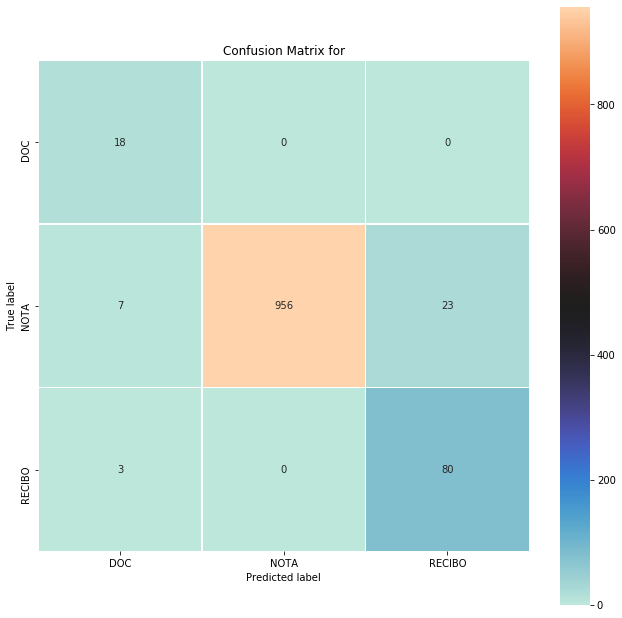

In [27]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['DOC', 'NOTA','RECIBO']


import seaborn as sns
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap="icefire",
xticklabels=classes,yticklabels=classes,linewidths=.3, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label');

In [28]:
#Refined decision tree - Extra features
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=12345)
dt.get_params().keys()
param_grid = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

##grid = GridSearchCV(dt, param_grid, cv=5)
##grid.fit(combined_train, train.out)
##print(grid.best_estimator_)

DT_best = DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=40, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
dt_pipeline = make_pipeline(RandomOverSampler(random_state=777),DT_best)

dt_model  = dt_pipeline.fit(X_train, y_train)

In [29]:
dt_results = dt_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(dt_results,y_test)

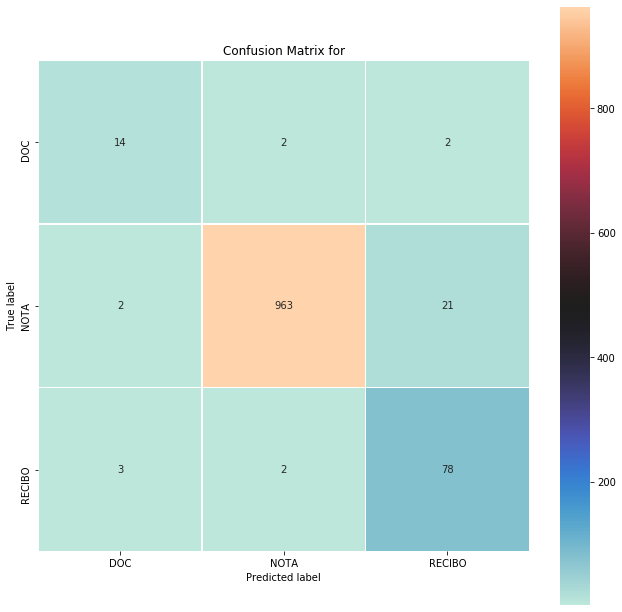

In [30]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['DOC', 'NOTA','RECIBO']


import seaborn as sns
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap="icefire",
xticklabels=classes,yticklabels=classes,linewidths=.3, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label');

In [31]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=12345)

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
rf_pipeline = make_pipeline(RandomOverSampler(random_state=777),rf)
rf_model  = rf_pipeline.fit(X_train, y_train)

In [32]:
rf_results = rf_model.predict(X_test)
rf_results_prob = rf_model.predict_proba(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(rf_results,y_test)

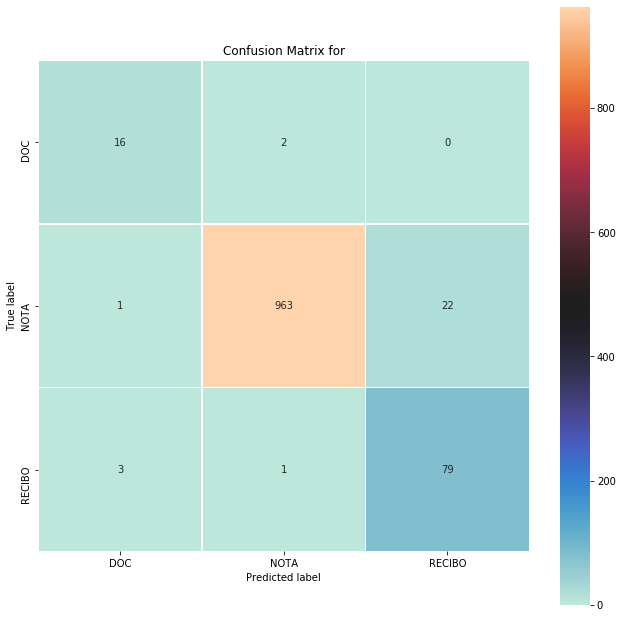

In [33]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['DOC', 'NOTA','RECIBO']


import seaborn as sns
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap="icefire",
xticklabels=classes,yticklabels=classes,linewidths=.3, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label');

In [34]:
print(rf_results_prob)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


# Ensembling the models

In [35]:
from sklearn.ensemble import VotingClassifier

In [41]:
eclf = VotingClassifier(estimators=[('Decision Tree', dt_model), ('Random Forests', rf_model), ('Linear Regression', lr_model)], voting='hard')
#eclf = VotingClassifier(estimators=[('Decision Tree', dt), ('Random Forests', rf), ('Extra Trees', et), ('Ridge Classifier', rc), ('Naive Bayes', nb)], voting='hard')

In [42]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
eclf_pipeline = make_pipeline(RandomOverSampler(random_state=777), eclf)
eclf_model =  eclf_pipeline.fit(X_test, y_test)

In [44]:
eclf_results = eclf_model.predict(X_test)
#eclf_results_prob = eclf_model.predict_proba(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(eclf_results,y_test)

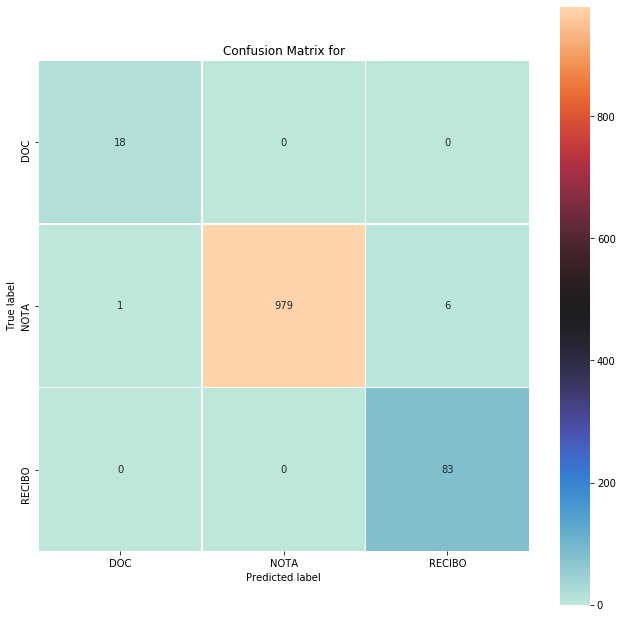

In [45]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['DOC', 'NOTA','RECIBO']


import seaborn as sns
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap="icefire",
xticklabels=classes,yticklabels=classes,linewidths=.3, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label');

# Validating with the original file df1

# Joing body text and labels

In [142]:
df = pd.read_csv("C:/AI/krypton-01/jpeg/revisado4.csv") 
##df =df.head(10000) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5433 entries, 0 to 5432
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nome    5433 non-null   object
 1   tipo    5433 non-null   object
dtypes: object(2)
memory usage: 85.0+ KB


In [143]:
df5 = pd.DataFrame (columns = ['body','label','name','label1'])

In [144]:
from os import listdir
from os.path import isfile, join
mypath1="C:/AI/Krypton-01/texto7"
onlyfiles1 = [f for f in listdir(mypath1) if isfile(join(mypath1, f))]
print(len(onlyfiles1))
#print(onlyfiles1)

1899


In [145]:
for file1 in onlyfiles1:
    #print(file1[-3:])
    #print(file1)
    #print(file1[:-4])
    if file1[-3:]=="txt":
        print(file1)
        text1 = open('C:/AI/krypton-01/texto7/'+file1, "r+",encoding = 'utf-8-sig').read()
        df2 = pd.DataFrame([[text1, "",file1[:-4],""]], columns = ['body','label','name','label1'])
        df5=df5.append(df2)
        df5.reset_index(inplace = True, drop = True)

2017-06-27_08-47_2081291.txt
2017-06-27_08-47_2328549.txt
2017-06-27_08-47_2762289.txt
2017-06-27_08-47_5632222.txt
2017-06-27_08-47_5736801.txt
2017-06-27_08-47_6630378.txt
2017-06-27_08-47_6945680.txt
2017-06-27_08-47_8612042.txt
2017-06-27_08-47_9038559.txt
2017-06-27_08-47_9573012.txt
2017-06-27_10-14_1881821.txt
2017-06-27_10-14_6049154.txt
2017-06-27_10-14_9150233.txt
2017-06-28_09-47_1035992.txt
2017-06-29_08-03_8994805.txt
2017-06-29_09-12_9030590.txt
2017-06-29_09-34_6433716.txt
2017-06-29_11-32_2407431.txt
2017-06-29_11-36_1627262.txt
2017-06-30_09-35_6552132.txt
2017-06-30_13-21_5267056.txt
2017-06-30_14-09_1190062.txt
2017-06-30_14-09_7223992.txt
2017-06-30_14-09_8651457.txt
2017-07-03_09-41_7282193.txt
2017-07-03_13-46_1323416.txt
2017-07-05_10-36_6215036.txt
2017-07-12_13-22_1686331.txt
2017-07-12_13-29_3005962.txt
2017-07-12_13-33_4405247.txt
2017-07-12_13-42_2901228.txt
2017-07-12_13-45_5733409.txt
2017-07-12_13-49_2763458.txt
2017-07-12_13-56_9712107.txt
2017-07-12_13-

2017-12-22_07-57_3603846.txt
2017-12-22_07-57_5426778.txt
2017-12-22_08-00_3866369.txt
2017-12-22_08-08_3240457.txt
2017-12-22_08-10_9736968.txt
2017-12-22_08-12_2207620.txt
2017-12-22_08-14_5467448.txt
2017-12-22_08-17_8635533.txt
2017-12-22_08-23_4311115.txt
2017-12-22_08-24_9265532.txt
2017-12-22_08-28_7856697.txt
2017-12-22_08-32_3444184.txt
2017-12-22_08-35_9534242.txt
2017-12-22_08-38_6898471.txt
2017-12-22_08-43_1557841.txt
2017-12-22_09-36_3518072.txt
2017-12-26_16-34_3368968.txt
2017-12-26_16-34_5454517.txt
2017-12-26_16-34_6323837.txt
2017-12-26_16-34_6796112.txt
2017-12-27_16-15_2429956.txt
2017-12-27_16-15_5261348.txt
2017-12-27_16-15_7893208.txt
2017-12-28_09-28_4100306.txt
2017-12-28_13-19_1056489.txt
2017-12-28_16-17_1320664.txt
2017-12-28_16-27_7642604.txt
2017-12-29_08-42_7422448.txt
2017-12-29_09-11_6357417.txt
2018-01-02_15-28_1615328.txt
2018-01-02_15-28_5778777.txt
2018-01-02_15-28_9996522.txt
2018-01-02_15-33_2441674.txt
2018-01-03_13-33_7757213.txt
2018-01-03_13-

2018-04-27_14-17_6034621.txt
2018-04-27_14-17_6848698.txt
2018-05-02_09-24_2079090.txt
2018-05-02_09-24_8355572.txt
2018-05-02_10-09_7888780.txt
2018-05-02_11-20_6293310.txt
2018-05-03_08-01_2961217.txt
2018-05-03_10-56_4727988.txt
2018-05-03_10-56_8322730.txt
2018-05-03_15-05_4529333.txt
2018-05-03_15-53_7632005.txt
2018-05-04_11-14_2174644.txt
2018-05-04_11-14_3483800.txt
2018-05-04_11-14_5724036.txt
2018-05-04_11-14_7053838.txt
2018-05-04_11-14_8765717.txt
2018-05-04_11-14_8958692.txt
2018-05-04_11-14_9899431.txt
2018-05-04_13-07_3936783.txt
2018-05-04_13-07_4558284.txt
2018-05-04_16-38_1109907.txt
2018-05-07_08-19_9794052.txt
2018-05-07_14-02_4142644.txt
2018-05-09_10-28_1049494.txt
2018-05-09_10-28_4291361.txt
2018-05-09_10-28_9817001.txt
2018-05-09_16-26_3250181.txt
2018-05-09_16-28_7019148.txt
2018-05-09_16-28_9751994.txt
2018-05-11_09-42_3150348.txt
2018-05-11_11-12_5471800.txt
2018-05-11_11-31_6694621.txt
2018-05-11_12-29_9153604.txt
2018-05-11_14-56_6885333.txt
2018-05-11_16-

2018-08-14_15-46_E_1616_6870287.txt
2018-08-16_11-12_E_1616_1349827.txt
2018-08-16_11-17_E_1616_3252249.txt
2018-08-16_16-47_E_1616_1155169.txt
2018-08-21_10-49_E_1616_3401404.txt
2018-08-21_11-01_E_1616_3563523.txt
2018-08-21_11-04_E_1616_3235595.txt
2018-08-21_11-10_E_1616_6311416.txt
2018-08-21_13-17_E_1616_1719688.txt
2018-08-21_13-17_E_1616_1910565.txt
2018-08-21_13-22_E_1616_5481619.txt
2018-08-23_11-25_E_1616_7459378.txt
2018-08-24_16-27_E_1616_6236785.txt
2018-08-27_09-17_E_1616_2078333.txt
2018-08-27_09-17_E_1616_3963684.txt
2018-08-27_13-00_E_1616_4879434.txt
2018-08-27_13-00_E_1616_5549135.txt
2018-08-27_13-00_E_1616_8984495.txt
2018-08-27_13-00_E_1616_8998539.txt
2018-08-27_13-05_E_1616_3092127.txt
2018-08-27_13-06_E_1616_1018683.txt
2018-08-27_13-07_E_1616_6564778.txt
2018-08-27_13-07_E_1616_9223174.txt
2018-08-27_13-20_E_1616_9034074.txt
2018-08-27_14-40_E_1616_9571512.txt
2018-08-28_10-25_E_1616_7991817.txt
2018-08-28_11-48_E_1616_9022201.txt
2018-08-28_17-15_E_1616_3271

2018-11-28_09-12-36-1543403556_E_1882_1748613.txt
2018-11-28_09-12-36-1543403556_E_1882_8717526.txt
2018-11-28_10-02-40-1543406560_E_1882_2946911.txt
2018-11-28_10-02-40-1543406560_E_1882_7985498.txt
2018-11-28_11-52-29-1543413149_E_1882_2675275.txt
2018-11-29_09-36-01-1543491361_E_1882_5137885.txt
2018-11-29_14-25-02-1543508702_E_1882_9801588.txt
2018-11-30_13-19-51-1543591191_E_1882_8289245.txt
2018-11-30_15-57-28-1543600648_E_1882_5644565.txt
2018-11-30_15-57-28-1543600648_E_1882_7577593.txt
2018-11-30_17-44-19-1543607059_E_1882_1026708.txt
2018-11-30_17-44-19-1543607059_E_1882_8298357.txt
2018-11-30_17-45-47-1543607147_E_1882_3069291.txt
2018-11-30_17-45-47-1543607147_E_1882_3129320.txt
2018-11-30_17-45-47-1543607147_E_1882_3559919.txt
2018-11-30_17-45-47-1543607147_E_1882_7580525.txt
2018-11-30_17-45-47-1543607147_E_1882_8567297.txt
2018-12-10_12-59-10-1544453950_E_1882_4144476.txt
2018-12-10_12-59-27-1544453967_E_1882_6602398.txt
2018-12-10_13-00-50-1544454050_E_1882_5107360.txt


2019-02-14_15-35-50-1550165750_E_1882_3691074.txt
2019-02-14_15-35-50-1550165750_E_1882_6306094.txt
2019-02-14_15-35-50-1550165750_E_1882_6866395.txt
2019-02-14_15-35-50-1550165750_E_1882_9605380.txt
2019-02-14_15-35-50-1550165750_E_1882_9892359.txt
2019-02-14_15-43-44-1550166224_E_1882_8110025.txt
2019-02-14_16-28-07-1550168887_E_1882_5413821.txt
2019-02-15_14-02-47-1550246567_E_1882_5323700.txt
2019-02-25_13-22-59-1551111779_E_1882_2816097.txt
2019-02-25_13-22-59-1551111779_E_1882_3306782.txt
2019-02-25_13-22-59-1551111779_E_1882_7969496.txt
2019-02-25_13-22-59-1551111779_E_1882_8526270.txt
2019-02-25_13-22-59-1551111779_E_1882_8928989.txt
2019-02-25_13-34-50-1551112490_E_1882_5211434-1000.txt
2019-02-25_13-34-50-1551112490_E_1882_5211434-1001.txt
2019-02-25_13-39-54-1551112794_E_1882_8508805.txt
2019-02-25_13-52-51-1551113571_E_1882_1348676.txt
2019-02-28_14-48-44-1551376124_E_1616_1498113.txt
2019-02-28_14-48-44-1551376124_E_1616_4065357.txt
2019-03-01_09-39-44-1551443984_E_1882_16

2019-05-15_14-33-04-1557941584_E_1882_5420276.txt
2019-05-15_14-33-04-1557941584_E_1882_6097303.txt
2019-05-15_14-33-04-1557941584_E_1882_6950675.txt
2019-05-15_14-33-04-1557941584_E_1882_8972552.txt
2019-05-15_14-33-04-1557941584_E_1882_9807316.txt
2019-05-15_14-38-19-1557941899_E_1882_9550448.txt
2019-05-15_14-43-44-1557942224_E_1882_1757342.txt
2019-05-15_14-43-44-1557942224_E_1882_2415967.txt
2019-05-15_14-43-44-1557942224_E_1882_4822530.txt
2019-05-15_14-43-44-1557942224_E_1882_9779919.txt
2019-05-15_14-44-27-1557942267_E_1882_3179867.txt
2019-05-15_15-59-45-1557946785_E_1882_3892398.txt
2019-05-15_16-29-15-1557948555_E_1882_2178165.txt
2019-05-15_16-31-30-1557948690_E_1882_8068499.txt
2019-05-28_11-27-09-1559053629_E_1882_3071612.txt
2019-05-29_11-10-07-1559139007_E_1882_2003889-1000.txt
2019-05-29_11-10-07-1559139007_E_1882_2003889-1001.txt
2019-05-29_11-10-07-1559139007_E_1882_2237494.txt
2019-05-29_11-10-07-1559139007_E_1882_3016019.txt
2019-05-29_11-10-07-1559139007_E_1882_32

2019-08-28_13-15-53-1567008953_E_2063_4385069.txt
2019-08-28_13-15-53-1567008953_E_2063_4865896.txt
2019-08-28_13-15-53-1567008953_E_2063_9601095.txt
2019-08-28_13-17-24-1567009044_E_2063_4798109.txt
2019-08-28_13-28-24-1567009704_E_2063_3252232.txt
2019-08-28_13-28-24-1567009704_E_2063_4957654.txt
2019-08-29_10-47-15-1567086435_E_2063_1062075.txt
2019-08-29_16-57-31-1567108651_E_2063_1431460.txt
2019-08-29_16-57-31-1567108651_E_2063_5366702.txt
2019-08-29_17-18-49-1567109929_E_2063_8090558.txt
2019-08-30_13-16-15-1567181775_E_2063_9698808.txt
2019-09-02_09-22-11-1567426931_E_1882_5314865.txt
2019-09-02_09-44-17-1567428257_E_1882_3390357.txt
2019-09-03_14-38-29-1567532309_E_2063_2228038.txt
2019-09-04_15-08-26-1567620506_E_2063_2406296.txt
2019-09-04_15-08-26-1567620506_E_2063_9850724.txt
2019-09-04_15-12-44-1567620764_E_2063_6818999.txt
2019-09-04_16-09-18-1567624158_E_2063_2905525.txt
2019-09-04_16-09-18-1567624158_E_2063_5886648.txt
2019-09-04_16-09-18-1567624158_E_2063_8091607.txt


2019-12-17_10-59-20-1576591160_E_2063_6008890.txt
2019-12-17_10-59-20-1576591160_E_2063_6698985.txt
2019-12-17_10-59-20-1576591160_E_2063_7603906.txt
2019-12-17_10-59-20-1576591160_E_2063_8732975.txt
2019-12-17_10-59-20-1576591160_E_2063_9574842.txt
2019-12-17_10-59-21-1576591161_E_2063_1626749.txt
2019-12-17_10-59-21-1576591161_E_2063_4126803.txt
2019-12-17_10-59-21-1576591161_E_2063_5612465.txt
2019-12-17_10-59-21-1576591161_E_2063_6888188.txt
2019-12-17_10-59-21-1576591161_E_2063_8402079.txt
2019-12-17_10-59-21-1576591161_E_2063_8716959.txt
2019-12-17_10-59-21-1576591161_E_2063_8746225.txt
2019-12-17_10-59-21-1576591161_E_2063_9139246.txt
2019-12-17_10-59-21-1576591161_E_2063_9322544.txt
2019-12-17_10-59-22-1576591162_E_2063_2480484.txt
2019-12-17_10-59-22-1576591162_E_2063_3123679.txt
2019-12-17_10-59-22-1576591162_E_2063_4579678.txt
2019-12-17_10-59-22-1576591162_E_2063_4970489.txt
2019-12-17_10-59-22-1576591162_E_2063_6527792.txt
2019-12-17_10-59-22-1576591162_E_2063_6833732.txt


In [146]:
df5

,body,label,name,label1
0,2017-6-26 :: NFS-e - Nota Fiscal de Serviços e...,,2017-06-27_08-47_2081291,
1,6/22/2017 :: NFS-e - Nota Fiscal de Serviços e...,,2017-06-27_08-47_2328549,
2,\n\n \n \n\n \n \n\n \n\n \n \n\n \...,,2017-06-27_08-47_2762289,
3,PR Aa isa Drica des PREFEITURA MUNICIPAL DE BA...,,2017-06-27_08-47_5632222,
4,PR Aa isa Drica des PREFEITURA MUNICIPAL DE BA...,,2017-06-27_08-47_5736801,
...,...,...,...,...
1892,26/03/2020 :: NFS-e - Nota Fiscal de Serviços ...,,2020-04-02_09-01-58-1585828918_E_2063_3340905,
1893,02/04/2020 :: NFS-e - Nota Fiscal de Serviços ...,,2020-04-02_18-25-55-1585862755_E_2063_1990695,
1894,02/04/2020 :: NFS-e - Nota Fiscal de Serviços ...,,2020-04-02_18-25-55-1585862755_E_2063_9548925,
1895,02/04/2020 :: NFS-e - Nota Fiscal de Serviços ...,,2020-04-02_18-25-56-1585862756_E_2063_7366780,


In [147]:
len1=len(df)
len2=len(df5)
for i in range(len1):
    label1x=df['tipo'][i]
    file1x=df['nome'][i]
    
    for i1 in range(len2):
        file2x=df5['name'][i1]
    
        if file1x==file2x:
            print(file1x)
            print(file2x)
            df5['label'][i1]=label1x
            if df5['label'][i1]=='NOTA':
                df5['label1'][i1]=0
            if df5['label'][i1]=='DOC':
                df5['label1'][i1]=1
            if df5['label'][i1]=='RECIBO':
                df5['label1'][i1]=2

2017-06-27_08-47_2081291
2017-06-27_08-47_2081291
2017-06-27_08-47_2328549
2017-06-27_08-47_2328549
2017-06-27_08-47_2762289
2017-06-27_08-47_2762289
2017-06-27_08-47_5632222
2017-06-27_08-47_5632222
2017-06-27_08-47_5736801
2017-06-27_08-47_5736801
2017-06-27_08-47_6630378
2017-06-27_08-47_6630378
2017-06-27_08-47_6945680
2017-06-27_08-47_6945680
2017-06-27_08-47_8612042
2017-06-27_08-47_8612042
2017-06-27_08-47_9038559
2017-06-27_08-47_9038559
2017-06-27_08-47_9573012
2017-06-27_08-47_9573012
2017-06-27_10-14_1881821
2017-06-27_10-14_1881821
2017-06-27_10-14_6049154
2017-06-27_10-14_6049154
2017-06-27_10-14_9150233
2017-06-27_10-14_9150233
2017-06-28_09-47_1035992
2017-06-28_09-47_1035992
2017-06-29_08-03_8994805
2017-06-29_08-03_8994805
2017-06-29_09-12_9030590
2017-06-29_09-12_9030590
2017-06-29_09-34_6433716
2017-06-29_09-34_6433716
2017-06-29_11-32_2407431
2017-06-29_11-32_2407431
2017-06-29_11-36_1627262
2017-06-29_11-36_1627262
2017-06-30_09-35_6552132
2017-06-30_09-35_6552132


2017-09-29_16-00_5811245
2017-09-29_16-00_5811245
2017-09-29_17-16_6851849
2017-09-29_17-16_6851849
2017-10-02_11-14_6825496
2017-10-02_11-14_6825496
2017-10-02_11-14_8732709
2017-10-02_11-14_8732709
2017-10-02_11-14_8899136
2017-10-02_11-14_8899136
2017-10-02_11-14_9534132
2017-10-02_11-14_9534132
2017-10-02_11-15_4760653
2017-10-02_11-15_4760653
2017-10-03_13-37_6431888
2017-10-03_13-37_6431888
2017-10-04_13-32_5230792
2017-10-04_13-32_5230792
2017-10-05_13-10_4359841
2017-10-05_13-10_4359841
2017-10-09_10-27_6652302
2017-10-09_10-27_6652302
2017-10-09_10-28_6456183
2017-10-09_10-28_6456183
2017-10-09_10-30_6630596
2017-10-09_10-30_6630596
2017-10-09_10-33_2830900
2017-10-09_10-33_2830900
2017-10-09_10-34_6002461
2017-10-09_10-34_6002461
2017-10-09_10-36_5497441
2017-10-09_10-36_5497441
2017-10-09_11-43_1508113
2017-10-09_11-43_1508113
2017-10-09_11-50_9918536
2017-10-09_11-50_9918536
2017-10-10_16-20_9678202
2017-10-10_16-20_9678202
2017-10-16_15-39_5167893
2017-10-16_15-39_5167893


2018-01-09_13-25_9775293
2018-01-09_13-25_9775293
2018-01-10_15-52_1318145
2018-01-10_15-52_1318145
2018-01-11_15-05_2250309
2018-01-11_15-05_2250309
2018-01-12_13-38_2647915
2018-01-12_13-38_2647915
2018-01-12_13-38_4917974
2018-01-12_13-38_4917974
2018-01-12_13-45_7190419
2018-01-12_13-45_7190419
2018-01-16_14-08_1528285
2018-01-16_14-08_1528285
2018-01-17_16-17_8817756
2018-01-17_16-17_8817756
2018-01-19_11-11_4808386
2018-01-19_11-11_4808386
2018-01-19_11-15_8873451
2018-01-19_11-15_8873451
2018-01-19_13-28_5472258
2018-01-19_13-28_5472258
2018-01-19_13-35_4938647
2018-01-19_13-35_4938647
2018-01-19_15-16_9827151
2018-01-19_15-16_9827151
2018-01-19_15-22_7395065
2018-01-19_15-22_7395065
2018-01-19_15-23_2129730
2018-01-19_15-23_2129730
2018-01-22_16-13_8897785
2018-01-22_16-13_8897785
2018-01-24_16-47_9558355
2018-01-24_16-47_9558355
2018-01-24_16-58_1290345
2018-01-24_16-58_1290345
2018-01-25_16-12_2072511
2018-01-25_16-12_2072511
2018-01-26_10-45_2597961
2018-01-26_10-45_2597961


2018-04-10_09-20_7038392
2018-04-10_09-20_7038392
2018-04-10_09-20_7054457
2018-04-10_09-20_7054457
2018-04-10_10-48_3746519
2018-04-10_10-48_3746519
2018-04-10_10-55_4542888
2018-04-10_10-55_4542888
2018-04-10_11-23_2892485
2018-04-10_11-23_2892485
2018-04-10_11-23_2926912
2018-04-10_11-23_2926912
2018-04-10_11-23_4075982
2018-04-10_11-23_4075982
2018-04-10_11-23_4492705
2018-04-10_11-23_4492705
2018-04-10_11-27_5430877
2018-04-10_11-27_5430877
2018-04-10_11-31_6140641-0
2018-04-10_11-31_6140641-0
2018-04-10_11-31_6140641-1
2018-04-10_11-31_6140641-1
2018-04-10_12-58_7850811
2018-04-10_12-58_7850811
2018-04-10_13-02_3187477
2018-04-10_13-02_3187477
2018-04-10_13-02_4473507
2018-04-10_13-02_4473507
2018-04-10_13-02_5736502
2018-04-10_13-02_5736502
2018-04-10_13-02_8536508
2018-04-10_13-02_8536508
2018-04-10_13-16_6210061
2018-04-10_13-16_6210061
2018-04-10_13-19_6347715
2018-04-10_13-19_6347715
2018-04-10_13-25_1356593
2018-04-10_13-25_1356593
2018-04-10_13-45_2642147
2018-04-10_13-45_

2018-06-12_10-51_2064613
2018-06-12_10-51_2064613
2018-06-13_10-03_1490630
2018-06-13_10-03_1490630
2018-06-13_10-08_1355453
2018-06-13_10-08_1355453
2018-06-13_10-24_3776836
2018-06-13_10-24_3776836
2018-06-13_12-39_5851742
2018-06-13_12-39_5851742
2018-06-13_12-45_6061911
2018-06-13_12-45_6061911
2018-06-13_13-41_5469436
2018-06-13_13-41_5469436
2018-06-13_15-26_5160434
2018-06-13_15-26_5160434
2018-06-13_15-55_2010985
2018-06-13_15-55_2010985
2018-06-14_10-56_5518274
2018-06-14_10-56_5518274
2018-06-19_14-51_2772616
2018-06-19_14-51_2772616
2018-06-19_14-51_8340749
2018-06-19_14-51_8340749
2018-06-20_08-27_9066524
2018-06-20_08-27_9066524
2018-06-20_08-27_9506768
2018-06-20_08-27_9506768
2018-06-20_08-32_3018432
2018-06-20_08-32_3018432
2018-06-20_08-32_6047263
2018-06-20_08-32_6047263
2018-06-20_09-39_4487471
2018-06-20_09-39_4487471
2018-06-20_09-58_9135284
2018-06-20_09-58_9135284
2018-06-20_10-06_3864965
2018-06-20_10-06_3864965
2018-06-20_14-37_5632578
2018-06-20_14-37_5632578


2018-08-14_14-30_E_1616_2308345
2018-08-14_14-30_E_1616_2308345
2018-08-14_14-30_E_1616_4139315
2018-08-14_14-30_E_1616_4139315
2018-08-14_14-37_E_1616_2525525
2018-08-14_14-37_E_1616_2525525
2018-08-14_14-41_E_1616_8756700
2018-08-14_14-41_E_1616_8756700
2018-08-14_14-59_E_1616_5390013
2018-08-14_14-59_E_1616_5390013
2018-08-14_15-08_E_1616_2362917
2018-08-14_15-08_E_1616_2362917
2018-08-14_15-08_E_1616_3142263
2018-08-14_15-08_E_1616_3142263
2018-08-14_15-08_E_1616_6778034
2018-08-14_15-08_E_1616_6778034
2018-08-14_15-08_E_1616_6976144
2018-08-14_15-08_E_1616_6976144
2018-08-14_15-12_E_1616_6621647
2018-08-14_15-12_E_1616_6621647
2018-08-14_15-17_E_1616_9648243
2018-08-14_15-17_E_1616_9648243
2018-08-14_15-19_E_1616_7340690
2018-08-14_15-19_E_1616_7340690
2018-08-14_15-22_E_1616_5689148
2018-08-14_15-22_E_1616_5689148
2018-08-14_15-31_E_1616_9720959
2018-08-14_15-31_E_1616_9720959
2018-08-14_15-33_E_1616_3575282
2018-08-14_15-33_E_1616_3575282
2018-08-14_15-46_E_1616_1929707
2018-08-

2018-10-10_14-50_E_1616_8332453
2018-10-10_14-50_E_1616_8332453
2018-10-10_14-52_E_1616_4415168
2018-10-10_14-52_E_1616_4415168
2018-10-10_14-57_E_1616_4080888
2018-10-10_14-57_E_1616_4080888
2018-10-10_14-59_E_1616_6460432
2018-10-10_14-59_E_1616_6460432
2018-10-10_15-01_E_1616_5757251
2018-10-10_15-01_E_1616_5757251
2018-10-10_15-03_E_1616_7332640
2018-10-10_15-03_E_1616_7332640
2018-10-10_15-05_E_1616_7066970
2018-10-10_15-05_E_1616_7066970
2018-10-10_15-07_E_1616_1400424
2018-10-10_15-07_E_1616_1400424
2018-10-10_15-12_E_1616_1253537
2018-10-10_15-12_E_1616_1253537
2018-10-10_15-16_E_1616_2557171
2018-10-10_15-16_E_1616_2557171
2018-10-10_15-18_E_1616_5411487
2018-10-10_15-18_E_1616_5411487
2018-10-10_15-19_E_1882_4409468
2018-10-10_15-19_E_1882_4409468
2018-10-10_15-24_E_1882_1488371
2018-10-10_15-24_E_1882_1488371
2018-10-10_15-51_E_1616_7856843
2018-10-10_15-51_E_1616_7856843
2018-10-10_15-53_E_1616_5182743
2018-10-10_15-53_E_1616_5182743
2018-10-10_16-04_E_1616_1244905
2018-10-

2018-11-27_15-30-45-1543339845_E_1882_3697048
2018-11-27_15-30-45-1543339845_E_1882_3697048
2018-11-28_08-27-13-1543400833_E_1882_6540663
2018-11-28_08-27-13-1543400833_E_1882_6540663
2018-11-28_08-28-22-1543400902_E_1882_3005500
2018-11-28_08-28-22-1543400902_E_1882_3005500
2018-11-28_09-01-21-1543402881_E_1882_1160546
2018-11-28_09-01-21-1543402881_E_1882_1160546
2018-11-28_09-01-21-1543402881_E_1882_1731127
2018-11-28_09-01-21-1543402881_E_1882_1731127
2018-11-28_09-12-36-1543403556_E_1882_1748613
2018-11-28_09-12-36-1543403556_E_1882_1748613
2018-11-28_09-12-36-1543403556_E_1882_8717526
2018-11-28_09-12-36-1543403556_E_1882_8717526
2018-11-28_10-02-40-1543406560_E_1882_2946911
2018-11-28_10-02-40-1543406560_E_1882_2946911
2018-11-28_10-02-40-1543406560_E_1882_7985498
2018-11-28_10-02-40-1543406560_E_1882_7985498
2018-11-28_11-52-29-1543413149_E_1882_2675275
2018-11-28_11-52-29-1543413149_E_1882_2675275
2018-11-29_09-36-01-1543491361_E_1882_5137885
2018-11-29_09-36-01-1543491361_E_1

2019-01-10_12-46-26-1547131586_E_1616_2799824
2019-01-10_12-46-26-1547131586_E_1616_2799824
2019-01-10_12-46-26-1547131586_E_1616_2879766
2019-01-10_12-46-26-1547131586_E_1616_2879766
2019-01-10_12-46-26-1547131586_E_1616_4006161
2019-01-10_12-46-26-1547131586_E_1616_4006161
2019-01-10_12-46-26-1547131586_E_1616_4180359
2019-01-10_12-46-26-1547131586_E_1616_4180359
2019-01-10_12-46-26-1547131586_E_1616_6082437
2019-01-10_12-46-26-1547131586_E_1616_6082437
2019-01-10_12-46-26-1547131586_E_1616_8175592
2019-01-10_12-46-26-1547131586_E_1616_8175592
2019-01-10_12-46-27-1547131587_E_1616_1266221
2019-01-10_12-46-27-1547131587_E_1616_1266221
2019-01-10_12-46-27-1547131587_E_1616_1300359
2019-01-10_12-46-27-1547131587_E_1616_1300359
2019-01-10_12-46-27-1547131587_E_1616_1712954
2019-01-10_12-46-27-1547131587_E_1616_1712954
2019-01-10_12-46-27-1547131587_E_1616_2760830
2019-01-10_12-46-27-1547131587_E_1616_2760830
2019-01-10_12-46-27-1547131587_E_1616_3130147
2019-01-10_12-46-27-1547131587_E_1

2019-02-25_13-22-59-1551111779_E_1882_3306782
2019-02-25_13-22-59-1551111779_E_1882_3306782
2019-02-25_13-22-59-1551111779_E_1882_7969496
2019-02-25_13-22-59-1551111779_E_1882_7969496
2019-02-25_13-22-59-1551111779_E_1882_8526270
2019-02-25_13-22-59-1551111779_E_1882_8526270
2019-02-25_13-22-59-1551111779_E_1882_8928989
2019-02-25_13-22-59-1551111779_E_1882_8928989
2019-02-25_13-34-50-1551112490_E_1882_5211434-1000
2019-02-25_13-34-50-1551112490_E_1882_5211434-1000
2019-02-25_13-34-50-1551112490_E_1882_5211434-1001
2019-02-25_13-34-50-1551112490_E_1882_5211434-1001
2019-02-25_13-39-54-1551112794_E_1882_8508805
2019-02-25_13-39-54-1551112794_E_1882_8508805
2019-02-25_13-52-51-1551113571_E_1882_1348676
2019-02-25_13-52-51-1551113571_E_1882_1348676
2019-02-28_14-48-44-1551376124_E_1616_1498113
2019-02-28_14-48-44-1551376124_E_1616_1498113
2019-02-28_14-48-44-1551376124_E_1616_4065357
2019-02-28_14-48-44-1551376124_E_1616_4065357
2019-03-01_09-39-44-1551443984_E_1882_1627327
2019-03-01_09-

2019-04-11_13-34-58-1555000498_E_1882_9623919
2019-04-11_13-34-58-1555000498_E_1882_9623919
2019-04-11_13-36-47-1555000607_E_1882_8092492
2019-04-11_13-36-47-1555000607_E_1882_8092492
2019-04-11_13-45-52-1555001152_E_1882_3329840
2019-04-11_13-45-52-1555001152_E_1882_3329840
2019-04-11_13-45-52-1555001152_E_1882_4587620
2019-04-11_13-45-52-1555001152_E_1882_4587620
2019-04-11_13-45-52-1555001152_E_1882_5014872
2019-04-11_13-45-52-1555001152_E_1882_5014872
2019-04-11_13-48-37-1555001317_E_1882_1337445
2019-04-11_13-48-37-1555001317_E_1882_1337445
2019-04-11_13-48-38-1555001318_E_1882_2547127
2019-04-11_13-48-38-1555001318_E_1882_2547127
2019-04-11_13-49-45-1555001385_E_1882_2771696
2019-04-11_13-49-45-1555001385_E_1882_2771696
2019-04-11_13-52-24-1555001544_E_1882_2477106
2019-04-11_13-52-24-1555001544_E_1882_2477106
2019-04-11_13-52-24-1555001544_E_1882_7470532
2019-04-11_13-52-24-1555001544_E_1882_7470532
2019-04-11_14-59-55-1555005595_E_1882_1858162
2019-04-11_14-59-55-1555005595_E_1

2019-05-29_11-25-28-1559139928_E_1882_1965991
2019-05-29_11-25-28-1559139928_E_1882_1965991
2019-05-29_11-25-28-1559139928_E_1882_7227170
2019-05-29_11-25-28-1559139928_E_1882_7227170
2019-05-29_13-19-11-1559146751_E_1882_3185912
2019-05-29_13-19-11-1559146751_E_1882_3185912
2019-05-29_13-19-11-1559146751_E_1882_8081571
2019-05-29_13-19-11-1559146751_E_1882_8081571
2019-05-29_13-19-11-1559146751_E_1882_9450759
2019-05-29_13-19-11-1559146751_E_1882_9450759
2019-05-29_13-45-39-1559148339_E_1882_6869544
2019-05-29_13-45-39-1559148339_E_1882_6869544
2019-05-30_10-29-52-1559222992_E_1882_8616411
2019-05-30_10-29-52-1559222992_E_1882_8616411
2019-06-03_10-28-39-1559568519_E_1882_7854371
2019-06-03_10-28-39-1559568519_E_1882_7854371
2019-06-03_10-28-39-1559568519_E_1882_8606523
2019-06-03_10-28-39-1559568519_E_1882_8606523
2019-06-03_10-56-23-1559570183_E_1882_1003906
2019-06-03_10-56-23-1559570183_E_1882_1003906
2019-06-03_10-56-23-1559570183_E_1882_9773127
2019-06-03_10-56-23-1559570183_E_1

2019-07-16_11-22-53-1563286973_E_1882_3164988
2019-07-16_11-22-53-1563286973_E_1882_3164988
2019-07-16_11-22-53-1563286973_E_1882_4463252
2019-07-16_11-22-53-1563286973_E_1882_4463252
2019-07-16_11-22-53-1563286973_E_1882_4839588
2019-07-16_11-22-53-1563286973_E_1882_4839588
2019-07-16_11-22-53-1563286973_E_1882_5669682
2019-07-16_11-22-53-1563286973_E_1882_5669682
2019-07-16_11-22-53-1563286973_E_1882_5944879
2019-07-16_11-22-53-1563286973_E_1882_5944879
2019-07-16_11-22-53-1563286973_E_1882_5983229
2019-07-16_11-22-53-1563286973_E_1882_5983229
2019-07-16_11-22-53-1563286973_E_1882_7400736
2019-07-16_11-22-53-1563286973_E_1882_7400736
2019-07-16_11-22-53-1563286973_E_1882_8830046
2019-07-16_11-22-53-1563286973_E_1882_8830046
2019-07-16_11-22-53-1563286973_E_1882_9879764
2019-07-16_11-22-53-1563286973_E_1882_9879764
2019-07-16_14-01-15-1563296475_E_1882_3223484
2019-07-16_14-01-15-1563296475_E_1882_3223484
2019-07-16_14-01-15-1563296475_E_1882_7330362
2019-07-16_14-01-15-1563296475_E_1

2019-09-16_16-30-44-1568662244_E_2063_2984686
2019-09-16_16-30-44-1568662244_E_2063_2984686
2019-09-16_16-30-44-1568662244_E_2063_9689466
2019-09-16_16-30-44-1568662244_E_2063_9689466
2019-09-17_08-41-47-1568720507_E_2063_2260824
2019-09-17_08-41-47-1568720507_E_2063_2260824
2019-09-17_09-56-16-1568724976_E_2063_2077668
2019-09-17_09-56-16-1568724976_E_2063_2077668
2019-09-20_10-57-05-1568987825_E_1882_6890640
2019-09-20_10-57-05-1568987825_E_1882_6890640
2019-09-20_15-10-40-1569003040_E_2063_2777297
2019-09-20_15-10-40-1569003040_E_2063_2777297
2019-09-20_15-10-40-1569003040_E_2063_9240698
2019-09-20_15-10-40-1569003040_E_2063_9240698
2019-09-20_15-10-41-1569003041_E_2063_6762900
2019-09-20_15-10-41-1569003041_E_2063_6762900
2019-09-23_08-35-47-1569238547_E_2063_6598432
2019-09-23_08-35-47-1569238547_E_2063_6598432
2019-09-25_08-56-08-1569412568_E_2063_8792473
2019-09-25_08-56-08-1569412568_E_2063_8792473
2019-09-25_08-56-52-1569412612_E_2063_2719464
2019-09-25_08-56-52-1569412612_E_2

2019-11-20_11-48-29-1574261309_E_2063_6929812
2019-11-20_11-48-29-1574261309_E_2063_6929812
2019-11-20_11-50-07-1574261407_E_2063_9347251
2019-11-20_11-50-07-1574261407_E_2063_9347251
2019-11-20_11-51-55-1574261515_E_2063_4254083
2019-11-20_11-51-55-1574261515_E_2063_4254083
2019-11-20_11-53-56-1574261636_E_2063_2067328
2019-11-20_11-53-56-1574261636_E_2063_2067328
2019-11-20_11-53-56-1574261636_E_2063_7004477
2019-11-20_11-53-56-1574261636_E_2063_7004477
2019-11-20_11-53-56-1574261636_E_2063_7745864
2019-11-20_11-53-56-1574261636_E_2063_7745864
2019-11-20_11-53-56-1574261636_E_2063_8056152
2019-11-20_11-53-56-1574261636_E_2063_8056152
2019-11-20_11-54-24-1574261664_E_2063_6242567
2019-11-20_11-54-24-1574261664_E_2063_6242567
2019-11-20_11-55-16-1574261716_E_2063_3285208
2019-11-20_11-55-16-1574261716_E_2063_3285208
2019-11-20_11-55-16-1574261716_E_2063_4548395
2019-11-20_11-55-16-1574261716_E_2063_4548395
2019-11-20_11-55-16-1574261716_E_2063_9030225
2019-11-20_11-55-16-1574261716_E_2

2020-01-15_15-29-31-1579112971_E_2063_9549653
2020-01-15_15-29-31-1579112971_E_2063_9549653
2020-01-15_15-29-32-1579112972_E_2063_1945777
2020-01-15_15-29-32-1579112972_E_2063_1945777
2020-01-15_15-29-32-1579112972_E_2063_2083032
2020-01-15_15-29-32-1579112972_E_2063_2083032
2020-01-15_15-29-32-1579112972_E_2063_2354543
2020-01-15_15-29-32-1579112972_E_2063_2354543
2020-01-15_15-29-32-1579112972_E_2063_2413434
2020-01-15_15-29-32-1579112972_E_2063_2413434
2020-01-15_15-29-32-1579112972_E_2063_4289263
2020-01-15_15-29-32-1579112972_E_2063_4289263
2020-01-15_15-29-32-1579112972_E_2063_5721473
2020-01-15_15-29-32-1579112972_E_2063_5721473
2020-01-15_15-29-32-1579112972_E_2063_7537016
2020-01-15_15-29-32-1579112972_E_2063_7537016
2020-01-15_15-29-32-1579112972_E_2063_7630724
2020-01-15_15-29-32-1579112972_E_2063_7630724
2020-01-15_15-29-32-1579112972_E_2063_7751086
2020-01-15_15-29-32-1579112972_E_2063_7751086
2020-01-15_15-29-32-1579112972_E_2063_9740286
2020-01-15_15-29-32-1579112972_E_2

2020-03-17_15-22-43-1584469363_E_2063_7731492
2020-03-17_15-22-43-1584469363_E_2063_7731492
2020-03-17_15-22-43-1584469363_E_2063_8306969
2020-03-17_15-22-43-1584469363_E_2063_8306969
2020-03-17_15-22-43-1584469363_E_2063_9754489
2020-03-17_15-22-43-1584469363_E_2063_9754489
2020-03-17_15-22-44-1584469364_E_2063_6325846
2020-03-17_15-22-44-1584469364_E_2063_6325846
2020-03-17_15-22-44-1584469364_E_2063_9965079
2020-03-17_15-22-44-1584469364_E_2063_9965079
2020-04-02_08-51-59-1585828319_E_2063_8461913
2020-04-02_08-51-59-1585828319_E_2063_8461913
2020-04-02_08-52-00-1585828320_E_2063_9190421
2020-04-02_08-52-00-1585828320_E_2063_9190421
2020-04-02_08-52-45-1585828365_E_2063_2929464
2020-04-02_08-52-45-1585828365_E_2063_2929464
2020-04-02_08-52-45-1585828365_E_2063_4450213
2020-04-02_08-52-45-1585828365_E_2063_4450213
2020-04-02_08-53-50-1585828430_E_2063_3277925
2020-04-02_08-53-50-1585828430_E_2063_3277925
2020-04-02_08-56-12-1585828572_E_2063_4174610
2020-04-02_08-56-12-1585828572_E_2

In [148]:
df5

,body,label,name,label1
0,2017-6-26 :: NFS-e - Nota Fiscal de Serviços e...,NOTA,2017-06-27_08-47_2081291,0
1,6/22/2017 :: NFS-e - Nota Fiscal de Serviços e...,NOTA,2017-06-27_08-47_2328549,0
2,\n\n \n \n\n \n \n\n \n\n \n \n\n \...,DOC,2017-06-27_08-47_2762289,1
3,PR Aa isa Drica des PREFEITURA MUNICIPAL DE BA...,NOTA,2017-06-27_08-47_5632222,0
4,PR Aa isa Drica des PREFEITURA MUNICIPAL DE BA...,NOTA,2017-06-27_08-47_5736801,0
...,...,...,...,...
1892,26/03/2020 :: NFS-e - Nota Fiscal de Serviços ...,NOTA,2020-04-02_09-01-58-1585828918_E_2063_3340905,0
1893,02/04/2020 :: NFS-e - Nota Fiscal de Serviços ...,NOTA,2020-04-02_18-25-55-1585862755_E_2063_1990695,0
1894,02/04/2020 :: NFS-e - Nota Fiscal de Serviços ...,NOTA,2020-04-02_18-25-55-1585862755_E_2063_9548925,0
1895,02/04/2020 :: NFS-e - Nota Fiscal de Serviços ...,NOTA,2020-04-02_18-25-56-1585862756_E_2063_7366780,0


In [149]:
df5 = df5[((df5['label']) != "")]
df5.reset_index(inplace = True, drop = True)

In [150]:
df5

,body,label,name,label1
0,2017-6-26 :: NFS-e - Nota Fiscal de Serviços e...,NOTA,2017-06-27_08-47_2081291,0
1,6/22/2017 :: NFS-e - Nota Fiscal de Serviços e...,NOTA,2017-06-27_08-47_2328549,0
2,\n\n \n \n\n \n \n\n \n\n \n \n\n \...,DOC,2017-06-27_08-47_2762289,1
3,PR Aa isa Drica des PREFEITURA MUNICIPAL DE BA...,NOTA,2017-06-27_08-47_5632222,0
4,PR Aa isa Drica des PREFEITURA MUNICIPAL DE BA...,NOTA,2017-06-27_08-47_5736801,0
...,...,...,...,...
1885,26/03/2020 :: NFS-e - Nota Fiscal de Serviços ...,NOTA,2020-04-02_09-01-58-1585828918_E_2063_3340905,0
1886,02/04/2020 :: NFS-e - Nota Fiscal de Serviços ...,NOTA,2020-04-02_18-25-55-1585862755_E_2063_1990695,0
1887,02/04/2020 :: NFS-e - Nota Fiscal de Serviços ...,NOTA,2020-04-02_18-25-55-1585862755_E_2063_9548925,0
1888,02/04/2020 :: NFS-e - Nota Fiscal de Serviços ...,NOTA,2020-04-02_18-25-56-1585862756_E_2063_7366780,0


In [151]:
df5['label'].value_counts()[:50]

NOTA      1787
RECIBO      76
DOC         27
Name: label, dtype: int64

In [152]:
# apply clean function to body
for i in range(len(df5)):
      df5["body"][i]= clean(str(df5["body"][i]))
      print(i,df5['name'][i])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


0 2017-06-27_08-47_2081291
1 2017-06-27_08-47_2328549
2 2017-06-27_08-47_2762289
3 2017-06-27_08-47_5632222
4 2017-06-27_08-47_5736801
5 2017-06-27_08-47_6630378
6 2017-06-27_08-47_6945680
7 2017-06-27_08-47_8612042
8 2017-06-27_08-47_9038559
9 2017-06-27_08-47_9573012
10 2017-06-27_10-14_1881821
11 2017-06-27_10-14_6049154
12 2017-06-27_10-14_9150233
13 2017-06-28_09-47_1035992
14 2017-06-29_08-03_8994805
15 2017-06-29_09-12_9030590
16 2017-06-29_09-34_6433716
17 2017-06-29_11-32_2407431
18 2017-06-29_11-36_1627262
19 2017-06-30_09-35_6552132
20 2017-06-30_13-21_5267056
21 2017-06-30_14-09_1190062
22 2017-06-30_14-09_7223992
23 2017-06-30_14-09_8651457
24 2017-07-03_09-41_7282193
25 2017-07-03_13-46_1323416
26 2017-07-05_10-36_6215036
27 2017-07-12_13-22_1686331
28 2017-07-12_13-29_3005962
29 2017-07-12_13-33_4405247
30 2017-07-12_13-42_2901228
31 2017-07-12_13-45_5733409
32 2017-07-12_13-49_2763458
33 2017-07-12_13-56_9712107
34 2017-07-12_13-58_8499946
35 2017-07-13_08-31_5786745
36

348 2018-01-22_16-13_8897785
349 2018-01-24_16-47_9558355
350 2018-01-24_16-58_1290345
351 2018-01-25_16-12_2072511
352 2018-01-26_10-45_2597961
353 2018-01-26_10-47_2119791
354 2018-01-26_10-47_9753365
355 2018-01-29_09-38_8193832
356 2018-02-02_08-13_8467075
357 2018-02-02_08-13_8998855
358 2018-02-02_10-49_4867878-0
359 2018-02-02_10-49_4867878-1
360 2018-02-05_10-41_2320421
361 2018-02-05_10-47_7536559
362 2018-02-05_10-53_5743589
363 2018-02-05_11-20_8500988
364 2018-02-05_12-54_3658750
365 2018-02-05_12-56_9805924
366 2018-02-05_12-58_9304123
367 2018-02-05_12-58_9668757
368 2018-02-05_13-04_1337612
369 2018-02-05_13-07_2939278
370 2018-02-15_08-55_2533665
371 2018-02-16_08-12_1624937
372 2018-02-16_08-42_7950898
373 2018-02-19_10-23_3684686
374 2018-02-19_10-25_3717353
375 2018-02-19_10-25_7973171
376 2018-02-19_15-04_5296473
377 2018-02-20_16-17_2552524
378 2018-02-21_14-40_4130289
379 2018-02-21_14-53_3192982
380 2018-02-21_14-59_9074143
381 2018-02-22_16-18_5546981
382 2018-0

677 2018-06-20_08-32_3018432
678 2018-06-20_08-32_6047263
679 2018-06-20_09-39_4487471
680 2018-06-20_09-58_9135284
681 2018-06-20_10-06_3864965
682 2018-06-20_14-37_5632578
683 2018-06-20_14-37_6916731
684 2018-06-21_10-56_7060207
685 2018-06-21_13-45_6035828
686 2018-06-21_16-34_1039271
687 2018-06-22_16-33_4825773
688 2018-06-22_16-34_8277952
689 2018-06-22_16-36_3021395
690 2018-06-22_16-37_9126345
691 2018-06-22_16-38_4068738
692 2018-06-22_16-38_4661697
693 2018-06-22_16-38_7213924
694 2018-06-22_16-38_9994632
695 2018-06-22_16-40_5202057
696 2018-06-22_16-43_5752856
697 2018-06-22_16-44_1560583
698 2018-06-25_12-55_7803573
699 2018-06-25_13-26_5581971
700 2018-06-25_13-27_9271342
701 2018-06-25_13-31_6369480
702 2018-06-25_13-33_4619081
703 2018-06-25_13-43_3840644
704 2018-06-25_13-49_9183248
705 2018-06-25_13-54_7686108
706 2018-06-25_13-57_9074989
707 2018-06-25_14-03_5011623
708 2018-06-25_14-06_5658973
709 2018-06-25_14-08_8473289
710 2018-06-25_14-17_2807438
711 2018-06-25

940 2018-10-04_14-09_E_1882_9627799
941 2018-10-04_14-27_E_1616_7607017
942 2018-10-08_13-58_E_1882_4058301
943 2018-10-08_14-19_E_1882_5415103
944 2018-10-08_17-23_E_1616_2957888
945 2018-10-10_14-41_E_1616_6923966
946 2018-10-10_14-45_E_1616_3215710
947 2018-10-10_14-46_E_1616_3657441
948 2018-10-10_14-50_E_1616_8332453
949 2018-10-10_14-52_E_1616_4415168
950 2018-10-10_14-57_E_1616_4080888
951 2018-10-10_14-59_E_1616_6460432
952 2018-10-10_15-01_E_1616_5757251
953 2018-10-10_15-03_E_1616_7332640
954 2018-10-10_15-05_E_1616_7066970
955 2018-10-10_15-07_E_1616_1400424
956 2018-10-10_15-12_E_1616_1253537
957 2018-10-10_15-16_E_1616_2557171
958 2018-10-10_15-18_E_1616_5411487
959 2018-10-10_15-19_E_1882_4409468
960 2018-10-10_15-24_E_1882_1488371
961 2018-10-10_15-51_E_1616_7856843
962 2018-10-10_15-53_E_1616_5182743
963 2018-10-10_16-04_E_1616_1244905
964 2018-10-10_16-04_E_1616_3293507
965 2018-10-10_16-04_E_1616_4622786
966 2018-10-11_11-22_E_1616_4130926
967 2018-10-11_14-26_E_1616_

1227 2019-02-14_15-35-50-1550165750_E_1882_3691074
1228 2019-02-14_15-35-50-1550165750_E_1882_6306094
1229 2019-02-14_15-35-50-1550165750_E_1882_6866395
1230 2019-02-14_15-35-50-1550165750_E_1882_9605380
1231 2019-02-14_15-35-50-1550165750_E_1882_9892359
1232 2019-02-14_15-43-44-1550166224_E_1882_8110025
1233 2019-02-14_16-28-07-1550168887_E_1882_5413821
1234 2019-02-15_14-02-47-1550246567_E_1882_5323700
1235 2019-02-25_13-22-59-1551111779_E_1882_2816097
1236 2019-02-25_13-22-59-1551111779_E_1882_3306782
1237 2019-02-25_13-22-59-1551111779_E_1882_7969496
1238 2019-02-25_13-22-59-1551111779_E_1882_8526270
1239 2019-02-25_13-22-59-1551111779_E_1882_8928989
1240 2019-02-25_13-34-50-1551112490_E_1882_5211434-1000
1241 2019-02-25_13-34-50-1551112490_E_1882_5211434-1001
1242 2019-02-25_13-39-54-1551112794_E_1882_8508805
1243 2019-02-25_13-52-51-1551113571_E_1882_1348676
1244 2019-02-28_14-48-44-1551376124_E_1616_1498113
1245 2019-02-28_14-48-44-1551376124_E_1616_4065357
1246 2019-03-01_09-39

1416 2019-05-29_11-10-07-1559139007_E_1882_8146919
1417 2019-05-29_11-20-04-1559139604_E_1882_6039135
1418 2019-05-29_11-25-28-1559139928_E_1882_1965991
1419 2019-05-29_11-25-28-1559139928_E_1882_7227170
1420 2019-05-29_13-19-11-1559146751_E_1882_3185912
1421 2019-05-29_13-19-11-1559146751_E_1882_8081571
1422 2019-05-29_13-19-11-1559146751_E_1882_9450759
1423 2019-05-29_13-45-39-1559148339_E_1882_6869544
1424 2019-05-30_10-29-52-1559222992_E_1882_8616411
1425 2019-06-03_10-28-39-1559568519_E_1882_7854371
1426 2019-06-03_10-28-39-1559568519_E_1882_8606523
1427 2019-06-03_10-56-23-1559570183_E_1882_1003906
1428 2019-06-03_10-56-23-1559570183_E_1882_9773127
1429 2019-06-04_11-16-54-1559657814_E_1882_4013704
1430 2019-06-05_08-36-38-1559734598_E_1882_3238308
1431 2019-06-07_16-39-59-1559936399_E_1882_8079845
1432 2019-06-10_09-07-03-1560168423_E_1882_7764370
1433 2019-06-19_10-08-55-1560949735_E_1882_2049211
1434 2019-06-19_10-08-55-1560949735_E_1882_7209045
1435 2019-06-19_10-08-55-156094

1656 2019-10-22_10-46-37-1571751997_E_2063_9264185
1657 2019-10-22_10-53-57-1571752437_E_2063_6603890
1658 2019-10-22_10-57-24-1571752644_E_2063_8672559
1659 2019-10-29_17-26-19-1572380779_E_2063_4638575
1660 2019-10-30_09-49-34-1572439774_E_2063_3141556
1661 2019-10-31_09-15-18-1572524118_E_2063_3261682
1662 2019-10-31_09-15-18-1572524118_E_2063_4773734
1663 2019-10-31_09-15-18-1572524118_E_2063_5751487
1664 2019-10-31_09-15-18-1572524118_E_2063_6016048
1665 2019-10-31_09-15-18-1572524118_E_2063_7816437
1666 2019-10-31_09-15-18-1572524118_E_2063_7935168
1667 2019-10-31_09-15-19-1572524119_E_2063_3338416
1668 2019-10-31_09-15-19-1572524119_E_2063_3642707
1669 2019-10-31_09-15-19-1572524119_E_2063_6270267
1670 2019-11-01_09-38-40-1572611920_E_2063_2878821
1671 2019-11-01_11-52-34-1572619954_E_2063_4555478
1672 2019-11-01_11-52-34-1572619954_E_2063_6211212
1673 2019-11-06_15-19-00-1573064340_E_2063_5128668
1674 2019-11-06_16-16-11-1573067771_E_2063_7159944
1675 2019-11-12_16-20-45-157358

In [153]:
df5

,body,label,name,label1
0,NFS E NOTA FISCAL DE SERVI OS ELETR NICA NFS ...,NOTA,2017-06-27_08-47_2081291,0
1,NFS E NOTA FISCAL DE SERVI OS ELETR NICA NFS ...,NOTA,2017-06-27_08-47_2328549,0
2,FATURA N ASOPROMVI OS ASSOCIA O PROFISSIONALI...,DOC,2017-06-27_08-47_2762289,1
3,PR AA ISA DRICA DES PREFEITURA MUNICIPAL DE BA...,NOTA,2017-06-27_08-47_5632222,0
4,PR AA ISA DRICA DES PREFEITURA MUNICIPAL DE BA...,NOTA,2017-06-27_08-47_5736801,0
...,...,...,...,...
1885,NFS E NOTA FISCAL DE SERVI OS ELETR NICA NFS ...,NOTA,2020-04-02_09-01-58-1585828918_E_2063_3340905,0
1886,NFS E NOTA FISCAL DE SERVI OS ELETR NICA NFS ...,NOTA,2020-04-02_18-25-55-1585862755_E_2063_1990695,0
1887,NFS E NOTA FISCAL DE SERVI OS ELETR NICA NFS ...,NOTA,2020-04-02_18-25-55-1585862755_E_2063_9548925,0
1888,NFS E NOTA FISCAL DE SERVI OS ELETR NICA NFS ...,NOTA,2020-04-02_18-25-56-1585862756_E_2063_7366780,0


In [154]:
# apply clean function to body
len5 = len(df5)
for i in range(len5):
    #print(i)
    #zz= clean1(str(df3["body"][i]))
    df5["body"][i]= clean1(str(df5["body"][i]))
    #print(i,df3['name'][i])
    #print(i,zz)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [155]:
df5

,body,label,name,label1
0,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS ...,NOTA,2017-06-27_08-47_2081291,0
1,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS ...,NOTA,2017-06-27_08-47_2328549,0
2,FATURA ASOPROMVI OS ASSOCIA PROFISSIONALIZ...,DOC,2017-06-27_08-47_2762289,1
3,PR AA ISA DRICA DES PREFEITURA MUNICIPAL DE B...,NOTA,2017-06-27_08-47_5632222,0
4,PR AA ISA DRICA DES PREFEITURA MUNICIPAL DE B...,NOTA,2017-06-27_08-47_5736801,0
...,...,...,...,...
1885,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS ...,NOTA,2020-04-02_09-01-58-1585828918_E_2063_3340905,0
1886,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS ...,NOTA,2020-04-02_18-25-55-1585862755_E_2063_1990695,0
1887,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS ...,NOTA,2020-04-02_18-25-55-1585862755_E_2063_9548925,0
1888,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS ...,NOTA,2020-04-02_18-25-56-1585862756_E_2063_7366780,0


In [156]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

# apply clean function to body
len5 = len(df5)
for i in range(len5):
    print(i)
    #zz= clean1(str(df3["body"][i]))
    text = df5["body"][i]
    text_tokens = word_tokenize(text)
    textx = [word for word in text_tokens if not word in stopwords.words('portuguese')]
    df5["body"][i]=listToString(textx)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ziulc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889


In [157]:
X1 = tfidfconverter.fit_transform(df5['body']).toarray()
lr_results1 = lr_model.predict(X1)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(lr_results1,df5['label'])

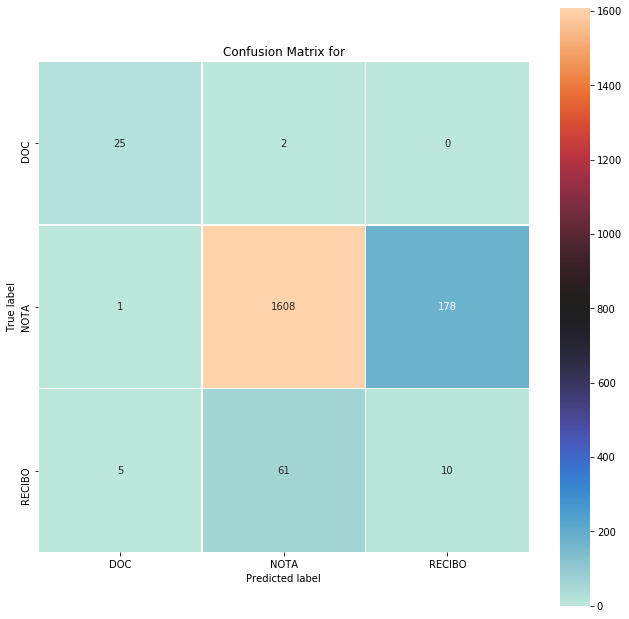

In [158]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['DOC', 'NOTA','RECIBO']


import seaborn as sns
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap="icefire",
xticklabels=classes,yticklabels=classes,linewidths=.3, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label');

In [159]:
df5

,body,label,name,label1
0,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS NOT...,NOTA,2017-06-27_08-47_2081291,0
1,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS NOT...,NOTA,2017-06-27_08-47_2328549,0
2,FATURA ASOPROMVI OS ASSOCIA PROFISSIONALIZANTE...,DOC,2017-06-27_08-47_2762289,1
3,PR AA ISA DRICA DES PREFEITURA MUNICIPAL DE BA...,NOTA,2017-06-27_08-47_5632222,0
4,PR AA ISA DRICA DES PREFEITURA MUNICIPAL DE BA...,NOTA,2017-06-27_08-47_5736801,0
...,...,...,...,...
1885,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS NOT...,NOTA,2020-04-02_09-01-58-1585828918_E_2063_3340905,0
1886,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS NOT...,NOTA,2020-04-02_18-25-55-1585862755_E_2063_1990695,0
1887,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS NOT...,NOTA,2020-04-02_18-25-55-1585862755_E_2063_9548925,0
1888,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS NOT...,NOTA,2020-04-02_18-25-56-1585862756_E_2063_7366780,0


In [160]:
tfidfconverter = TfidfVectorizer(max_features=200, min_df=5,max_df=0.7,stop_words=stopwords.words('portuguese'))
X1 = tfidfconverter.fit_transform(df5['body']).toarray()
dt_results1 = dt_model.predict(X1)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(dt_results1,df5['label'])

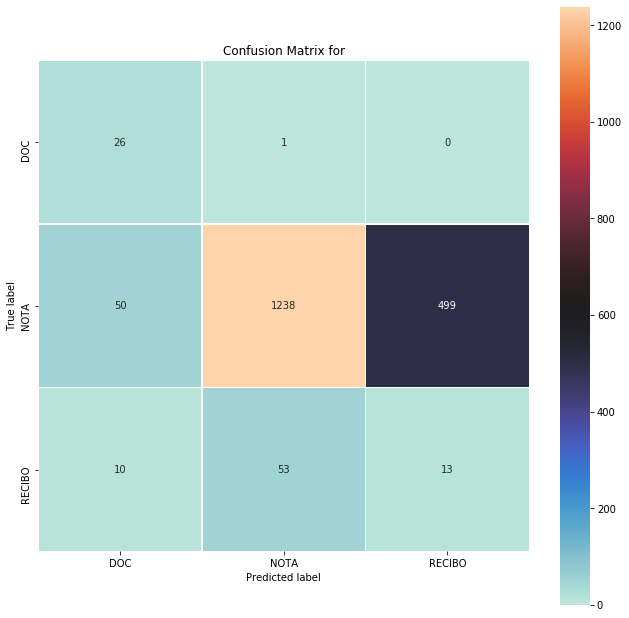

In [161]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['DOC', 'NOTA','RECIBO']


import seaborn as sns
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap="icefire",
xticklabels=classes,yticklabels=classes,linewidths=.3, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label');

In [162]:
X1 = tfidfconverter.fit_transform(df5['body']).toarray()

rf_results1 = rf_model.predict(X1)
rf_results_prob1 = rf_model.predict_proba(X1)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(rf_results1,df5['label'])

In [163]:
df5['label'].value_counts()[:50]

NOTA      1787
RECIBO      76
DOC         27
Name: label, dtype: int64

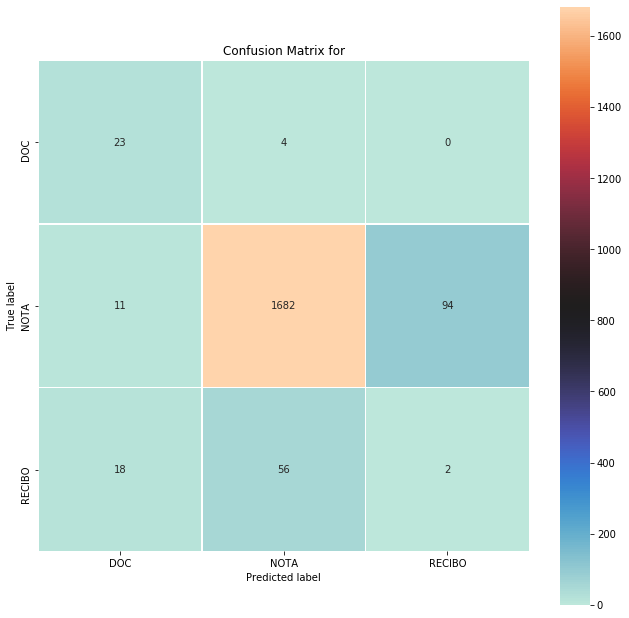

In [164]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['DOC', 'NOTA','RECIBO']


import seaborn as sns
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap="icefire",
xticklabels=classes,yticklabels=classes,linewidths=.3, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label');

In [165]:
X1 = tfidfconverter.fit_transform(df5['body']).toarray()

eclf_results = eclf_model.predict(X1)
#eclf_results_prob = eclf_model.predict_proba(X1)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mat = confusion_matrix(eclf_results,df5['label'])

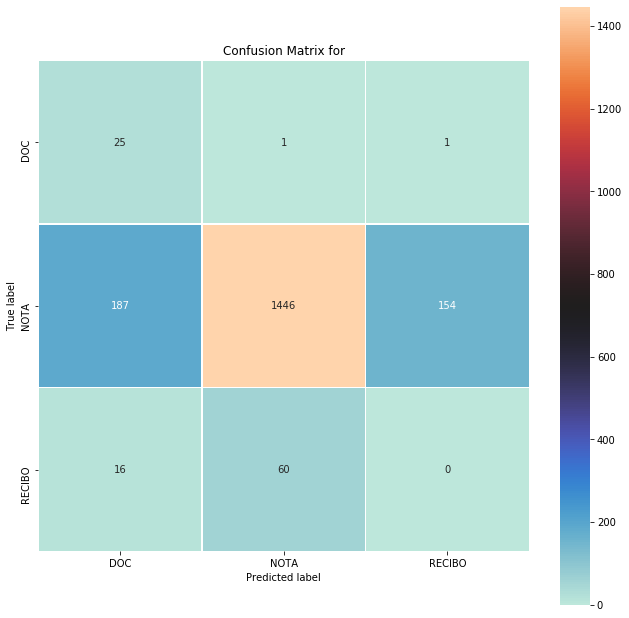

In [166]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['DOC', 'NOTA','RECIBO']


import seaborn as sns
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap="icefire",
xticklabels=classes,yticklabels=classes,linewidths=.3, ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label');

In [169]:
len3=len(df5)
df5['result1']=""
df5['nota_pro']=0.0
df5['doc_pro']=0.0
df5['recibo_pro']=0.0
for i in range(len3):
    df5['result1'][i]=lr_results1[i]
    prob1 = rf_results_prob1[i]
    df5['doc_pro'][i]=prob1[0]
    df5['nota_pro'][i]=prob1[1]
    df5['recibo_pro'][i]=prob1[2]
    print(prob1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

[0.2 0.4 0.4]
[0.   0.82 0.18]
[0.2 0.6 0.2]
[0.1 0.5 0.4]
[0.1 0.5 0.4]
[0.1 0.5 0.4]
[0.1 0.5 0.4]
[0.1 0.7 0.2]
[0.2 0.8 0. ]
[0.1 0.9 0. ]
[0.3 0.3 0.4]
[0.   0.72 0.28]
[0.   0.82 0.18]
[0.1 0.6 0.3]
[0.1  0.72 0.18]
[0.2 0.5 0.3]
[0.28934127 0.5        0.21065873]
[0.  0.9 0.1]
[0.  0.9 0.1]
[0.2 0.3 0.5]
[0.28309127 0.6        0.11690873]
[0.1 0.6 0.3]
[0.1 0.7 0.2]
[0.1 0.7 0.2]
[0.  0.6 0.4]
[0.2 0.4 0.4]
[0.1  0.72 0.18]
[0.1 0.8 0.1]
[0.1 0.5 0.4]
[0.1 0.7 0.2]
[0.2 0.6 0.2]
[0.3 0.5 0.2]
[0.2 0.5 0.3]
[0.1 0.6 0.3]
[0.  0.6 0.4]
[0.1 0.5 0.4]
[0.1 0.5 0.4]
[0.1 0.5 0.4]
[0.1 0.8 0.1]
[0.1 0.4 0.5]
[0.1 0.7 0.2]
[0.19378606 0.5        0.30621394]
[0.2 0.7 0.1]
[0.  0.6 0.4]
[0.1  0.72 0.18]
[0.1 0.9 0. ]
[0.1  0.72 0.18]
[0.1  0.72 0.18]
[0.1 0.9 0. ]
[0.1 0.7 0.2]
[0.1 0.9 0. ]
[0.1 0.7 0.2]
[0.  0.6 0.4]
[0.1 0.5 0.4]
[0.  0.7 0.3]
[0.  0.7 0.3]
[0.4 0.3 0.3]
[0.1        0.61666667 0.28333333]
[0.  0.9 0.1]
[0.  0.5 0.5]
[0.  0.9 0.1]
[0.1 0.7 0.2]
[0.1 0.6 0.3]
[0.1 0.7 0

[0.  0.7 0.3]
[0.1 0.5 0.4]
[0.  0.6 0.4]
[0.1  0.62 0.28]
[0.1  0.72 0.18]
[0.   0.82 0.18]
[0.  0.6 0.4]
[0.  0.8 0.2]
[0.  0.8 0.2]
[0.1 0.6 0.3]
[0.1 0.5 0.4]
[0.1 0.9 0. ]
[0.1 0.8 0.1]
[0.1 0.8 0.1]
[0.  0.9 0.1]
[0. 1. 0.]
[0.1 0.8 0.1]
[0.  0.9 0.1]
[0.  0.9 0.1]
[0.   0.72 0.28]
[0.2 0.6 0.2]
[0.2 0.6 0.2]
[0.  0.5 0.5]
[0.  0.8 0.2]
[0.  0.6 0.4]
[0.29769231 0.4        0.30230769]
[0.  0.9 0.1]
[0.  0.9 0.1]
[0.39609375 0.3        0.30390625]
[0.  0.6 0.4]
[0.  0.6 0.4]
[0.29609375 0.3        0.40390625]
[0.  0.6 0.4]
[0.2 0.6 0.2]
[0.1 0.9 0. ]
[0.  0.8 0.2]
[0.1        0.71666667 0.18333333]
[0.2 0.7 0.1]
[0.1 0.6 0.3]
[0.1 0.4 0.5]
[0.1  0.52 0.38]
[0.1  0.52 0.38]
[0.1  0.52 0.38]
[0.1  0.52 0.38]
[0.2 0.7 0.1]
[0. 1. 0.]
[0.  0.6 0.4]
[0.1 0.8 0.1]
[0.19609375 0.7        0.10390625]
[0.09609375 0.7        0.20390625]
[0.19609375 0.7        0.10390625]
[0.  0.9 0.1]
[0.  0.7 0.3]
[0.  0.8 0.2]
[0.  0.6 0.4]
[0.  0.6 0.4]
[0.  0.6 0.4]
[0.  0.6 0.4]
[0.  0.6 0.4]
[0.  0.6 

[0.2 0.5 0.3]
[0.  0.8 0.2]
[0.  0.4 0.6]
[0.1  0.72 0.18]
[0.1  0.72 0.18]
[0.1 0.5 0.4]
[0.1 0.6 0.3]
[0.1 0.5 0.4]
[0.5 0.5 0. ]
[0.2 0.5 0.3]
[0.2 0.5 0.3]
[0.2 0.5 0.3]
[0.   0.82 0.18]
[0.1  0.72 0.18]
[0. 1. 0.]
[0.1 0.6 0.3]
[0.  0.7 0.3]
[0.  0.9 0.1]
[0.29609375 0.4        0.30390625]
[0.1  0.52 0.38]
[0.1  0.52 0.38]
[0.1 0.6 0.3]
[0.   0.72 0.28]
[0.  0.9 0.1]
[0.2 0.5 0.3]
[0.1 0.8 0.1]
[0.  0.7 0.3]
[0.  0.8 0.2]
[0.1 0.8 0.1]
[0. 1. 0.]
[0. 1. 0.]
[0.2 0.5 0.3]
[0.  0.9 0.1]
[0.1 0.6 0.3]
[0.  0.8 0.2]
[0.  0.8 0.2]
[0.  0.7 0.3]
[0.  0.8 0.2]
[0.  0.9 0.1]
[0.3 0.5 0.2]
[0.  0.7 0.3]
[0.  0.7 0.3]
[0.2 0.6 0.2]
[0.  0.8 0.2]
[0.  0.8 0.2]
[0.4 0.6 0. ]
[0.1 0.8 0.1]
[0.  0.8 0.2]
[0.1  0.72 0.18]
[0.  0.7 0.3]
[0.  0.8 0.2]
[0.1  0.72 0.18]
[0.1 0.5 0.4]
[0.  0.8 0.2]
[0.  0.6 0.4]
[0.2 0.6 0.2]
[0.69609375 0.3        0.00390625]
[0.1 0.8 0.1]
[0.  0.7 0.3]
[0.09769231 0.7        0.20230769]
[0.2 0.5 0.3]
[0.2 0.5 0.3]
[0.1 0.8 0.1]
[0.1  0.52 0.38]
[0.1  0.72 0.18]
[0.

[0.  0.8 0.2]
[0.  0.8 0.2]
[0.1 0.8 0.1]
[0.1 0.6 0.3]
[0.1 0.8 0.1]
[0.  0.7 0.3]
[0.1 0.7 0.2]
[0.  0.9 0.1]
[0.29609375 0.4        0.30390625]
[0.1 0.7 0.2]
[0.1 0.5 0.4]
[0.  0.8 0.2]
[0.1 0.5 0.4]
[0.  0.8 0.2]
[0.  0.8 0.2]
[0.  0.9 0.1]
[0.1 0.5 0.4]
[0.3 0.6 0.1]
[0.2 0.3 0.5]
[0.1 0.5 0.4]
[0.1 0.8 0.1]
[0.1 0.8 0.1]
[0.1  0.72 0.18]
[0.   0.82 0.18]
[0.1  0.72 0.18]
[0. 1. 0.]
[0.1 0.6 0.3]
[0.  0.8 0.2]
[0.1 0.5 0.4]
[0.1  0.72 0.18]
[0.2 0.3 0.5]
[0.  0.6 0.4]
[0.2 0.3 0.5]
[0.2 0.3 0.5]
[0.2 0.3 0.5]
[0.1 0.5 0.4]
[0.  0.6 0.4]
[0.  0.8 0.2]
[0.  0.7 0.3]
[0.1 0.7 0.2]
[0.  0.6 0.4]
[0.  0.9 0.1]
[0.1 0.8 0.1]
[0.1        0.61666667 0.28333333]
[0.2 0.7 0.1]
[0.1 0.7 0.2]
[0.1 0.8 0.1]
[0.1 0.5 0.4]
[0.39609375 0.3        0.30390625]
[0.1 0.5 0.4]
[0.  0.8 0.2]
[0.1 0.5 0.4]
[0.  0.8 0.2]
[0.  0.6 0.4]
[0.1 0.8 0.1]
[0.  0.8 0.2]
[0.1 0.5 0.4]
[0.  0.8 0.2]
[0.  0.8 0.2]
[0.  0.8 0.2]
[0.  0.6 0.4]
[0.  0.6 0.4]
[0.2 0.6 0.2]
[0.  0.8 0.2]
[0.2 0.7 0.1]
[0.1 0.5 0.4]
[0. 

In [170]:
len1=len(df5)
df5['certeza']=0.0
df5['rever']=""
for i in range(len1):
    if df5['result1'][i]=="NOTA":
        df5['certeza'][i]=df5['nota_pro'][i]
    if df5['result1'][i]=="DOC":
        df5['certeza'][i]=df5['doc_pro'][i] 
    if df5['result1'][i]=="RECIBO":
        df5['certeza'][i]=df5['recibo_pro'][i]
for i in range(len1):
    if df5['certeza'][i]<.60:
        print(df5['certeza'][i])
        df5['rever'][i]="Rever manualmente"

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

0.4
0.5
0.5
0.5
0.5
0.3
0.5
0.2893412736995625
0.5
0.11690872630043754
0.4
0.4
0.5
0.2
0.5
0.5
0.5
0.5
0.5
0.5
0.3062139423076923
0.1
0.5
0.3
0.5
0.5
0.3
0.4
0.5
0.5
0.5
0.5
0.5
0.5
0.4023076923076923
0.5
0.1
0.5
0.5
0.5
0.3
0.4
0.3
0.52
0.5
0.5
0.5
0.2
0.4
0.5
0.5
0.5
0.5
0.403030303030303
0.5
0.52
0.4
0.5
0.52
0.3
0.3
0.5
0.1
0.4
0.5
0.1
0.2
0.40076923076923077
0.5
0.5
0.5
0.3
0.3
0.4
0.1
0.52
0.5
0.5
0.5
0.29609375
0.48
0.1
0.52
0.5
0.3
0.5
0.52
0.4
0.3
0.1
0.5
0.3
0.3
0.4
0.3
0.52
0.52
0.1
0.1
0.1
0.5
0.5
0.3
0.5
0.3
0.4
0.3
0.52
0.52
0.5
0.5
0.1
0.5
0.1
0.3
0.4
0.4
0.5
0.42000000000000004
0.5
0.4
0.5
0.3
0.3976923076923077
0.3976923076923077
0.2
0.1
0.3976923076923077
0.3976923076923077
0.5
0.1
0.1
0.5
0.5
0.5
0.52
0.5
0.52
0.5
0.1
0.1
0.3
0.3
0.5
0.2
0.5
0.5
0.5
0.5
0.5
0.5
0.3
0.4
0.30390625
0.4
0.1
0.5
0.3
0.5
0.3
0.5
0.40076923076923077
0.3976923076923077
0.5
0.5
0.50390625
0.5
0.22134971509971507
0.5
0.5
0.1
0.5
0.3023076923076923
0.3
0.3
0.3
0.5
0.52
0.52
0.52
0.52
0.3
0.5
0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.52
0.52
0.52
0.5
0.4
0.1
0.5
0.5
0.5
0.3
0.5
0.3
0.2
0.2
0.5
0.4
0.1
0.4
0.3
0.4
0.4
0.4
0.5
0.5
0.5
0.4023076923076923
0.3
0.4
0.3
0.4
0.3023076923076923
0.2
0.1
0.5
0.5
0.52
0.5
0.1183510339927452
0.5
0.1
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.5
0.5
0.5
0.52
0.52
0.2
0.1
0.3
0.5
0.52
0.5
0.5
0.5
0.2
0.5
0.4
0.4
0.4
0.49609375
0.5
0.4
0.5
0.5
0.3085576923076923
0.4
0.52
0.27999999999999997
0.4
0.3
0.1
0.4
0.5
0.3085576923076923
0.5
0.5
0.2
0.2
0.5
0.4
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.3023076923076923
0.4
0.3
0.4
0.27999999999999997
0.4
0.52
0.52
0.52
0.52
0.1
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.2
0.2
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.52
0.52
0.52
0.29609375
0.5
0.4
0.5
0.4
0.5
0.1
0.5
0.4
0.5
0.5
0.2
0.5
0.4
0.2
0.5
0.5
0.4
0.5
0.5
0.5
0.5
0.5
0.5
0.4
0.52
0.52
0.5
0.5
0.5
0.2
0.1
0.5
0.5
0.5
0.52
0.2
0.5
0.1
0.4
0.4
0.4
0.5
0.2
0.52
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.59609375
0.5
0.5
0.5
0.52
0.52
0.52
0.2
0.1
0.5
0.5
0.2
0.5
0.3
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.3
0.59609

In [171]:
df5[df5['label']!=df5['result1']]

,body,label,name,label1,result1,nota_pro,doc_pro,recibo_pro,certeza,rever
0,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS NOT...,NOTA,2017-06-27_08-47_2081291,0,RECIBO,0.4,0.200000,0.400000,0.4,Rever manualmente
2,FATURA ASOPROMVI OS ASSOCIA PROFISSIONALIZANTE...,DOC,2017-06-27_08-47_2762289,1,NOTA,0.6,0.200000,0.200000,0.6,
19,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS NOT...,NOTA,2017-06-30_09-35_6552132,0,RECIBO,0.3,0.200000,0.500000,0.5,Rever manualmente
24,RD GESTAO SISTEMAS NOTA FISCAL DE PRESTA DE SE...,NOTA,2017-07-03_09-41_7282193,0,RECIBO,0.6,0.000000,0.400000,0.4,Rever manualmente
30,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS NOT...,NOTA,2017-07-12_13-42_2901228,0,RECIBO,0.6,0.200000,0.200000,0.2,Rever manualmente
...,...,...,...,...,...,...,...,...,...,...
1860,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS NOT...,NOTA,2020-03-17_15-22-42-1584469362_E_2063_5229028,0,RECIBO,0.6,0.200000,0.200000,0.2,Rever manualmente
1863,NFS NOTA FISCAL DE SERVI OS ELETR NICA EMITIDA...,NOTA,2020-03-17_15-22-42-1584469362_E_2063_8390072,0,RECIBO,0.5,0.100000,0.400000,0.4,Rever manualmente
1867,NFS NOTA FISCAL DE SERVI OS ELETR NICA EMITIDA...,NOTA,2020-03-17_15-22-43-1584469363_E_2063_4279616,0,RECIBO,0.8,0.000000,0.200000,0.2,Rever manualmente
1869,RD GESTAO SISTEMAS DANFPS DOCUMENTO AUXILIAR D...,RECIBO,2020-03-17_15-22-43-1584469363_E_2063_5528012,2,NOTA,0.3,0.396094,0.303906,0.3,Rever manualmente


In [172]:
df5['rever'].value_counts()[:50]

                     1261
Rever manualmente     629
Name: rever, dtype: int64

# Classifying the new file

In [82]:
df4=df3
#df3.info()
df4=df4[df4.label == "ALL"]
df4=df4.reindex()
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   body    0 non-null      object
 1   label   0 non-null      object
 2   name    0 non-null      object
 3   label1  0 non-null      object
dtypes: object(4)
memory usage: 0.0+ bytes


In [83]:
from os import listdir
from os.path import isfile, join
mypath = 'C:/AI/krypton-01/texto7'
onlyfile1 = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(len(onlyfile1))

1899


In [84]:
for file1 in onlyfile1:
    #print(file1[-3:])
    #print(file1)
    #print(file1[:-4])
    if file1[-3:]=="txt":
        print(file1[:-4])
        text1 = open('C:/AI/krypton-01/texto7/'+file1, "r+",encoding = 'utf-8-sig').read()
        #print(text1)
        df2 = pd.DataFrame([[text1, "",file1[:-4],"",""]], columns = ['body','label','name','label1',"array"])
        #print(df2)
        df4=df4.append(df2)
        df4.reset_index(inplace = True, drop = True)

2017-06-27_08-47_2081291
2017-06-27_08-47_2328549
2017-06-27_08-47_2762289
2017-06-27_08-47_5632222
2017-06-27_08-47_5736801
2017-06-27_08-47_6630378
2017-06-27_08-47_6945680
2017-06-27_08-47_8612042
2017-06-27_08-47_9038559
2017-06-27_08-47_9573012
2017-06-27_10-14_1881821
2017-06-27_10-14_6049154
2017-06-27_10-14_9150233
2017-06-28_09-47_1035992
2017-06-29_08-03_8994805
2017-06-29_09-12_9030590
2017-06-29_09-34_6433716
2017-06-29_11-32_2407431
2017-06-29_11-36_1627262
2017-06-30_09-35_6552132
2017-06-30_13-21_5267056
2017-06-30_14-09_1190062
2017-06-30_14-09_7223992
2017-06-30_14-09_8651457
2017-07-03_09-41_7282193
2017-07-03_13-46_1323416
2017-07-05_10-36_6215036
2017-07-12_13-22_1686331
2017-07-12_13-29_3005962
2017-07-12_13-33_4405247
2017-07-12_13-42_2901228
2017-07-12_13-45_5733409
2017-07-12_13-49_2763458
2017-07-12_13-56_9712107
2017-07-12_13-58_8499946
2017-07-13_08-31_5786745
2017-07-13_08-41_8038290
2017-07-13_09-07_1167508
2017-07-13_09-50_9988548
2017-07-13_09-57_2047266


2018-01-11_15-05_2250309
2018-01-12_13-38_2647915
2018-01-12_13-38_4917974
2018-01-12_13-45_7190419
2018-01-16_14-08_1528285
2018-01-17_16-17_8817756
2018-01-19_11-11_4808386
2018-01-19_11-15_8873451
2018-01-19_13-28_5472258
2018-01-19_13-35_4938647
2018-01-19_15-16_9827151
2018-01-19_15-22_7395065
2018-01-19_15-23_2129730
2018-01-22_16-13_8897785
2018-01-24_16-47_9558355
2018-01-24_16-58_1290345
2018-01-25_16-12_2072511
2018-01-26_10-45_2597961
2018-01-26_10-47_2119791
2018-01-26_10-47_9753365
2018-01-29_09-38_8193832
2018-02-02_08-13_8467075
2018-02-02_08-13_8998855
2018-02-02_10-49_4867878-0
2018-02-02_10-49_4867878-1
2018-02-05_10-41_2320421
2018-02-05_10-47_7536559
2018-02-05_10-53_5743589
2018-02-05_11-20_8500988
2018-02-05_12-54_3658750
2018-02-05_12-56_9805924
2018-02-05_12-58_9304123
2018-02-05_12-58_9668757
2018-02-05_13-04_1337612
2018-02-05_13-07_2939278
2018-02-15_08-55_2533665
2018-02-16_08-12_1624937
2018-02-16_08-42_7950898
2018-02-19_10-23_3684686
2018-02-19_10-25_3717

2018-06-13_13-41_5469436
2018-06-13_15-26_5160434
2018-06-13_15-55_2010985
2018-06-14_10-56_5518274
2018-06-19_14-51_2772616
2018-06-19_14-51_8340749
2018-06-20_08-27_9066524
2018-06-20_08-27_9506768
2018-06-20_08-32_3018432
2018-06-20_08-32_6047263
2018-06-20_09-39_4487471
2018-06-20_09-58_9135284
2018-06-20_10-06_3864965
2018-06-20_14-37_5632578
2018-06-20_14-37_6916731
2018-06-21_10-56_7060207
2018-06-21_13-45_6035828
2018-06-21_16-34_1039271
2018-06-22_16-33_4825773
2018-06-22_16-34_8277952
2018-06-22_16-36_3021395
2018-06-22_16-37_9126345
2018-06-22_16-38_4068738
2018-06-22_16-38_4661697
2018-06-22_16-38_7213924
2018-06-22_16-38_9994632
2018-06-22_16-40_5202057
2018-06-22_16-43_5752856
2018-06-22_16-44_1560583
2018-06-25_12-55_7803573
2018-06-25_13-26_5581971
2018-06-25_13-27_9271342
2018-06-25_13-31_6369480
2018-06-25_13-33_4619081
2018-06-25_13-43_3840644
2018-06-25_13-49_9183248
2018-06-25_13-54_7686108
2018-06-25_13-57_9074989
2018-06-25_14-03_5011623
2018-06-25_14-06_5658973


2018-10-10_16-04_E_1616_1244905
2018-10-10_16-04_E_1616_3293507
2018-10-10_16-04_E_1616_4622786
2018-10-11_11-22_E_1616_4130926
2018-10-11_14-26_E_1616_7039368
2018-10-15_10-57_E_1882_2993921
2018-10-18_11-14_E_1882_2335716
2018-10-18_16-21_E_1882_1270384
2018-10-18_17-53_E_1882_2782794
2018-10-19_13-51_E_1882_3539270
2018-10-19_13-51_E_1882_4849235
2018-10-19_13-51_E_1882_6479345
2018-10-19_13-51_E_1882_6863467
2018-10-19_16-44_E_1882_5767428
2018-10-19_16-44_E_1882_8068679
2018-10-22_10-28_E_1882_5289392
2018-10-22_10-33_E_1882_9397672
2018-10-22_10-47_E_1882_9260912
2018-10-22_10-50_E_1882_6818376
2018-10-22_10-59_E_1882_5834849
2018-10-22_11-00_E_1882_5746447
2018-10-24_14-11_E_1882_2398654
2018-10-24_14-12_E_1882_8022664
2018-10-25_09-30_E_1882_3936927
2018-10-25_16-21_E_1882_5390095
2018-10-25_16-23_E_1882_2174830
2018-10-25_16-23_E_1882_7356376
2018-10-25_16-35_E_1882_6789393
2018-10-26_09-12_E_1882_8402233
2018-10-26_09-20_E_1882_7457888-0
2018-10-26_09-20_E_1882_7457888-1
2018

2019-01-10_12-46-27-1547131587_E_1616_6984326
2019-01-10_12-46-27-1547131587_E_1616_7983893
2019-01-14_18-21-22-1547497282_E_1882_4688320
2019-01-17_09-38-40-1547725120_E_1882_4552475
2019-01-22_11-36-11-1548164171_E_1882_1361915
2019-01-22_11-36-11-1548164171_E_1882_5030372
2019-01-22_12-54-11-1548168851_E_1882_6285733
2019-01-22_12-54-51-1548168891_E_1882_1530086
2019-01-22_12-54-51-1548168891_E_1882_1576031
2019-01-22_12-55-27-1548168927_E_1882_8147221
2019-01-22_13-02-01-1548169321_E_1882_4340253
2019-01-22_13-02-01-1548169321_E_1882_5875415
2019-01-22_13-02-01-1548169321_E_1882_7423948
2019-01-22_13-02-01-1548169321_E_1882_8260802
2019-01-22_13-02-01-1548169321_E_1882_9036877
2019-01-22_13-02-01-1548169321_E_1882_9510753
2019-01-22_13-07-33-1548169653_E_1882_2494951
2019-01-22_13-07-33-1548169653_E_1882_2696339
2019-01-22_13-07-33-1548169653_E_1882_4055351
2019-01-22_13-07-33-1548169653_E_1882_4742031
2019-01-22_13-07-33-1548169653_E_1882_5360034
2019-01-22_13-07-33-1548169653_E_1

2019-04-11_14-59-55-1555005595_E_1882_5967841
2019-04-11_14-59-55-1555005595_E_1882_6369217
2019-04-11_14-59-55-1555005595_E_1882_6642952
2019-04-11_14-59-55-1555005595_E_1882_9118061
2019-04-11_14-59-55-1555005595_E_1882_9727999
2019-04-24_15-06-38-1556129198_E_1882_3529579
2019-04-24_15-15-24-1556129724_E_1882_2021155
2019-04-24_15-15-24-1556129724_E_1882_3079662
2019-04-24_15-15-24-1556129724_E_1882_3677428
2019-04-24_15-15-24-1556129724_E_1882_4494728
2019-04-24_15-15-24-1556129724_E_1882_4787420
2019-04-24_15-15-24-1556129724_E_1882_6026083
2019-04-24_15-15-24-1556129724_E_1882_8414244
2019-04-24_15-15-24-1556129724_E_1882_8541575
2019-04-24_15-16-44-1556129804_E_1882_1728652
2019-04-24_15-18-20-1556129900_E_1882_9481044
2019-04-24_15-21-27-1556130087_E_1882_1827182
2019-04-24_15-21-27-1556130087_E_1882_2414521
2019-04-24_15-21-27-1556130087_E_1882_3814719
2019-04-24_15-21-27-1556130087_E_1882_8097524
2019-04-24_15-21-27-1556130087_E_1882_9673651
2019-04-30_14-18-51-1556644731_E_1

2019-07-16_14-01-15-1563296475_E_1882_3223484
2019-07-16_14-01-15-1563296475_E_1882_7330362
2019-07-25_14-04-07-1564074247_E_1882_4809770
2019-07-25_14-04-07-1564074247_E_1882_5525337
2019-07-25_14-04-07-1564074247_E_1882_6636634
2019-07-25_14-10-03-1564074603_E_1882_5065889
2019-07-25_14-10-03-1564074603_E_1882_6187547
2019-07-25_15-15-24-1564078524_E_1882_6373156-1000
2019-07-25_15-15-24-1564078524_E_1882_6373156-1001
2019-07-25_15-44-30-1564080270_E_1882_4793139
2019-07-25_15-44-30-1564080270_E_1882_6105307
2019-07-30_10-17-25-1564492645_E_1882_4423488
2019-07-30_10-17-26-1564492646_E_1882_1023135
2019-07-30_10-18-32-1564492712_E_1882_5404306
2019-07-30_10-18-37-1564492717_E_1882_2279851
2019-07-30_13-43-52-1564505032_E_1882_3837502
2019-08-01_10-17-20-1564665440_E_1882_3697407
2019-08-01_10-17-20-1564665440_E_1882_7490718
2019-08-01_10-31-05-1564666265_E_1882_5467258
2019-08-02_16-46-32-1564775192_E_1882_5576185
2019-08-05_08-17-46-1565003866_E_1882_3906497
2019-08-14_10-42-14-1565

2019-11-20_11-53-56-1574261636_E_2063_7004477
2019-11-20_11-53-56-1574261636_E_2063_7745864
2019-11-20_11-53-56-1574261636_E_2063_8056152
2019-11-20_11-54-24-1574261664_E_2063_6242567
2019-11-20_11-55-16-1574261716_E_2063_3285208
2019-11-20_11-55-16-1574261716_E_2063_4548395
2019-11-20_11-55-16-1574261716_E_2063_9030225
2019-11-25_13-56-25-1574700985_E_1882_7037577
2019-11-29_15-58-51-1575053931_E_2063_6475517
2019-11-29_15-58-51-1575053931_E_2063_8980007
2019-11-29_15-59-28-1575053968_E_2063_3570371
2019-11-29_16-04-19-1575054259_E_2063_4833194
2019-11-29_16-04-19-1575054259_E_2063_5690964
2019-11-29_16-04-19-1575054259_E_2063_6495056
2019-11-29_16-04-19-1575054259_E_2063_7269059
2019-11-29_16-04-19-1575054259_E_2063_8748844
2019-11-29_16-04-20-1575054260_E_2063_1663499
2019-11-29_16-20-45-1575055245_E_2063_2201252
2019-11-29_16-30-21-1575055821_E_2063_5207434
2019-11-29_16-30-22-1575055822_E_2063_8089554
2019-11-29_16-30-22-1575055822_E_2063_8512327
2019-11-29_16-30-56-1575055856_E_2

2020-03-17_15-22-43-1584469363_E_2063_8306969
2020-03-17_15-22-43-1584469363_E_2063_9754489
2020-03-17_15-22-44-1584469364_E_2063_6325846
2020-03-17_15-22-44-1584469364_E_2063_9965079
2020-04-02_08-51-59-1585828319_E_2063_8461913
2020-04-02_08-52-00-1585828320_E_2063_9190421
2020-04-02_08-52-45-1585828365_E_2063_2929464
2020-04-02_08-52-45-1585828365_E_2063_4450213
2020-04-02_08-53-50-1585828430_E_2063_3277925
2020-04-02_08-56-12-1585828572_E_2063_4174610
2020-04-02_08-58-22-1585828702_E_2063_2053324
2020-04-02_08-58-22-1585828702_E_2063_6809600
2020-04-02_09-01-58-1585828918_E_2063_3340905
2020-04-02_18-25-55-1585862755_E_2063_1990695
2020-04-02_18-25-55-1585862755_E_2063_9548925
2020-04-02_18-25-56-1585862756_E_2063_7366780
2020-04-02_18-25-56-1585862756_E_2063_8036780


In [85]:
# apply clean function to body
for i in range(len(df4)):
      df4["body"][i]= clean(str(df4["body"][i]))
      print(i,df4['name'][i])

0 2017-06-27_08-47_2081291
1 2017-06-27_08-47_2328549
2 2017-06-27_08-47_2762289
3 2017-06-27_08-47_5632222
4 2017-06-27_08-47_5736801
5 2017-06-27_08-47_6630378
6 2017-06-27_08-47_6945680
7 2017-06-27_08-47_8612042
8 2017-06-27_08-47_9038559
9 2017-06-27_08-47_9573012
10 2017-06-27_10-14_1881821
11 2017-06-27_10-14_6049154
12 2017-06-27_10-14_9150233
13 2017-06-28_09-47_1035992
14 2017-06-29_08-03_8994805
15 2017-06-29_09-12_9030590
16 2017-06-29_09-34_6433716
17 2017-06-29_11-32_2407431
18 2017-06-29_11-36_1627262
19 2017-06-30_09-35_6552132
20 2017-06-30_13-21_5267056
21 2017-06-30_14-09_1190062
22 2017-06-30_14-09_7223992
23 2017-06-30_14-09_8651457
24 2017-07-03_09-41_7282193
25 2017-07-03_13-46_1323416
26 2017-07-05_10-36_6215036
27 2017-07-12_13-22_1686331
28 2017-07-12_13-29_3005962
29 2017-07-12_13-33_4405247
30 2017-07-12_13-42_2901228
31 2017-07-12_13-45_5733409
32 2017-07-12_13-49_2763458
33 2017-07-12_13-56_9712107
34 2017-07-12_13-58_8499946
35 2017-07-13_08-31_5786745
36

297 2017-12-22_08-24_9265532
298 2017-12-22_08-28_7856697
299 2017-12-22_08-32_3444184
300 2017-12-22_08-35_9534242
301 2017-12-22_08-38_6898471
302 2017-12-22_08-43_1557841
303 2017-12-22_09-36_3518072
304 2017-12-26_16-34_3368968
305 2017-12-26_16-34_5454517
306 2017-12-26_16-34_6323837
307 2017-12-26_16-34_6796112
308 2017-12-27_16-15_2429956
309 2017-12-27_16-15_5261348
310 2017-12-27_16-15_7893208
311 2017-12-28_09-28_4100306
312 2017-12-28_13-19_1056489
313 2017-12-28_16-17_1320664
314 2017-12-28_16-27_7642604
315 2017-12-29_08-42_7422448
316 2017-12-29_09-11_6357417
317 2018-01-02_15-28_1615328
318 2018-01-02_15-28_5778777
319 2018-01-02_15-28_9996522
320 2018-01-02_15-33_2441674
321 2018-01-03_13-33_7757213
322 2018-01-03_13-50_2683224
323 2018-01-03_13-53_1918595
324 2018-01-03_14-46_2390945
325 2018-01-03_15-24_9884734
326 2018-01-05_11-19_6668532
327 2018-01-08_11-58_1959635
328 2018-01-08_11-58_3707049
329 2018-01-08_11-58_7513765
330 2018-01-08_11-58_9203079
331 2018-01-08

622 2018-05-17_14-14_7656172
623 2018-05-17_15-12_5737540
624 2018-05-18_15-25_1121127
625 2018-05-18_15-25_1796640
626 2018-05-18_15-25_5355128
627 2018-05-18_15-25_9144960
628 2018-05-18_15-25_9383961
629 2018-05-18_15-25_9617468
630 2018-05-18_15-25_9673444
631 2018-05-21_10-43_9749701
632 2018-05-21_10-48_6108648
633 2018-05-21_12-47_3460922
634 2018-05-22_14-10_5412886
635 2018-05-24_10-02_4640132
636 2018-05-24_10-56_5271303
637 2018-05-24_11-19_2125378
638 2018-05-24_11-24_3803320
639 2018-05-24_11-26_8272696
640 2018-05-28_10-57_2200146-0
641 2018-05-28_10-57_2200146-1
642 2018-05-28_12-56_1877106
643 2018-05-28_12-56_2334113
644 2018-05-28_16-29_1398305
645 2018-05-28_16-29_2819903
646 2018-05-28_16-29_3846954
647 2018-05-28_16-29_8552420
648 2018-05-28_16-29_9326253
649 2018-05-29_11-10_1940814
650 2018-05-30_12-33_6546747
651 2018-05-30_14-33_8195584
652 2018-06-01_10-38_3216703
653 2018-06-01_10-41_4555919
654 2018-06-01_10-41_4664403
655 2018-06-06_15-03_4239251
656 2018-0

921 2018-09-27_16-20_E_1882_1167766
922 2018-09-27_16-20_E_1882_5161081
923 2018-09-27_16-20_E_1882_5291669
924 2018-09-27_16-20_E_1882_5727575
925 2018-09-27_16-20_E_1882_7754193
926 2018-09-27_16-20_E_1882_8603030
927 2018-09-27_16-37_E_1882_8953761
928 2018-09-27_16-42_E_1882_3060858
929 2018-09-27_16-42_E_1882_6722124
930 2018-09-27_16-57_E_1882_2906242
931 2018-09-27_16-57_E_1882_2945253
932 2018-09-27_16-57_E_1882_4638739-0
933 2018-09-27_16-57_E_1882_4638739-1
934 2018-09-27_16-57_E_1882_4674994
935 2018-09-27_16-57_E_1882_5343875-0
936 2018-09-27_16-57_E_1882_5343875-1
937 2018-09-27_16-57_E_1882_5774729
938 2018-09-28_14-56_E_1616_1701116
939 2018-09-28_14-56_E_1616_3091690
940 2018-10-01_14-17_E_1882_8922858
941 2018-10-03_09-52_E_1616_6737536
942 2018-10-03_09-54_E_1616_7795649
943 2018-10-03_09-54_E_1616_8252455
944 2018-10-04_14-09_E_1882_9627799
945 2018-10-04_14-27_E_1616_7607017
946 2018-10-08_13-58_E_1882_4058301
947 2018-10-08_14-19_E_1882_5415103
948 2018-10-08_17-23

1222 2019-02-13_18-14-31-1550088871_E_1616_7213640
1223 2019-02-14_15-06-35-1550163995_E_1882_1987378
1224 2019-02-14_15-06-35-1550163995_E_1882_5888320
1225 2019-02-14_15-06-35-1550163995_E_1882_7063871
1226 2019-02-14_15-06-35-1550163995_E_1882_8740751
1227 2019-02-14_15-06-36-1550163996_E_1882_2455666
1228 2019-02-14_15-06-36-1550163996_E_1882_8123044
1229 2019-02-14_15-35-50-1550165750_E_1882_1152803
1230 2019-02-14_15-35-50-1550165750_E_1882_2477097
1231 2019-02-14_15-35-50-1550165750_E_1882_3691074
1232 2019-02-14_15-35-50-1550165750_E_1882_6306094
1233 2019-02-14_15-35-50-1550165750_E_1882_6866395
1234 2019-02-14_15-35-50-1550165750_E_1882_9605380
1235 2019-02-14_15-35-50-1550165750_E_1882_9892359
1236 2019-02-14_15-43-44-1550166224_E_1882_8110025
1237 2019-02-14_16-28-07-1550168887_E_1882_5413821
1238 2019-02-15_14-02-47-1550246567_E_1882_5323700
1239 2019-02-25_13-22-59-1551111779_E_1882_2816097
1240 2019-02-25_13-22-59-1551111779_E_1882_3306782
1241 2019-02-25_13-22-59-155111

1560 2019-08-14_11-09-19-1565791759_E_1882_4449458
1561 2019-08-14_11-09-19-1565791759_E_1882_4613997
1562 2019-08-14_11-09-19-1565791759_E_1882_5059205
1563 2019-08-14_11-09-19-1565791759_E_1882_5516449
1564 2019-08-14_11-09-19-1565791759_E_1882_5764366
1565 2019-08-14_11-09-19-1565791759_E_1882_6195913
1566 2019-08-14_11-09-19-1565791759_E_1882_9702966
1567 2019-08-14_11-09-19-1565791759_E_1882_9731214
1568 2019-08-14_11-21-28-1565792488_E_1882_6696218
1569 2019-08-28_10-40-53-1566999653_E_2063_1230697
1570 2019-08-28_10-40-53-1566999653_E_2063_4960211
1571 2019-08-28_10-40-53-1566999653_E_2063_7567158
1572 2019-08-28_13-15-53-1567008953_E_2063_4385069
1573 2019-08-28_13-15-53-1567008953_E_2063_4865896
1574 2019-08-28_13-15-53-1567008953_E_2063_9601095
1575 2019-08-28_13-17-24-1567009044_E_2063_4798109
1576 2019-08-28_13-28-24-1567009704_E_2063_3252232
1577 2019-08-28_13-28-24-1567009704_E_2063_4957654
1578 2019-08-29_10-47-15-1567086435_E_2063_1062075
1579 2019-08-29_16-57-31-156710

1883 2020-03-17_15-22-44-1584469364_E_2063_9965079
1884 2020-04-02_08-51-59-1585828319_E_2063_8461913
1885 2020-04-02_08-52-00-1585828320_E_2063_9190421
1886 2020-04-02_08-52-45-1585828365_E_2063_2929464
1887 2020-04-02_08-52-45-1585828365_E_2063_4450213
1888 2020-04-02_08-53-50-1585828430_E_2063_3277925
1889 2020-04-02_08-56-12-1585828572_E_2063_4174610
1890 2020-04-02_08-58-22-1585828702_E_2063_2053324
1891 2020-04-02_08-58-22-1585828702_E_2063_6809600
1892 2020-04-02_09-01-58-1585828918_E_2063_3340905
1893 2020-04-02_18-25-55-1585862755_E_2063_1990695
1894 2020-04-02_18-25-55-1585862755_E_2063_9548925
1895 2020-04-02_18-25-56-1585862756_E_2063_7366780
1896 2020-04-02_18-25-56-1585862756_E_2063_8036780


In [86]:
# apply clean function to body
len5 = len(df4)
for i in range(len5):
    #print(i)
    #zz= clean1(str(df3["body"][i]))
    df4["body"][i]= clean1(str(df4["body"][i]))
    #print(i,df3['name'][i])
    #print(i,zz)

In [87]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897 entries, 0 to 1896
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   body    1897 non-null   object
 1   label   1897 non-null   object
 2   name    1897 non-null   object
 3   label1  1897 non-null   object
 4   array   1897 non-null   object
dtypes: object(5)
memory usage: 74.2+ KB


In [88]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

# apply clean function to body
len5 = len(df4)
for i in range(len5):
    print(i)
    #zz= clean1(str(df3["body"][i]))
    text = df4["body"][i]
    text_tokens = word_tokenize(text)
    textx = [word for word in text_tokens if not word in stopwords.words('portuguese')]
    df4["body"][i]=listToString(textx)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ziulc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896


In [89]:
X2 = tfidfconverter.fit_transform(df4['body']).toarray()

In [90]:
df4

,body,label,name,label1,array
0,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS NOT...,,2017-06-27_08-47_2081291,,
1,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS NOT...,,2017-06-27_08-47_2328549,,
2,FATURA ASOPROMVI OS ASSOCIA PROFISSIONALIZANTE...,,2017-06-27_08-47_2762289,,
3,PR AA ISA DRICA DES PREFEITURA MUNICIPAL DE BA...,,2017-06-27_08-47_5632222,,
4,PR AA ISA DRICA DES PREFEITURA MUNICIPAL DE BA...,,2017-06-27_08-47_5736801,,
...,...,...,...,...,...
1892,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS NOT...,,2020-04-02_09-01-58-1585828918_E_2063_3340905,,
1893,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS NOT...,,2020-04-02_18-25-55-1585862755_E_2063_1990695,,
1894,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS NOT...,,2020-04-02_18-25-55-1585862755_E_2063_9548925,,
1895,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS NOT...,,2020-04-02_18-25-56-1585862756_E_2063_7366780,,


In [135]:
lr_results2 = lr_model.predict(X2)
eclf_result2 = eclf_model.predict(X2)
lr_results_prob1 = lr_model.predict_proba(X2)

In [137]:
len3=len(df4)
df4['result1']=""
df4['nota_pro']=0.0
df4['doc_pro']=0.0
df4['recibo_pro']=0.0
for i in range(len3):
    df4['result1'][i]=lr_results2[i]
    prob1 = lr_results_prob1[i]
    df4['doc_pro'][i]=prob1[0]
    df4['nota_pro'][i]=prob1[1]
    df4['recibo_pro'][i]=prob1[2]
    print(prob1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Pro

[0.02429735 0.35783559 0.61786706]
[0.00344428 0.96309061 0.03346511]
[0.11664702 0.75733988 0.12601311]
[0.02188767 0.92725499 0.05085734]
[0.02284737 0.90838514 0.06876749]
[0.02671715 0.91642835 0.0568545 ]
[0.02188767 0.92725499 0.05085734]
[0.0069645  0.97530842 0.01772708]
[0.01187777 0.95154965 0.03657258]
[0.00997759 0.94138794 0.04863447]
[0.01141178 0.90537129 0.08321693]
[0.00284315 0.97448392 0.02267294]
[0.00344428 0.96309061 0.03346511]
[0.01038485 0.75757993 0.23203522]
[0.00448115 0.96635833 0.02916052]
[0.00371753 0.89155873 0.10472374]
[0.88487165 0.047723   0.06740535]
[0.04509331 0.77156295 0.18334374]
[0.04770503 0.75696798 0.19532699]
[0.0382419  0.33328679 0.6284713 ]
[0.25096116 0.31945033 0.42958851]
[0.00734951 0.94518318 0.04746731]
[0.00655922 0.94830744 0.04513335]
[0.0057283  0.92385888 0.07041282]
[0.15646593 0.60099172 0.24254235]
[0.00939189 0.87172707 0.11888104]
[0.00561205 0.96107234 0.03331561]
[6.36369663e-04 8.70572745e-01 1.28790886e-01]
[0.01856

[0.04509331 0.77156295 0.18334374]
[0.0045269  0.97059226 0.02488084]
[0.017368   0.95514014 0.02749186]
[0.00561205 0.96107234 0.03331561]
[0.00727865 0.20001107 0.79271028]
[0.00111628 0.89919558 0.09968814]
[0.00292181 0.97683657 0.02024162]
[0.00335635 0.96963911 0.02700454]
[0.00398843 0.96962041 0.02639116]
[0.00335635 0.96963911 0.02700454]
[0.00431656 0.96785598 0.02782746]
[0.00561205 0.96107234 0.03331561]
[0.03165397 0.41544207 0.55290396]
[8.69907995e-04 9.64361892e-01 3.47681997e-02]
[4.87560679e-04 5.67915032e-01 4.31597407e-01]
[0.00165142 0.69883534 0.29951325]
[0.02308902 0.39327842 0.58363256]
[0.02584001 0.35470508 0.61945491]
[0.00544257 0.93003997 0.06451746]
[0.03926311 0.59704225 0.36369464]
[0.00116773 0.73350323 0.26532904]
[0.01669892 0.83572801 0.14757307]
[0.00132049 0.78815781 0.2105217 ]
[0.01318982 0.82582963 0.16098054]
[0.00845946 0.96761327 0.02392727]
[7.13290468e-04 9.24936305e-01 7.43504042e-02]
[0.02605962 0.62653427 0.34740611]
[0.00447415 0.18865

[0.00804424 0.8671982  0.12475757]
[0.00804424 0.8671982  0.12475757]
[0.01105616 0.88197612 0.10696772]
[0.10899661 0.62112728 0.26987611]
[0.00924376 0.95024047 0.04051577]
[0.03715044 0.09165027 0.87119929]
[4.74599484e-04 9.24452155e-01 7.50732455e-02]
[0.04927268 0.7673356  0.18339172]
[0.15703102 0.56303825 0.27993073]
[0.00924376 0.95024047 0.04051577]
[0.01083777 0.9582476  0.03091463]
[0.02630697 0.70016359 0.27352944]
[0.00924376 0.95024047 0.04051577]
[0.00628611 0.95022796 0.04348593]
[0.01150954 0.93547089 0.05301957]
[0.03485947 0.46201215 0.50312838]
[0.01465174 0.94970356 0.0356447 ]
[0.02329035 0.42049184 0.55621781]
[0.00573986 0.19532967 0.79893046]
[0.01024725 0.1528733  0.83687945]
[0.00463107 0.691609   0.30375993]
[0.00463107 0.691609   0.30375993]
[0.00463107 0.691609   0.30375993]
[0.00463107 0.691609   0.30375993]
[0.00854186 0.94821453 0.04324361]
[6.42390653e-04 8.57219677e-01 1.42137933e-01]
[0.03926311 0.59704225 0.36369464]
[0.0143467 0.7820664 0.2035869]

[0.01808117 0.88294095 0.09897788]
[0.00520066 0.97295304 0.02184631]
[0.0050492  0.96448395 0.03046686]
[0.01808117 0.88294095 0.09897788]
[0.28294134 0.42531955 0.29173911]
[0.00173163 0.97773077 0.0205376 ]
[0.03240578 0.39260726 0.57498696]
[0.04923315 0.69066559 0.26010126]
[0.01808117 0.88294095 0.09897788]
[0.00312861 0.97066114 0.02621024]
[0.0040565  0.96457243 0.03137107]
[0.00223719 0.91237451 0.08538829]
[0.01169898 0.66518963 0.32311139]
[0.02661102 0.42172033 0.55166865]
[0.0040565  0.96457243 0.03137107]
[0.02338172 0.88807208 0.08854621]
[0.01271408 0.84984919 0.13743673]
[0.01271408 0.84984919 0.13743673]
[0.00362126 0.97121847 0.02516027]
[0.0027986  0.96669553 0.03050587]
[0.01003508 0.96960379 0.02036113]
[0.0076223  0.96487998 0.02749772]
[0.01001544 0.63092327 0.35906129]
[0.00690403 0.62064397 0.37245199]
[0.01001544 0.63092327 0.35906129]
[4.68569858e-04 9.17767949e-01 8.17634813e-02]
[0.07402248 0.58998538 0.33599214]
[0.51902789 0.38156414 0.09940797]
[0.02618

[0.03453996 0.91906304 0.046397  ]
[0.0827021  0.89210554 0.02519236]
[0.053005   0.82152422 0.12547078]
[0.02493708 0.89957936 0.07548356]
[0.02493708 0.89957936 0.07548356]
[0.00562528 0.96750293 0.02687179]
[0.01299915 0.8827477  0.10425316]
[0.01189803 0.86679859 0.12130337]
[0.0120285  0.86172145 0.12625005]
[0.01123221 0.87922101 0.10954677]
[0.01189803 0.86679859 0.12130337]
[0.01785333 0.84445654 0.13769013]
[0.00209258 0.74413165 0.25377577]
[0.00255548 0.64720357 0.35024095]
[0.03003629 0.55119219 0.41877152]
[6.42390653e-04 8.57219677e-01 1.42137933e-01]
[0.00111495 0.8945197  0.10436535]
[0.00463107 0.691609   0.30375993]
[0.00463107 0.691609   0.30375993]
[0.00463107 0.691609   0.30375993]
[0.00501081 0.71378616 0.28120302]
[0.00433207 0.95942252 0.03624541]
[0.67898617 0.16975618 0.15125765]
[0.11672588 0.28260542 0.60066871]
[0.20814283 0.536119   0.25573817]
[0.00530083 0.96746094 0.02723823]
[0.00264113 0.97511628 0.02224259]
[0.0027986  0.96669553 0.03050587]
[0.06914

[0.00111587 0.89402439 0.10485973]
[0.00122675 0.91059771 0.08817554]
[7.05921620e-04 9.35129060e-01 6.41650184e-02]
[0.00096571 0.04059461 0.95843968]
[0.03263633 0.56061516 0.40674851]
[0.00815062 0.88157152 0.11027786]
[0.00328138 0.97660628 0.02011234]
[0.00322438 0.97493417 0.02184145]
[0.00173014 0.97782662 0.02044324]
[0.01055964 0.89070144 0.09873892]
[0.01398625 0.8732037  0.11281005]
[0.01199676 0.85629651 0.13170673]
[0.01398625 0.8732037  0.11281005]
[0.01223151 0.81869061 0.16907789]
[0.0119268  0.88278366 0.10528954]
[0.01150307 0.90820714 0.08028979]
[0.01400144 0.80825549 0.17774307]
[0.01223151 0.81869061 0.16907789]
[0.10759681 0.62312091 0.26928228]
[0.01307239 0.89933303 0.08759458]
[0.01670833 0.89488367 0.08840799]
[0.0135469 0.9022804 0.0841727]
[0.01391931 0.90458435 0.08149634]
[0.08999908 0.7102866  0.19971432]
[0.02562042 0.43643325 0.53794633]
[0.04646297 0.62385594 0.3296811 ]
[0.04660507 0.30959608 0.64379885]
[0.06602149 0.70011087 0.23386764]
[0.17889188

[0.01223151 0.81869061 0.16907789]
[0.04734046 0.67140526 0.28125428]
[0.0134196  0.7324728  0.25410761]
[0.15351047 0.47990544 0.36658409]
[0.0020607  0.09759509 0.90034421]
[0.02997553 0.5476226  0.42240187]
[0.01317791 0.86992051 0.11690158]
[0.01481456 0.86720438 0.11798105]
[0.01199676 0.85629651 0.13170673]
[0.01199676 0.85629651 0.13170673]
[0.01400144 0.80825549 0.17774307]
[0.01187123 0.86150625 0.12662251]
[0.02146717 0.88349857 0.09503426]
[0.02076198 0.90752355 0.07171447]
[0.00909752 0.95835951 0.03254297]
[0.00797091 0.96962713 0.02240196]
[0.0139644  0.50738139 0.4786542 ]
[6.66534642e-04 8.85941273e-01 1.13392193e-01]
[0.02997553 0.5476226  0.42240187]
[0.05615047 0.64536393 0.2984856 ]
[0.02562042 0.43643325 0.53794633]
[0.02415517 0.90958244 0.06626239]
[0.0189225  0.83111267 0.14996482]
[0.01960836 0.91973354 0.0606581 ]
[0.02415517 0.90958244 0.06626239]
[0.21530143 0.31739835 0.46730022]
[0.00264189 0.97488787 0.02247025]
[0.00322438 0.97493417 0.02184145]
[0.00180

In [138]:
len1=len(df4)
df4['certeza']=0.0
df4['rever']=""
for i in range(len1):
    if df4['result1'][i]=="NOTA":
        df4['certeza'][i]=df4['nota_pro'][i]
    if df4['result1'][i]=="DOC":
        df4['certeza'][i]=df4['doc_pro'][i] 
    if df4['result1'][i]=="RECIBO":
        df4['certeza'][i]=df4['recibo_pro'][i]
for i in range(len1):
    if df4['certeza'][i]<.60:
        print(df4['certeza'][i])
        df4['rever'][i]="Rever manualmente"

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages

0.4295885099613902
0.5173032232174193
0.5744661820358334
0.49690028781421614
0.4434898480037474
0.5933328000537299
0.5687922030507345
0.49719325826680033
0.4909119134758056
0.4831703608865874
0.5687922030507345
0.5281497325327809
0.48984769934935996
0.5933328000537299
0.49719325826680033
0.5933328000537299
0.5836325628284973
0.5738474210649966
0.5904846079318211
0.5122943240990052
0.5955727321283936
0.516044136649512
0.5904846079318211
0.5687922030507345
0.5362787244595479
0.5824228470204786
0.5910189773896378
0.5970422508198565
0.4952581263298296
0.5529039602580391
0.5679150318893462
0.5836325628284973
0.5970422508198565
0.5478926987569936
0.5262099385884128
0.5542482048725439
0.5803627963903781
0.48071395343178275
0.5892788481519069
0.5641589925445509
0.5687922030507345
0.5068485627535122
0.5261219471832993
0.5512102540241524
0.5403055713616345
0.5066731224114528
0.447106997511372
0.5982946603882789
0.4871956186024583
0.5689952891043945
0.4779438564247792
0.5699057548040415
0.4963635

In [139]:
df4

,body,label,name,label1,array,result1,nota_pro,doc_pro,recibo_pro,certeza,rever
0,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS NOT...,,2017-06-27_08-47_2081291,,,RECIBO,0.357836,0.024297,0.617867,0.617867,
1,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS NOT...,,2017-06-27_08-47_2328549,,,NOTA,0.963091,0.003444,0.033465,0.963091,
2,FATURA ASOPROMVI OS ASSOCIA PROFISSIONALIZANTE...,,2017-06-27_08-47_2762289,,,NOTA,0.757340,0.116647,0.126013,0.757340,
3,PR AA ISA DRICA DES PREFEITURA MUNICIPAL DE BA...,,2017-06-27_08-47_5632222,,,NOTA,0.927255,0.021888,0.050857,0.927255,
4,PR AA ISA DRICA DES PREFEITURA MUNICIPAL DE BA...,,2017-06-27_08-47_5736801,,,NOTA,0.908385,0.022847,0.068767,0.908385,
...,...,...,...,...,...,...,...,...,...,...,...
1892,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS NOT...,,2020-04-02_09-01-58-1585828918_E_2063_3340905,,,NOTA,0.809142,0.008480,0.182378,0.809142,
1893,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS NOT...,,2020-04-02_18-25-55-1585862755_E_2063_1990695,,,NOTA,0.964880,0.007622,0.027498,0.964880,
1894,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS NOT...,,2020-04-02_18-25-55-1585862755_E_2063_9548925,,,NOTA,0.957735,0.008781,0.033484,0.957735,
1895,NFS NOTA FISCAL DE SERVI OS ELETR NICA NFS NOT...,,2020-04-02_18-25-56-1585862756_E_2063_7366780,,,NOTA,0.752296,0.067101,0.180603,0.752296,


In [140]:
df4['rever'].value_counts()[:50]

                     1611
Rever manualmente     286
Name: rever, dtype: int64

In [ ]:
df4.to_csv('C:/AI/krypton-01/texto7/revisado7.csv')

In [ ]:
df4.info()

In [ ]:
df4

In [97]:
df4['result1'].value_counts()[:50]

NOTA      1538
RECIBO     304
DOC         55
Name: result1, dtype: int64